In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
customers_data=pd.read_csv('/content/CustomersData.csv')

In [ ]:
customers_data.head()

CustomerID Gender    Location  Tenure_Months
0       17850      M     Chicago             12
1       13047      M  California             43
2       12583      M     Chicago             33
3       13748      F  California             30
4       15100      M  California             49

**✅ Question 1:**

**1. Identify the months with the highest and lowest acquisition rates. What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year?**

In [ ]:
online_sales=pd.read_csv('/content/Online_Sales.csv')

In [ ]:
online_sales.head(2)

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679         1/1/2019  GGOENEBJ079499   
1       17850           16680         1/1/2019  GGOENEBJ079499   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  
0         1     153.71               6.5          Used  
1         1     153.71               6.5          Used

In [ ]:
online_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


In [ ]:
online_sales['Transaction_Date']=pd.to_datetime(online_sales['Transaction_Date'])

In [ ]:
online_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 4.0+ MB


In [ ]:
online_sales['First_Purchase_Date']=online_sales.groupby('CustomerID')['Transaction_Date'].transform('min')

In [ ]:
online_sales.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status First_Purchase_Date  
0         1     153.71               6.5          Used          2019-01-01  
1         1     153.71               6.5          Used          2019-01-01  
2         1       2.05               6.5          Used          2019-01-01  
3         5      17.53               6.5      Not Used          2019-01-01  
4         1      16.50               6.5          Used          2019-01-01

In [ ]:
online_sales['Aquisition_Month']=online_sales['First_Purchase_Date'].dt.to_period('M')

In [ ]:
online_sales.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status First_Purchase_Date  \
0         1     153.71               6.5          Used          2019-01-01   
1         1     153.71               6.5          Used          2019-01-01   
2         1       2.05               6.5          Used          2019-01-01   
3         5      17.53               6.5      Not Used          2019-01-01   
4         1      16.50               6.5          Used          2019-01-01   

  Aquisition_Month  
0          2019-01  
1          2019-01  
2          2019-01  
3          2019-01  
4          2019-01

In [ ]:
monthly_aquisition=online_sales[['CustomerID','Aquisition_Month']]

In [ ]:
monthly_aquisition.head()

CustomerID Aquisition_Month
0       17850          2019-01
1       17850          2019-01
2       17850          2019-01
3       17850          2019-01
4       17850          2019-01

In [ ]:
monthly_aquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype    
---  ------            --------------  -----    
 0   CustomerID        52924 non-null  int64    
 1   Aquisition_Month  52924 non-null  period[M]
dtypes: int64(1), period[M](1)
memory usage: 827.1 KB


In [ ]:
monthly_aquisition.drop_duplicates()

CustomerID Aquisition_Month
0           17850          2019-01
9           13047          2019-01
26          12583          2019-01
46          13748          2019-01
65          15100          2019-01
...           ...              ...
52851       14438          2019-12
52890       12956          2019-12
52909       15781          2019-12
52914       14410          2019-12
52922       14600          2019-12

[1468 rows x 2 columns]

In [ ]:
monthly_aquisition=monthly_aquisition.groupby('Aquisition_Month')

In [ ]:
monthly_aquisition.head()

CustomerID Aquisition_Month
0           17850          2019-01
1           17850          2019-01
2           17850          2019-01
3           17850          2019-01
4           17850          2019-01
4098        16883          2019-02
4099        16883          2019-02
4100        16883          2019-02
4101        16883          2019-02
4102        16883          2019-02
7383        15953          2019-03
7384        15953          2019-03
7385        15953          2019-03
7386        15953          2019-03
7387        15953          2019-03
11728       17722          2019-04
11729       17722          2019-04
11730       17722          2019-04
11731       17722          2019-04
11732       17722          2019-04
15955       13787          2019-05
15956       13787          2019-05
15957       13787          2019-05
15958       13787          2019-05
15959       13787          2019-05
20488       12829          2019-06
20489       12829          2019-06
20490       12829          2019-06
20491       12829          2019-06
20492       12829          2019-06
24623       14472          2019-07
24624       14472          2019-07
24625       14472          2019-07
24626       14472          2019-07
24627       14472          2019-07
29884       13280          2019-08
29885       13280          2019-08
29886       13280          2019-08
29887       13280          2019-08
29888       13280          2019-08
36060       15033          2019-09
36061       15033          2019-09
36062       15033          2019-09
36063       15033          2019-09
36064       15033          2019-09
40308       17504          2019-10
40309       17504          2019-10
40310       17504          2019-10
40311       17504          2019-10
40312       17504          2019-10
44472       16714          2019-11
44473       16714          2019-11
44474       16714          2019-11
44475       16714          2019-11
44476       16714          2019-11
48424       17619          2019-12
48425       17619          2019-12
48426       17619          2019-12
48427       17619          2019-12
48428       17619          2019-12

In [ ]:
monthly_aquisition=monthly_aquisition.size().sort_index()

In [ ]:
print(monthly_aquisition)

Aquisition_Month
2019-01    10938
2019-02     6214
2019-03     7669
2019-04     5015
2019-05     4539
2019-06     3754
2019-07     2984
2019-08     3691
2019-09     1893
2019-10     2226
2019-11     1820
2019-12     2181
Freq: M, dtype: int64


In [ ]:
print(f"Highest Acquisition Month: {monthly_aquisition.idxmax()} with {monthly_aquisition.max()} customers")
print(f"Lowest Acquisition Month: {monthly_aquisition.idxmin()} with {monthly_aquisition.min()} customers")

Highest Acquisition Month: 2019-01 with 10938 customers
Lowest Acquisition Month: 2019-11 with 1820 customers


# 📊 Monthly Acquisition Data Overview

| Month     | New Customers      |
|-----------|--------------------|
| 2019-01   | 10,938 ✅ Highest   |
| 2019-02   | 6,214              |
| 2019-03   | 7,669              |
| 2019-04   | 5,015              |
| 2019-05   | 4,539              |
| 2019-06   | 3,754              |
| 2019-07   | 2,984              |
| 2019-08   | 3,691              |
| 2019-09   | 1,893              |
| 2019-10   | 2,226              |
| 2019-11   | 1,820 🔻Lowest      |
| 2019-12   | 2,181              |

---

## 📈 Insights

- **Peak Month**: January (10,938 acquisitions) — likely due to New Year campaigns or seasonal sales.
- **Lowest Month**: November (1,820 acquisitions) — significantly lower than other months.
- **Gradual Decline**: There's a steady drop from Jan to July, followed by slight fluctuations.

---

## 🎯 Strategies to Address Fluctuations & Ensure Consistent Growth

### ✅ 1. Replicate January’s Success
- Analyze January’s marketing tactics: channels used, ad spend, product bundles, or referral schemes.
- Extend similar promotions to months like June–November with poor performance.

### ✅ 2. Launch Seasonal Campaigns in Low Months
- Introduce campaigns such as:
  - “Mid-Year Mega Sale” in June–July
  - “Pre-Festive Deals” in Sept–Oct
  - “Flash Sales Fridays” in Nov
- Use limited-time coupons to create urgency.

### ✅ 3. Boost Digital Marketing Spend Strategically
- Reallocate marketing budget toward May–November.
- Increase targeted online ads and retargeting campaigns.

### ✅ 4. Incentivize Referrals in Weak Months
- Run a referral program offering ₹X off for both referrer and new user.
- Focus this program during September to November.

### ✅ 5. Email & SMS Retargeting
- Send reminder offers to users who visited but didn’t purchase in the past 3 months.
- Use segmentation to reach users with personalized “We miss you” coupons.

### ✅ 6. Use Data to Promote High-Converting Categories
- Offer discounts on categories that attract new users.
- Cross-reference with `Discount_Coupon.csv` to offer smart category discounts in underperforming months.

### ✅ 7. Collaborate with Influencers or Local Celebs
- Low-cost influencer campaigns can boost awareness during flat months.
- Focus on regional promotions based on user location from `Customers_Data.csv`.

---

## 📌 Recommendation Summary

| Problem Months  | Strategy                                                                 |
|------------------|--------------------------------------------------------------------------|
| May–Nov          | Seasonal sales, influencer campaigns, targeted referral programs         |
| Sept–Nov         | Pre-festive email marketing, discount on trending products               |
| June–August      | Mid-year loyalty rewards, category bundling offers                       |
| October          | Early Diwali previews, flash sales                                       |


**✅ Question 2:**

2. Analyze the data to determine if certain months consistently show higher or lower acquisition rates. How can the company capitalize on high-performing months and improve performance during slower periods?

# 📊 Monthly Acquisition Summary (2019)

| Month | New Customers     |
|-------|-------------------|
| Jan   | 10,938 ✅ Highest  |
| Feb   | 6,214             |
| Mar   | 7,669             |
| Apr   | 5,015             |
| May   | 4,539             |
| Jun   | 3,754             |
| Jul   | 2,984             |
| Aug   | 3,691             |
| Sep   | 1,893             |
| Oct   | 2,226             |
| Nov   | 1,820 🔻 Lowest   |
| Dec   | 2,181             |

---

## 📈 Analysis: High vs Low Acquisition Months

### 🟢 High-Performing Months:
- **January**: Very high acquisition — possibly due to New Year promotions, sales, and fresh marketing budgets.
- **March**: Strong recovery — may indicate end-of-quarter push or seasonal demand.

### 🔴 Low-Performing Months:
- **July to November**: Marked decline, especially September and November.
  - Possible causes: lack of campaigns, less festive activity, budget depletion, or poor weather impact (e.g., monsoon season).

---

## 🎯 Strategic Recommendations

### ✅ How to Capitalize on High-Performing Months (Jan, Mar):

1. **Upsell & Cross-sell Campaigns**
   - Leverage high web traffic by promoting add-on products or bundles.
   - Use cart suggestions to raise average order value (AOV).

2. **Acquire Long-Term Customers**
   - Launch annual membership plans or loyalty programs during these periods.
   - Offer “buy now, get future discount” deals to bring repeat purchases later in the year.

3. **Retarget Visitors in Later Months**
   - Capture user emails and run retargeting ads for low-season conversion.

---

### 🔧 How to Improve Slower Months (Jul–Nov):

1. **Introduce Mid-Year Sales or Themed Events**
   - “Monsoon Deals”, “End-of-Season Clearance”, or “Back-to-Shopping” campaigns.
   - Provide limited-time coupons to create urgency.

2. **Reallocate Marketing Budget**
   - Divert more online spend (from `Marketing_Spend.csv`) to low months.
   - Focus on cost-effective digital channels like remarketing or influencer campaigns.

3. **Leverage Data for Targeting**
   - Analyze demographics (`Customers_Data.csv`) and focus marketing on age/location groups with high conversion rates.
   - Personalize campaigns during weaker months.

4. **Collaborate & Offer Flash Discounts**
   - Collaborate with local influencers or run short flash sales to boost attention.
   - Promote trending or high-conversion product categories (based on past sales).

---

## 📌 Summary

- **Consistent Pattern Identified**: Q1 (Jan–Mar) is consistently high; Q3–Q4 (Jul–Nov) is consistently low.
- **Strategic Focus**:
  - Maximize revenue and customer value during high-performing months.
  - Inject creativity and reallocation of budget and promotions into slower months to balance acquisition rates.


**✅ Question 3:**

**3. Identify periods with the strongest and weakest retention rates. What strategies could be implemented to improve retention during weaker months?**

In [ ]:
online_sales['Transaction_Month']=online_sales['Transaction_Date'].dt.to_period('M')

In [ ]:
online_sales.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status First_Purchase_Date  \
0         1     153.71               6.5          Used          2019-01-01   
1         1     153.71               6.5          Used          2019-01-01   
2         1       2.05               6.5          Used          2019-01-01   
3         5      17.53               6.5      Not Used          2019-01-01   
4         1      16.50               6.5          Used          2019-01-01   

  Aquisition_Month Transaction_Month  
0          2019-01           2019-01  
1          2019-01           2019-01  
2          2019-01           2019-01  
3          2019-01           2019-01  
4          2019-01           2019-01

In [ ]:
monthly_customers=online_sales.groupby('Transaction_Month')['CustomerID'].unique()

In [ ]:
monthly_customers

Transaction_Month
2019-01    [17850, 13047, 12583, 13748, 15100, 15291, 146...
2019-02    [13370, 16883, 13520, 12841, 16905, 12427, 179...
2019-03    [14606, 15953, 16143, 12720, 12748, 16422, 127...
2019-04    [16016, 14060, 17722, 17324, 17341, 14051, 159...
2019-05    [15514, 13448, 13787, 17865, 17220, 13798, 165...
2019-06    [17841, 17017, 15107, 12829, 14051, 13097, 128...
2019-07    [17841, 14472, 17358, 15581, 14911, 16686, 182...
2019-08    [13081, 13280, 15845, 13488, 16656, 13715, 151...
2019-09    [14646, 17685, 15159, 15033, 15570, 14329, 153...
2019-10    [13854, 18061, 18223, 17504, 14320, 14646, 178...
2019-11    [12474, 17389, 16714, 13098, 15661, 17027, 123...
2019-12    [15602, 17619, 12778, 14502, 13089, 17256, 167...
Freq: M, Name: CustomerID, dtype: object

In [ ]:
retention={}

months=monthly_customers.index

In [ ]:
months

PeriodIndex(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
             '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12'],
            dtype='period[M]', name='Transaction_Month')

In [ ]:
for i in range(len(months)-1):
  current_month=months[i]
  next_month=months[i+1]

  current_customers=set(monthly_customers[current_month])
  next_customers=set(monthly_customers[next_month])

  retained=current_customers.intersection(next_customers)
  retention_rate=(len(retained)/len(current_customers))*100
  retention[str(current_month)]=retention_rate

In [ ]:
list(retention.items())

[('2019-01', 6.046511627906977),
 ('2019-02', 10.091743119266056),
 ('2019-03', 11.538461538461538),
 ('2019-04', 11.160714285714286),
 ('2019-05', 18.5),
 ('2019-06', 22.393822393822393),
 ('2019-07', 27.54237288135593),
 ('2019-08', 14.666666666666666),
 ('2019-09', 15.025906735751295),
 ('2019-10', 14.761904761904763),
 ('2019-11', 14.893617021276595)]

In [ ]:
df_retention=pd.DataFrame(list(retention.items()),columns=['Month','Retention_Rate'])
df_retention

Month  Retention_Rate
0   2019-01        6.046512
1   2019-02       10.091743
2   2019-03       11.538462
3   2019-04       11.160714
4   2019-05       18.500000
5   2019-06       22.393822
6   2019-07       27.542373
7   2019-08       14.666667
8   2019-09       15.025907
9   2019-10       14.761905
10  2019-11       14.893617

In [ ]:
df_retention=df_retention.sort_values(by='Retention_Rate')

In [ ]:
df_retention

Month  Retention_Rate
0   2019-01        6.046512
1   2019-02       10.091743
3   2019-04       11.160714
2   2019-03       11.538462
7   2019-08       14.666667
9   2019-10       14.761905
10  2019-11       14.893617
8   2019-09       15.025907
4   2019-05       18.500000
5   2019-06       22.393822
6   2019-07       27.542373

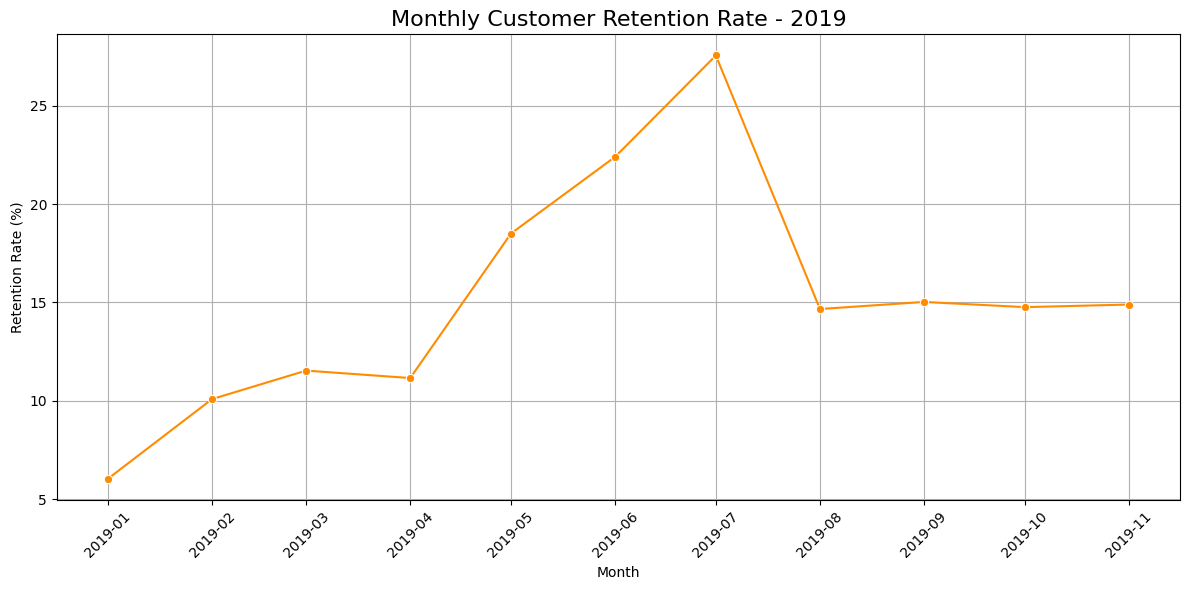

In [ ]:
df_retention['Month']=pd.to_datetime(df_retention['Month'])

plt.figure(figsize=(12,6))
sns.lineplot(data=df_retention,x='Month',y='Retention_Rate',marker='o',color='darkorange')
plt.title('Monthly Customer Retention Rate - 2019', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 1. Interpretation of Retention Rates

| Month | Retention Rate (%)   |
|-------|-----------------------|
| Jul   | 27.54 ✅ Highest       |
| Jun   | 22.39                |
| May   | 18.50                |
| Nov   | 14.89                |
| Oct   | 14.76                |
| Sep   | 15.02                |
| Aug   | 14.66                |
| Apr   | 11.16                |
| Mar   | 11.53                |
| Feb   | 10.09                |
| Jan   | 6.05 ❌ Lowest        |

---

## ✅ Strongest Retention Periods:
- **July 2019** (Highest: 27.5%)
- Followed by: **June**, **May**

## ❌ Weakest Retention Periods:
- **January 2019** (Lowest: 6.05%)
- Followed by: **February**, **March**


## 💡 Strategies to Improve Retention in Weaker Months (e.g., Jan–Mar)

### 1. **Onboarding Campaigns**
- New customers in Jan might be churning early.
- Improve the onboarding experience with:
  - Welcome emails
  - Tutorials
  - Incentives for the 2nd purchase

### 2. **Retargeting & Remarketing**
- Use customer data from Jan/Feb to build remarketing lists.
- Send personalized offers to re-engage those who didn’t convert.

### 3. **Loyalty Rewards**
- Launch a **point-based system** that rewards repeat purchases within 30 days of the first order.
- Promote loyalty via SMS and email nudges.

### 4. **Personalized Communication**
- Trigger email campaigns for users who haven’t made a purchase in X days.
- Use names, browsing history, and product preferences in emails.

### 5. **Feedback Loop**
- Send surveys to January customers who didn’t return.
- Identify friction points like delivery issues, product quality, or user experience.

---

## 📌 Summary

- **Retention rates peak mid-year (May–July)** and drop early in the year.
- **Focus for Jan–Mar**: Enhance onboarding, personalize outreach, and offer loyalty programs.


**✅ Question 4:**

**4. Analyze customer behavior during high-retention months and suggest ways to replicate this success throughout the year.**

In [ ]:
online_sales.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status First_Purchase_Date  \
0         1     153.71               6.5          Used          2019-01-01   
1         1     153.71               6.5          Used          2019-01-01   
2         1       2.05               6.5          Used          2019-01-01   
3         5      17.53               6.5      Not Used          2019-01-01   
4         1      16.50               6.5          Used          2019-01-01   

  Aquisition_Month Transaction_Month  
0          2019-01           2019-01  
1          2019-01           2019-01  
2          2019-01           2019-01  
3          2019-01           2019-01  
4          2019-01           2019-01

In [ ]:
high_retention_months=df_retention.sort_values(by='Retention_Rate').tail(3)['Month'].tolist()
low_retention_months=df_retention.sort_values(by='Retention_Rate').head(3)['Month'].tolist()

In [ ]:
df_retention

Month  Retention_Rate
0   2019-01        6.046512
1   2019-02       10.091743
3   2019-04       11.160714
2   2019-03       11.538462
7   2019-08       14.666667
9   2019-10       14.761905
10  2019-11       14.893617
8   2019-09       15.025907
4   2019-05       18.500000
5   2019-06       22.393822
6   2019-07       27.542373

In [ ]:
high_retention_months

['2019-05', '2019-06', '2019-07']

In [ ]:
low_retention_months

['2019-01', '2019-02', '2019-04']

In [ ]:
high_df=online_sales[online_sales['Transaction_Month'].astype(str).isin(high_retention_months)]
low_df=online_sales[online_sales['Transaction_Month'].astype(str).isin(low_retention_months)]

In [ ]:
high_df.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
15843       15514           26840       2019-05-01  GGOENEBQ079099   
15844       15514           26842       2019-05-01  GGOEGAEB084513   
15845       15514           26842       2019-05-01  GGOEGAEB084514   
15846       15514           26843       2019-05-01  GGOEGAEB084516   
15847       15514           26844       2019-05-01  GGOEGAEB084515   

                                   Product_Description Product_Category  \
15843  Nest Protect Smoke + CO White Battery Alarm-USA         Nest-USA   
15844                                   BLM Sweatshirt          Apparel   
15845                                   BLM Sweatshirt          Apparel   
15846                                   BLM Sweatshirt          Apparel   
15847                                   BLM Sweatshirt          Apparel   

       Quantity  Avg_Price  Delivery_Charges Coupon_Status  \
15843         3      79.00             12.99          Used   
15844         1      33.59              6.00       Clicked   
15845         2      33.59              6.00          Used   
15846         1      33.59              6.00       Clicked   
15847         1      33.59              6.00          Used   

      First_Purchase_Date Aquisition_Month Transaction_Month  \
15843          2019-04-30          2019-04           2019-05   
15844          2019-04-30          2019-04           2019-05   
15845          2019-04-30          2019-04           2019-05   
15846          2019-04-30          2019-04           2019-05   
15847          2019-04-30          2019-04           2019-05   

      First_Purchase_Month Customer_Type  Revenue Month_name  
15843              2019-04      Existing   249.99        May  
15844              2019-04      Existing    39.59        May  
15845              2019-04      Existing    73.18        May  
15846              2019-04      Existing    39.59        May  
15847              2019-04      Existing    39.59        May

In [ ]:
low_df.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status First_Purchase_Date  \
0         1     153.71               6.5          Used          2019-01-01   
1         1     153.71               6.5          Used          2019-01-01   
2         1       2.05               6.5          Used          2019-01-01   
3         5      17.53               6.5      Not Used          2019-01-01   
4         1      16.50               6.5          Used          2019-01-01   

  Aquisition_Month Transaction_Month First_Purchase_Month Customer_Type  \
0          2019-01           2019-01              2019-01           New   
1          2019-01           2019-01              2019-01           New   
2          2019-01           2019-01              2019-01           New   
3          2019-01           2019-01              2019-01           New   
4          2019-01           2019-01              2019-01           New   

   Revenue Month_name  
0   160.21        Jan  
1   160.21        Jan  
2     8.55        Jan  
3    94.15        Jan  
4    23.00        Jan

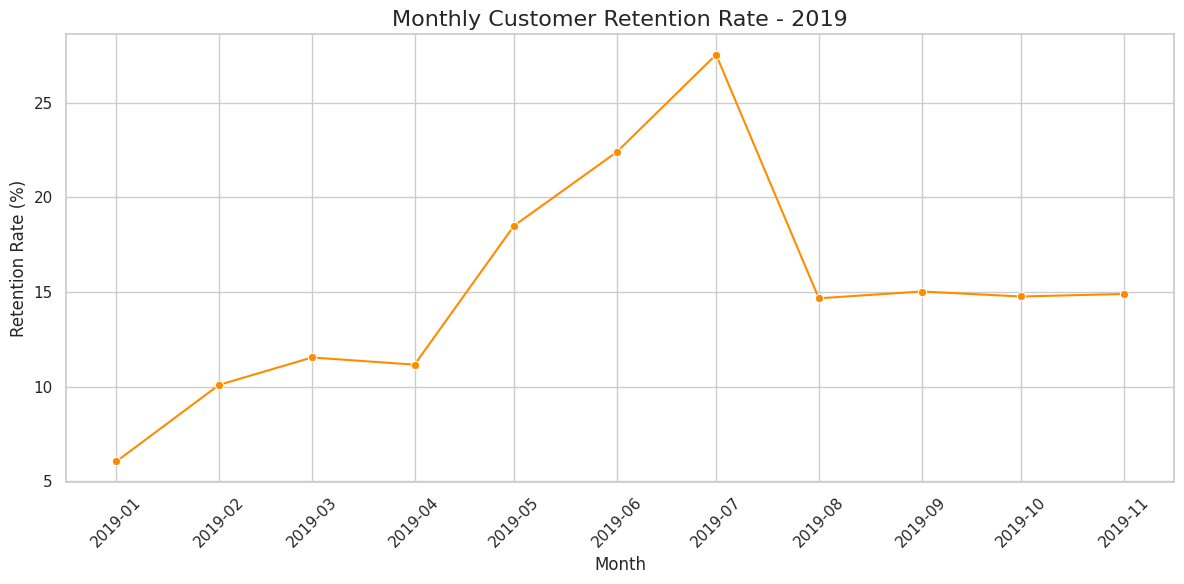

In [ ]:
df_retention['Month']=pd.to_datetime(df_retention['Month'])

plt.figure(figsize=(12,6))
sns.lineplot(data=df_retention,x='Month',y='Retention_Rate',marker='o',color='darkorange')
plt.title('Monthly Customer Retention Rate - 2019', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
def summerize_behaviour(df,label):
  summary={
      'Label':label,
      'Avg Orders Per Customer':df.groupby('CustomerID')['Transaction_ID'].nunique().mean(),
      'Avg Order Value':(df['Quantity']*df['Avg_Price']).mean(),
      'Coupon Usage Rate':((df['Coupon_Status']=='Used').mean())*100
  }

  return summary

In [ ]:
high_retention_behaviour=summerize_behaviour(high_df,'High Retention')
low_retention_behaviour=summerize_behaviour(low_df,'Low Retention')

In [ ]:
retention_behaviour=pd.DataFrame([high_retention_behaviour,low_retention_behaviour])

In [ ]:
retention_behaviour

Label  Avg Orders Per Customer  Avg Order Value  Coupon Usage Rate
0  High Retention                11.373473        71.452830          33.304795
1   Low Retention                12.018293        97.074263          34.017570

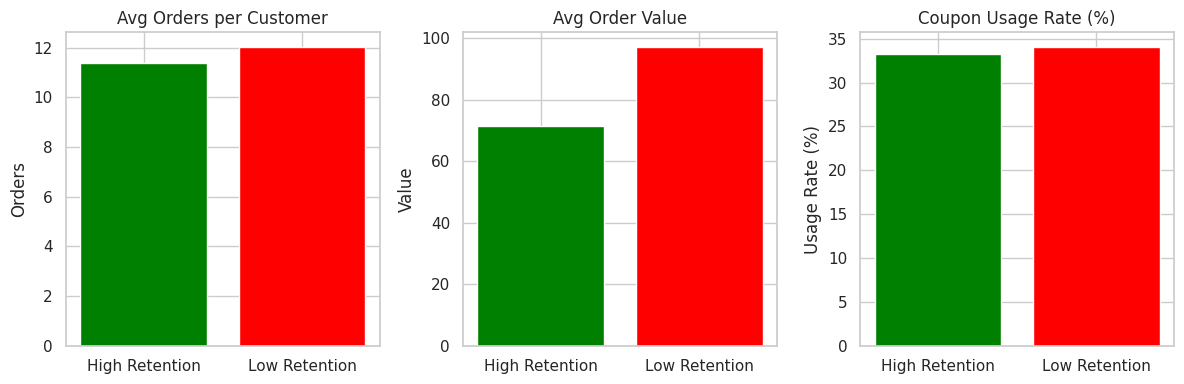

In [ ]:


# Plot 1: Average Orders per Customer
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.bar(retention_behaviour["Label"], retention_behaviour["Avg Orders Per Customer"], color=["green", "red"])
plt.title("Avg Orders per Customer")
plt.ylabel("Orders")

# Plot 2: Average Order Value
plt.subplot(1, 3, 2)
plt.bar(retention_behaviour["Label"], retention_behaviour["Avg Order Value"], color=["green", "red"])
plt.title("Avg Order Value")
plt.ylabel("Value")

# Plot 3: Coupon Usage Rate
plt.subplot(1, 3, 3)
plt.bar(retention_behaviour["Label"], retention_behaviour["Coupon Usage Rate"], color=["green", "red"])
plt.title("Coupon Usage Rate (%)")
plt.ylabel("Usage Rate (%)")

plt.tight_layout()
plt.show()


# 📊 Retention Group Comparison: Key Metrics

| Label            | Avg Orders Per Customer | Avg Order Value (₹) | Coupon Usage Rate (%) |
|------------------|--------------------------|----------------------|------------------------|
| High Retention   | 11.37                    | 71.45                | 33.30%                 |
| Low Retention    | 12.02                    | 97.07                | 34.02%                 |


# 🧠 Interpretation of Customer Behavior

---

## 1. **Order Frequency**
- Customers in **high-retention months** place *slightly fewer but more consistent orders*.
  - **Avg Orders**: 11.37 (high-retention) vs 12.02 (others)
- ✅ Suggests retention is **not solely driven by volume**, but possibly by **experience, habit, or satisfaction**.

---

## 2. **Order Value**
- High-retention customers spend **less per order**.
  - **Avg Order Value**: ₹71.45 (high-retention) vs ₹97.07 (others)
- Indicates they may be **budget-conscious or value-oriented shoppers**.
- Suggests more frequent, smaller purchases — i.e., **habitual buying behavior**.

---

## 3. **Coupon Usage Rate**
- Roughly **equal usage** in both groups (~33–34%)
- ❌ Coupons alone are **not a key differentiator** in retention.
- 🔍 Points to other drivers like:
  - Product experience
  - Customer service
  - Personalization

---

# ✅ Strategies to Replicate High-Retention Month Success

### A. **Promote Smaller, Repeatable Purchases**
- Emphasize **value packs**, **refillable products**, or daily essentials.
- Launch **“Subscribe & Save”** models for top-selling items.

### B. **Enable Micro-Savings Experience**
- Offer **small, frequent discounts** or **loyalty points** for repeat buyers.
- Campaigns like:  
  **“Buy X times this month, get Y reward”** to encourage habits.

### C. **Improve Post-Purchase Engagement**
- Send follow-ups:
  - Product usage tips
  - Reorder reminders
  - Personalized offers
- Run **satisfaction surveys with incentives** to gather feedback and show care.

### D. **Personalized Product Recommendations**
- Use browsing/purchase history to:
  - Suggest similar items
  - Highlight limited-time or trending products

### E. **Encourage Community and Feedback**
- Involve loyal users in:
  - Product reviews
  - Beta testing programs
- Build emotional investment beyond transactions.

### F. **Optimize for Affordability**
- Promote **low-ticket, high-repeat items** during weak months.
- Offer **small-size bundles** to keep entry price low.

---

## 📌 Summary

- 📉 **High retention** is driven by **affordable, repeatable habits**, not by coupons or high spending.
- 🎯 Key strategy: Focus on:
  - **Habit-forming products**
  - **Personalized touchpoints**
  - **Ongoing engagement**
- 💡 This will **sustain and extend** retention improvements throughout the year.


✅ Question 5:

**5. Compare the revenue generated by new and existing customers month-over-month. What does this trend suggest about the balance between acquisition and retention efforts?**

In [ ]:
online_sales.head()

In [ ]:
online_sales['First_Purchase_Month']=online_sales['First_Purchase_Date'].dt.to_period('M')

In [ ]:
online_sales.head(2)

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status First_Purchase_Date  \
0         1     153.71               6.5          Used          2019-01-01   
1         1     153.71               6.5          Used          2019-01-01   

  Aquisition_Month Transaction_Month First_Purchase_Month Customer_Type  \
0          2019-01           2019-01              2019-01           New   
1          2019-01           2019-01              2019-01           New   

   Revenue Month_name  
0   160.21        Jan  
1   160.21        Jan

In [ ]:
online_sales['Customer_Type']=online_sales.apply(lambda row:'New' if row['First_Purchase_Month']==row['Transaction_Month'] else 'Existing',axis=1)

In [ ]:
online_sales.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status First_Purchase_Date  \
0         1     153.71               6.5          Used          2019-01-01   
1         1     153.71               6.5          Used          2019-01-01   
2         1       2.05               6.5          Used          2019-01-01   
3         5      17.53               6.5      Not Used          2019-01-01   
4         1      16.50               6.5          Used          2019-01-01   

  Aquisition_Month Transaction_Month First_Purchase_Month Customer_Type  \
0          2019-01           2019-01              2019-01           New   
1          2019-01           2019-01              2019-01           New   
2          2019-01           2019-01              2019-01           New   
3          2019-01           2019-01              2019-01           New   
4          2019-01           2019-01              2019-01           New   

   Revenue Month_name  
0   160.21        Jan  
1   160.21        Jan  
2     8.55        Jan  
3    94.15        Jan  
4    23.00        Jan

In [ ]:
online_sales['Customer_Type'].value_counts()

Customer_Type
New         32033
Existing    20891
Name: count, dtype: int64

In [ ]:
online_sales['Revenue']=(online_sales['Quantity']*online_sales['Avg_Price'])+online_sales['Delivery_Charges']

In [ ]:
online_sales.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status First_Purchase_Date  \
0         1     153.71               6.5          Used          2019-01-01   
1         1     153.71               6.5          Used          2019-01-01   
2         1       2.05               6.5          Used          2019-01-01   
3         5      17.53               6.5      Not Used          2019-01-01   
4         1      16.50               6.5          Used          2019-01-01   

  Aquisition_Month Transaction_Month First_Purchase_Month Customer_Type  \
0          2019-01           2019-01              2019-01           New   
1          2019-01           2019-01              2019-01           New   
2          2019-01           2019-01              2019-01           New   
3          2019-01           2019-01              2019-01           New   
4          2019-01           2019-01              2019-01           New   

   Revenue Month_name  
0   160.21        Jan  
1   160.21        Jan  
2     8.55        Jan  
3    94.15        Jan  
4    23.00        Jan

In [ ]:
monthly_revenue=online_sales.groupby(['Transaction_Month','Customer_Type'])['Revenue'].sum().reset_index()

In [ ]:
monthly_revenue_pivot=monthly_revenue.pivot(
    index='Transaction_Month',
    columns='Customer_Type',
    values='Revenue'
).fillna(0)

In [ ]:
monthly_revenue_pivot.columns

Index(['Existing', 'New'], dtype='object', name='Customer_Type')

In [ ]:
# Create DataFrame
df = pd.DataFrame(monthly_revenue_pivot)
df.reset_index(inplace=True)

In [ ]:
df

Customer_Type Transaction_Month   Existing        New
0                       2019-01       0.00  462866.90
1                       2019-02   45272.03  314764.37
2                       2019-03   68294.39  342113.64
3                       2019-04  181160.67  261939.49
4                       2019-05  126001.97  223157.62
5                       2019-06  144648.05  213946.91
6                       2019-07  253328.88  168033.12
7                       2019-08  241454.08  220855.86
8                       2019-09  236956.08  164597.74
9                       2019-10  211415.36  244227.80
10                      2019-11  309487.80  231766.75
11                      2019-12  295812.76  265327.42

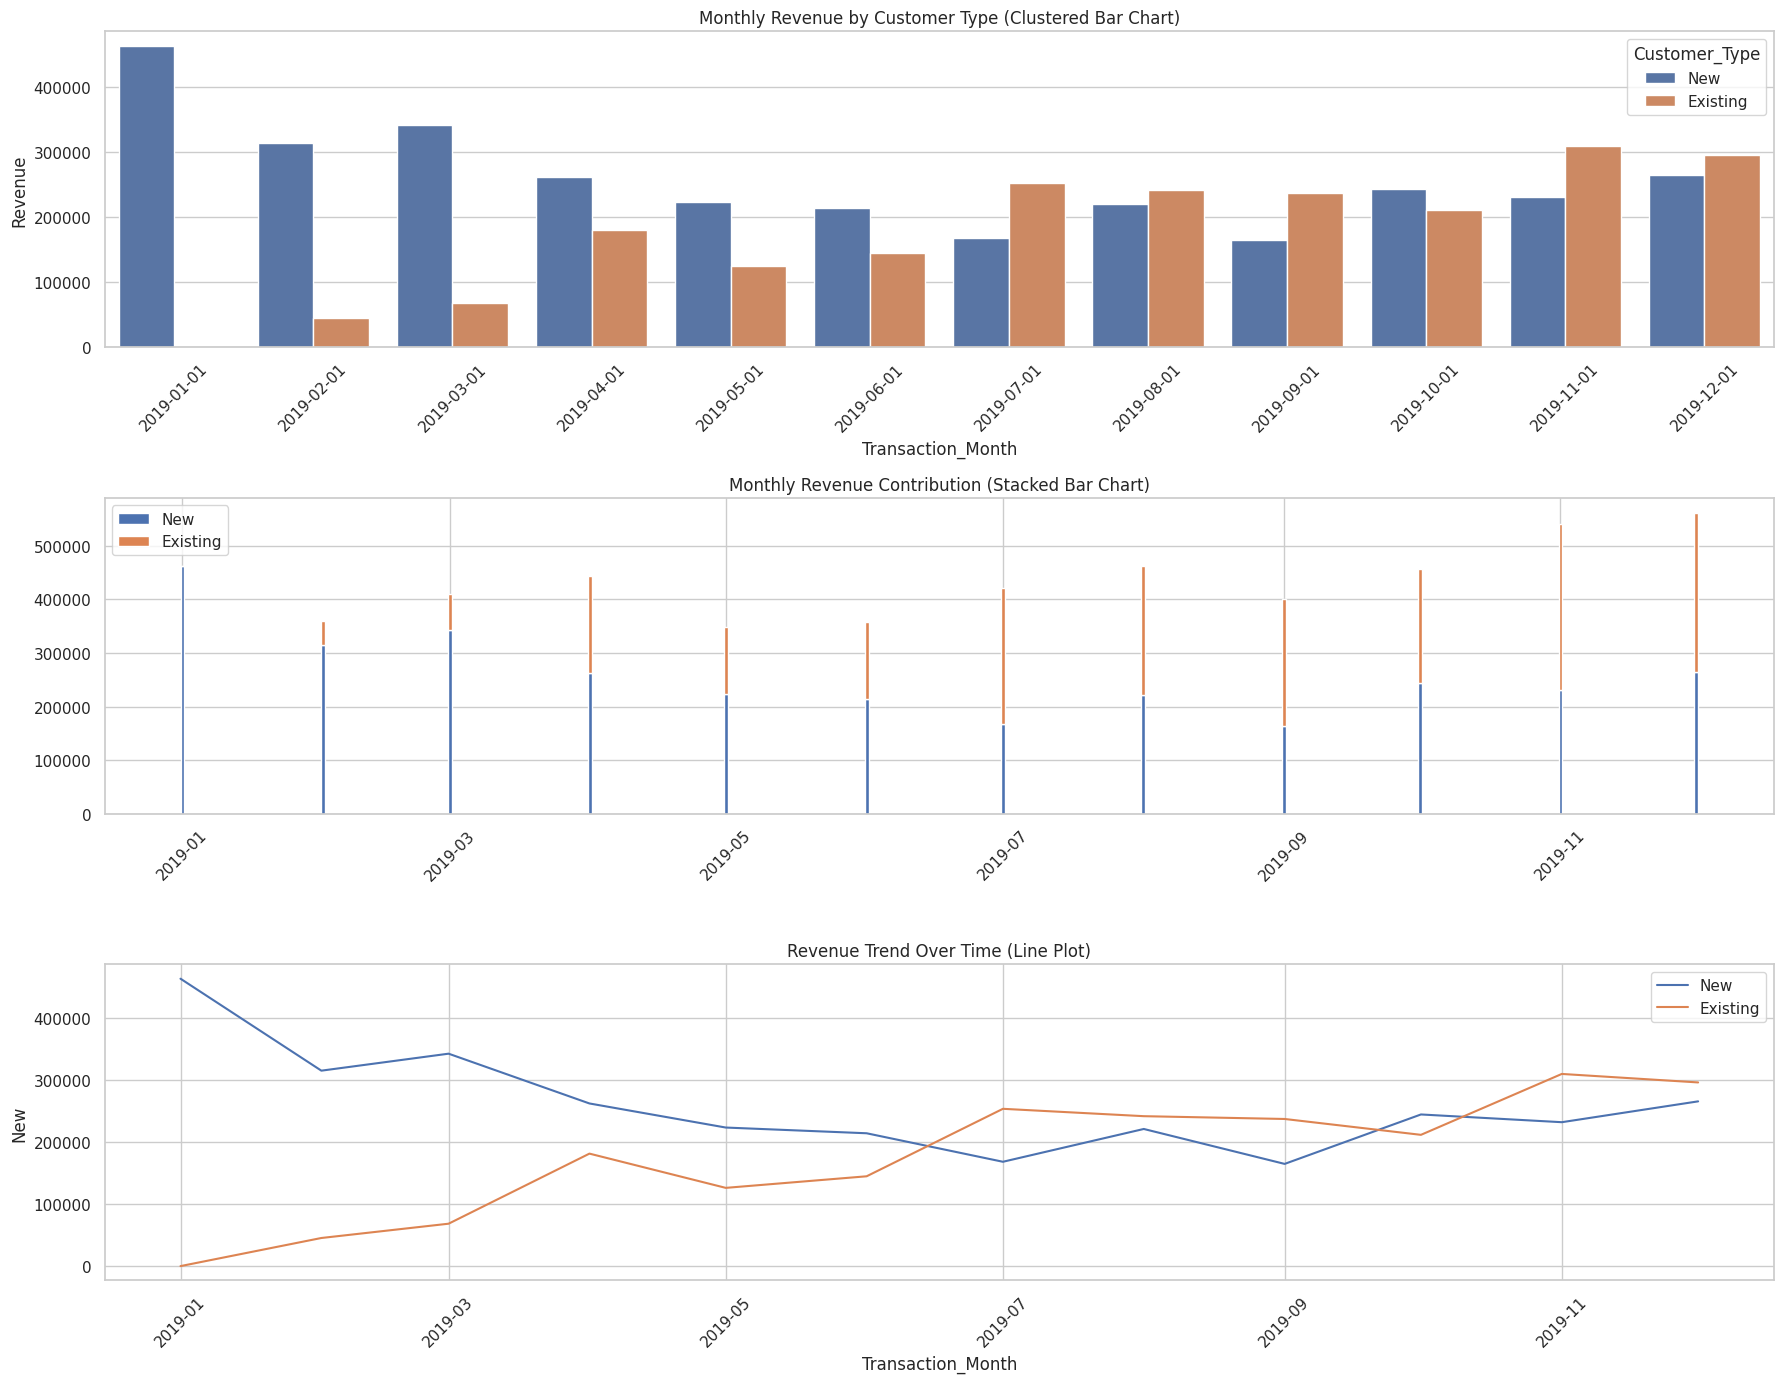

In [ ]:
# Create DataFrame
df = pd.DataFrame(monthly_revenue_pivot)
df.reset_index(inplace=True)
df['Transaction_Month'] = df['Transaction_Month'].dt.to_timestamp()

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(18, 14))

# 1. Clustered Bar Chart
plt.subplot(3, 1, 1)
df_plot = pd.melt(df, id_vars='Transaction_Month', value_vars=['New','Existing'], var_name='Customer_Type', value_name='Revenue')
sns.barplot(data=df_plot, x='Transaction_Month', y='Revenue', hue='Customer_Type')
plt.title('Monthly Revenue by Customer Type (Clustered Bar Chart)')
plt.xticks(rotation=45)

# 2. Stacked Bar Chart
plt.subplot(3, 1, 2)
bar1 = plt.bar(df['Transaction_Month'], df['New'], label='New')
bar2 = plt.bar(df['Transaction_Month'], df['Existing'], bottom=df['New'], label='Existing')
plt.title('Monthly Revenue Contribution (Stacked Bar Chart)')
plt.legend()
plt.xticks(rotation=45)

# 3. Line Plot
plt.subplot(3, 1, 3)
sns.lineplot(data=df, x='Transaction_Month', y='New', label='New')
sns.lineplot(data=df, x='Transaction_Month', y='Existing', label='Existing')
plt.title('Revenue Trend Over Time (Line Plot)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 📊 New vs Existing Customer Revenue Trends

---

## 🔍 Key Insights

### 1. 🆕 Early 2019: New Customer Dominance
- In **Jan–Mar**, revenue is heavily dependent on **new customers**.
- Indicates strong acquisition campaigns or seasonal onboarding.
- No revenue from existing customers in January — likely due to being the **start of the customer lifecycle**.

### 2. 👥 Mid to Late 2019: Existing Customers Take the Lead
- From **July onward**, existing customers consistently contribute **more revenue** than new ones.
- Suggests a shift to **retention-focused growth** and **matured customer base**.

### 3. ⚖️ October–December: Balanced Revenue Mix
- In **Q4**, both segments contribute significantly.
- Reflects **successful balance** of retention and acquisition strategies.
- Retention remains strong, signaling effective engagement tactics.

---

## 📈 Trend Implications

✅ **What This Suggests**:
- The business started with **acquisition-led growth** but evolved to **retention-based revenue**.
- Good onboarding in early 2019 led to **strong second-half retention**.

⚠️ **Caution**:
- Acquisition momentum slows in later months — need to keep pipeline full.
- Retention shouldn't become complacent; **balance is key** for sustainable growth.

---

## 🧠 Strategic Recommendations

### A. 🔄 Strengthen Onboarding Programs
- Convert early new users into **loyal, high-value customers**.
- Use tailored onboarding emails, first-purchase incentives, and welcome sequences.

### B. 🎯 Retarget High-Value New Customers
- Identify **top spenders** from Jan–Mar and nurture them with:
  - Loyalty programs
  - Subscriptions
  - Upsell offers

### C. 🤝 Boost Referral Campaigns
- Use **satisfied existing customers** to generate **referral-based acquisitions**.
- Incentivize with double-sided rewards.

### D. 💰 Balance Campaign Investments
- Allocate **60% of budget to retention**, and **40% to acquisition**.
- Maintain healthy customer inflow while nurturing current base.

### E. 🎁 Leverage Seasonal Synergy
- Q4 shows strong performance across segments.
- Plan product launches, offers, and campaigns around **Oct–Dec**.

---

## 🧾 Final Summary

The analysis reveals a successful shift from an **acquisition-first** model to **retention-driven** revenue. With proper onboarding and loyalty strategies, the company has built a valuable customer base. To keep this momentum:

- Optimize the **onboarding funnel**
- Run effective **referral programs**
- Invest smartly across both **retention and acquisition**

This balance will help maximize **Customer Lifetime Value (CLV)** and fuel long-term growth.


✅ Question 6:

**6. Analyze the relationship between coupon usage and revenue generation. How can discount strategies be optimized to maximize revenue while maintaining profitability?**


In [ ]:
discount_coupon=pd.read_csv('/content/Discount_Coupon.csv')

In [ ]:
discount_coupon.head()

Month Product_Category Coupon_Code  Discount_pct
0   Jan          Apparel      SALE10            10
1   Feb          Apparel      SALE20            20
2   Mar          Apparel      SALE30            30
3   Jan         Nest-USA      ELEC10            10
4   Feb         Nest-USA      ELEC20            20

In [ ]:
discount_coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [ ]:
discount_coupon['Month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [ ]:
online_sales['Month_name']=online_sales['Transaction_Month'].dt.strftime('%b')

In [ ]:
online_sales['Month_name'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [ ]:
online_sales.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status First_Purchase_Date  \
0         1     153.71               6.5          Used          2019-01-01   
1         1     153.71               6.5          Used          2019-01-01   
2         1       2.05               6.5          Used          2019-01-01   
3         5      17.53               6.5      Not Used          2019-01-01   
4         1      16.50               6.5          Used          2019-01-01   

  Aquisition_Month Transaction_Month First_Purchase_Month Customer_Type  \
0          2019-01           2019-01              2019-01           New   
1          2019-01           2019-01              2019-01           New   
2          2019-01           2019-01              2019-01           New   
3          2019-01           2019-01              2019-01           New   
4          2019-01           2019-01              2019-01           New   

   Revenue Month_name  
0   160.21        Jan  
1   160.21        Jan  
2     8.55        Jan  
3    94.15        Jan  
4    23.00        Jan

In [ ]:
discount_coupon.head()

Month Product_Category Coupon_Code  Discount_pct
0   Jan          Apparel      SALE10            10
1   Feb          Apparel      SALE20            20
2   Mar          Apparel      SALE30            30
3   Jan         Nest-USA      ELEC10            10
4   Feb         Nest-USA      ELEC20            20

In [ ]:
merged_df=pd.merge(
    online_sales,
    discount_coupon,
    left_on=['Month_name','Product_Category'],
    right_on=['Month','Product_Category'],
    how='left'
    )

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            52924 non-null  int64         
 1   Transaction_ID        52924 non-null  int64         
 2   Transaction_Date      52924 non-null  datetime64[ns]
 3   Product_SKU           52924 non-null  object        
 4   Product_Description   52924 non-null  object        
 5   Product_Category      52924 non-null  object        
 6   Quantity              52924 non-null  int64         
 7   Avg_Price             52924 non-null  float64       
 8   Delivery_Charges      52924 non-null  float64       
 9   Coupon_Status         52924 non-null  object        
 10  First_Purchase_Date   52924 non-null  datetime64[ns]
 11  Aquisition_Month      52924 non-null  period[M]     
 12  Transaction_Month     52924 non-null  period[M]     
 13  First_Purchase_M

In [ ]:
coupon_usage_rate=merged_df['Coupon_Status'].value_counts(normalize=True)*100

In [ ]:
coupon_usage_rate

Coupon_Status
Clicked     50.876729
Used        33.829643
Not Used    15.293629
Name: proportion, dtype: float64

In [ ]:
revenue_by_coupon_status=merged_df.groupby('Coupon_Status')['Revenue'].agg(
    Transaction_count='count',
    Total_revenue='sum',
    Avg_revenue_per_transaction='mean'
).reset_index()

In [ ]:
revenue_by_coupon_status

Coupon_Status  Transaction_count  Total_revenue  Avg_revenue_per_transaction
0       Clicked              26926     2662820.28                    98.894016
1      Not Used               8094      816306.71                   100.853312
2          Used              17904     1748302.70                    97.648721

In [ ]:
coupon_used_df=merged_df[merged_df['Coupon_Status']=='Used']

In [ ]:
coupon_used_df.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
4       17850           16682       2019-01-01  GGOEGBJL013999   
5       17850           16682       2019-01-01  GGOEGBMJ013399   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
4                    Google Canvas Tote Natural/Navy             Bags   
5                                          Sport Bag             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status First_Purchase_Date  \
0         1     153.71               6.5          Used          2019-01-01   
1         1     153.71               6.5          Used          2019-01-01   
2         1       2.05               6.5          Used          2019-01-01   
4         1      16.50               6.5          Used          2019-01-01   
5        15       5.15               6.5          Used          2019-01-01   

  Aquisition_Month Transaction_Month First_Purchase_Month Customer_Type  \
0          2019-01           2019-01              2019-01           New   
1          2019-01           2019-01              2019-01           New   
2          2019-01           2019-01              2019-01           New   
4          2019-01           2019-01              2019-01           New   
5          2019-01           2019-01              2019-01           New   

   Revenue Month_name Month Coupon_Code  Discount_pct  
0   160.21        Jan   Jan      ELEC10          10.0  
1   160.21        Jan   Jan      ELEC10          10.0  
2     8.55        Jan   Jan       OFF10          10.0  
4    23.00        Jan   Jan       AIO10          10.0  
5    83.75        Jan   Jan       AIO10          10.0

In [ ]:
coupon_used_df['Discount_pct'].mean()

np.float64(19.950500618742264)

In [ ]:
discount_impact=coupon_used_df.groupby('Discount_pct').agg(
    Transaction_count=('Transaction_ID','count'),
    Total_revenue=('Revenue','sum'),
    Avg_revenue=('Revenue','mean')
    ).reset_index()

In [ ]:
discount_impact

Discount_pct  Transaction_count  Total_revenue  Avg_revenue
0          10.0               5933      584562.89    98.527371
1          20.0               6000      571575.18    95.262530
2          30.0               5845      581339.13    99.459218

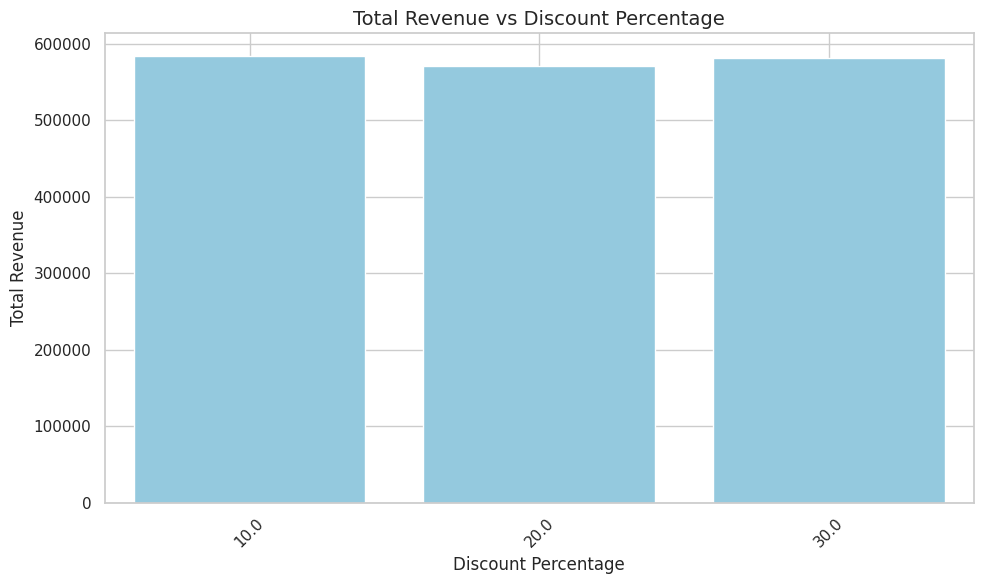

In [ ]:

plt.figure(figsize=(10, 6))

sns.barplot(data=discount_impact, x='Discount_pct', y='Total_revenue', color='skyblue')
plt.ylabel("Total Revenue", fontsize=12)
plt.xlabel("Discount Percentage", fontsize=12)
plt.title("Total Revenue vs Discount Percentage", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


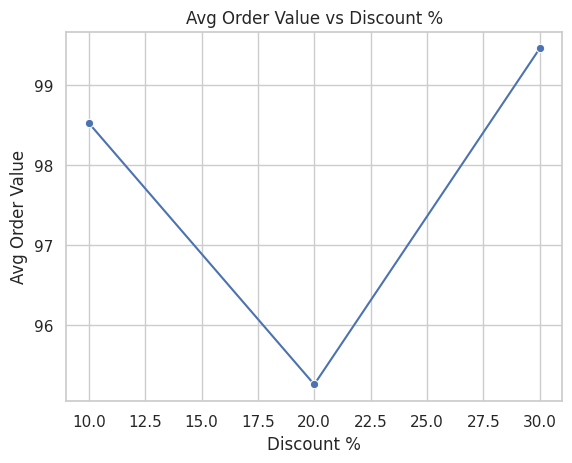

In [ ]:
sns.lineplot(data=discount_impact, x='Discount_pct', y='Avg_revenue', marker='o')
plt.title("Avg Order Value vs Discount %")
plt.xlabel("Discount %")
plt.ylabel("Avg Order Value")
plt.grid(True)
plt.show()

<ipython-input-259-3856268310>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Discount_pct', y='Total_revenue', data=discount_impact, palette='viridis', ax=ax[0])
<ipython-input-259-3856268310>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Discount_pct', y='Avg_revenue', data=discount_impact, palette='magma', ax=ax[1])


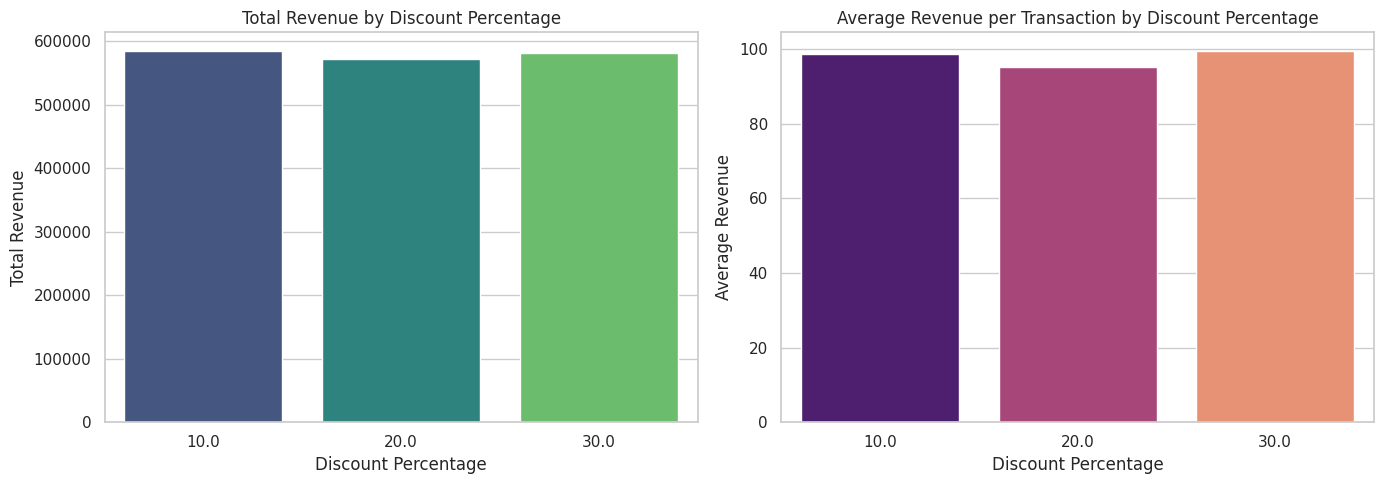

In [ ]:


# Set plot style
sns.set(style="whitegrid")

# Create a bar plot showing Total Revenue by Discount Percentage
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Total Revenue vs Discount
sns.barplot(x='Discount_pct', y='Total_revenue', data=discount_impact, palette='viridis', ax=ax[0])
ax[0].set_title('Total Revenue by Discount Percentage')
ax[0].set_xlabel('Discount Percentage')
ax[0].set_ylabel('Total Revenue')

# Plot 2: Average Revenue vs Discount
sns.barplot(x='Discount_pct', y='Avg_revenue', data=discount_impact, palette='magma', ax=ax[1])
ax[1].set_title('Average Revenue per Transaction by Discount Percentage')
ax[1].set_xlabel('Discount Percentage')
ax[1].set_ylabel('Average Revenue')

plt.tight_layout()
plt.show()


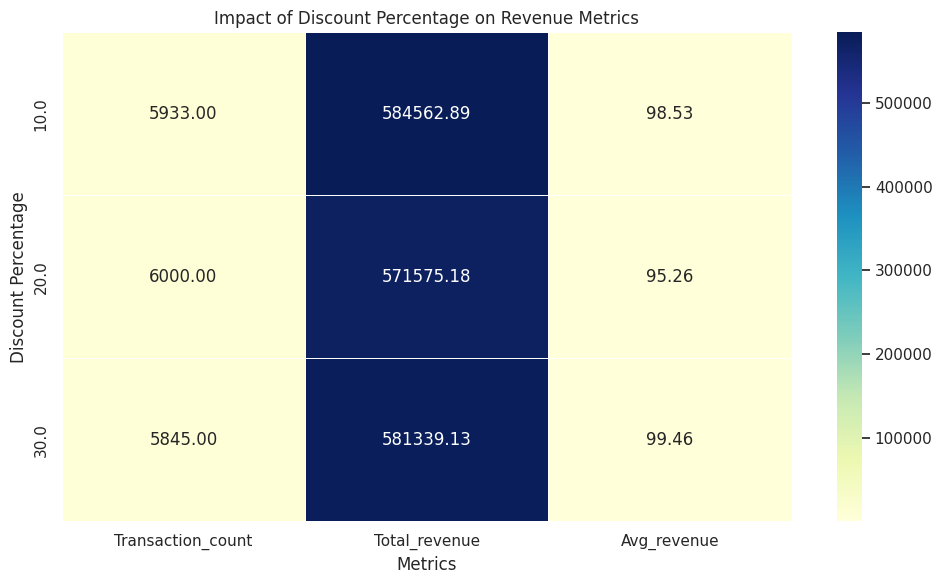

In [ ]:

# Set the index to Discount_pct for better readability
heat_map_impact_disc=discount_impact.set_index('Discount_pct')

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heat_map_impact_disc, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Impact of Discount Percentage on Revenue Metrics")
plt.ylabel("Discount Percentage")
plt.xlabel("Metrics")
plt.tight_layout()
plt.show()


# 🧾 1. Coupon Status Overview

| Coupon Status | Transaction Count | Total Revenue (₹) | Avg Revenue / Transaction (₹) |
|---------------|-------------------|--------------------|-------------------------------|
| Clicked       | 26,926            | 2,662,820.28       | 98.89                         |
| Used          | 17,904            | 1,748,302.70       | 97.65                         |
| Not Used      | 8,094             | 816,306.71         | 100.85                        |

### 🧠 Observations:
- 🔹 Most coupons are **clicked but not used**.
- 🔹 **"Not Used"** transactions generate the **highest average revenue per order**.
- 🔹 Coupon usage still drives a **large share of total revenue** due to high transaction volume.

---

# 🎯 2. Impact of Discount Percentage

| Discount % | Transaction Count | Total Revenue (₹) | Avg Revenue / Transaction (₹) |
|------------|-------------------|--------------------|-------------------------------|
| 10%        | 5,933             | 584,562.89         | 98.53                         |
| 20%        | 6,000             | 571,575.18         | 95.26                         |
| 30%        | 5,845             | 581,339.13         | 99.46                         |

### 🧠 Observations:
- 🔸 Higher discounts **don’t always result** in higher average revenue per transaction.
- 🔸 **20% discount** has the **lowest average revenue**, possibly due to:
  - Over-discounting
  - Targeting lower-value purchases

---

# 🧠 Key Takeaways

## 📌 1. Coupon Usage Boosts Volume, But May Reduce Per-Order Revenue
- Coupons drive **transaction volume** and are great for:
  - Customer acquisition
  - Reactivation
- However, they may slightly **reduce average revenue per transaction**, especially **at mid-tier discounts** like 20%.

## 📌 2. Optimize Discount Strategy
To maximize revenue while maintaining profitability:
- 🔹 Use **low-to-mid discounts (10–15%)** on **high-margin or high-demand items**.
- 🔹 Avoid high blanket discounts (20%+) unless:
  - For stock clearance
  - Customer win-back campaigns
- 🔹 Test **personalized discounting** based on:
  - Customer Lifetime Value (CLTV)
  - Purchase history

## 📌 3. Monitor Coupon Effectiveness Beyond Usage
- Clicked: **26,926**, Used: **17,904** — meaning a big drop-off between interest and conversion.
- Opportunities to improve funnel:
  - Better user experience (UX)
  - Reminder emails or popups
  - One-click apply or auto-apply options
- Use **customer segmentation** to test different discounts by cohort.

---

# ✅ Final Recommendation

A **data-driven coupon strategy** should:

- 🎯 Encourage coupon use **where it boosts total revenue without heavily affecting profit margins**.
- 🧪 Implement **A/B testing** to:
  - Discover optimal discount levels by **product category**
  - Tune offers by **customer type** (e.g., new vs loyal)
- 🔄 Improve conversion from **"Clicked" to "Used"** with:
  - Nudges, reminders, and simplified redemption


✅ Question 7:

**7. Identify the top-performing products and analyze the factors driving their success. How can this insight inform inventory management and promotional strategies?**


In [ ]:
merged_df.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status First_Purchase_Date  \
0         1     153.71               6.5          Used          2019-01-01   
1         1     153.71               6.5          Used          2019-01-01   
2         1       2.05               6.5          Used          2019-01-01   
3         5      17.53               6.5      Not Used          2019-01-01   
4         1      16.50               6.5          Used          2019-01-01   

  Aquisition_Month Transaction_Month First_Purchase_Month Customer_Type  \
0          2019-01           2019-01              2019-01           New   
1          2019-01           2019-01              2019-01           New   
2          2019-01           2019-01              2019-01           New   
3          2019-01           2019-01              2019-01           New   
4          2019-01           2019-01              2019-01           New   

   Revenue Month_name Month Coupon_Code  Discount_pct  
0   160.21        Jan   Jan      ELEC10          10.0  
1   160.21        Jan   Jan      ELEC10          10.0  
2     8.55        Jan   Jan       OFF10          10.0  
3    94.15        Jan   Jan      SALE10          10.0  
4    23.00        Jan   Jan       AIO10          10.0

In [ ]:
top_products=merged_df.groupby(['Product_SKU','Product_Description']).agg(
    Transaction_Count=('Transaction_ID','nunique'),
    Total_Revenue=('Revenue','sum'),
    Total_Quantity_Sold=('Quantity','sum')
).reset_index()

In [ ]:
top_products

Product_SKU                 Product_Description  Transaction_Count  \
0     GGOEA0CH077599          Android Hard Cover Journal                 16   
1     GGOEAAAB034813     Android BTTF Cosmos Graphic Tee                 18   
2     GGOEAAAB034814     Android BTTF Cosmos Graphic Tee                 43   
3     GGOEAAAB034815     Android BTTF Cosmos Graphic Tee                 31   
4     GGOEAAAB034816     Android BTTF Cosmos Graphic Tee                 22   
...              ...                                 ...                ...   
1140  GGOEYOCR077399                YouTube RFID Journal                 24   
1141  GGOEYOCR077799          YouTube Hard Cover Journal                 61   
1142  GGOEYOCR078099     YouTube Spiral Journal with Pen                 33   
1143  GGOEYOLR018699  YouTube Leatherette Notebook Combo                126   
1144  GGOEYOLR080599        YouTube Notebook and Pen Set                 32   

      Total_Revenue  Total_Quantity_Sold  
0           7784.52                  515  
1            452.83                   22  
2            916.14                   57  
3            969.35                   41  
4            576.87                   24  
...             ...                  ...  
1140        2061.06                  246  
1141       22110.48                 1488  
1142        3933.45                  445  
1143       11592.54                 1443  
1144        2383.90                  361  

[1145 rows x 5 columns]

In [ ]:
top_products_by_revenue=top_products.sort_values(by='Total_Revenue',ascending=False).head(10)

In [ ]:
top_products_by_revenue.head()

Product_SKU                                Product_Description  \
981  GGOENEBJ079499  Nest Learning Thermostat 3rd Gen-USA - Stainle...   
983  GGOENEBQ078999             Nest Cam Outdoor Security Camera - USA   
976  GGOENEBB078899              Nest Cam Indoor Security Camera - USA   
984  GGOENEBQ079099    Nest Protect Smoke + CO White Battery Alarm-USA   
985  GGOENEBQ079199      Nest Protect Smoke + CO White Wired Alarm-USA   

     Transaction_Count  Total_Revenue  Total_Quantity_Sold  
981               3511      713873.03                 4570  
983               3328      654298.21                 5206  
976               3230      551596.34                 4402  
984               1361      223078.94                 2683  
985               1065      219973.10                 2670

In [ ]:
top_skus=top_products_by_revenue['Product_SKU'].tolist()

In [ ]:
top_skus

['GGOENEBJ079499',
 'GGOENEBQ078999',
 'GGOENEBB078899',
 'GGOENEBQ079099',
 'GGOENEBQ079199',
 'GGOENEBQ084699',
 'GGOENEBQ092299',
 'GGOENEBQ086499',
 'GGOENEBQ086799',
 'GGOENEBD084799']

In [ ]:
merged_df[merged_df['Product_SKU'].isin(top_skus)].head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0        17850           16679       2019-01-01  GGOENEBJ079499   
1        17850           16680       2019-01-01  GGOENEBJ079499   
13       13047           16684       2019-01-01  GGOENEBQ078999   
14       13047           16684       2019-01-01  GGOENEBQ079199   
24       13047           16688       2019-01-01  GGOENEBB078899   

                                  Product_Description Product_Category  \
0   Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1   Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
13             Nest Cam Outdoor Security Camera - USA         Nest-USA   
14      Nest Protect Smoke + CO White Wired Alarm-USA         Nest-USA   
24              Nest Cam Indoor Security Camera - USA         Nest-USA   

    Quantity  Avg_Price  Delivery_Charges Coupon_Status First_Purchase_Date  \
0          1     153.71               6.5          Used          2019-01-01   
1          1     153.71               6.5          Used          2019-01-01   
13         2     122.77               6.5       Clicked          2019-01-01   
14         1      81.50               6.5          Used          2019-01-01   
24         1     122.77               6.5          Used          2019-01-01   

   Aquisition_Month Transaction_Month First_Purchase_Month Customer_Type  \
0           2019-01           2019-01              2019-01           New   
1           2019-01           2019-01              2019-01           New   
13          2019-01           2019-01              2019-01           New   
14          2019-01           2019-01              2019-01           New   
24          2019-01           2019-01              2019-01           New   

    Revenue Month_name Month Coupon_Code  Discount_pct  
0    160.21        Jan   Jan      ELEC10          10.0  
1    160.21        Jan   Jan      ELEC10          10.0  
13   252.04        Jan   Jan      ELEC10          10.0  
14    88.00        Jan   Jan      ELEC10          10.0  
24   129.27        Jan   Jan      ELEC10          10.0

In [ ]:
promotion_effect=merged_df[merged_df['Product_SKU'].isin(top_skus)].groupby(['Coupon_Status','Discount_pct']).agg(
    Transaction_count=('Transaction_ID','count'),
    Total_Revenue=('Revenue','sum'),
    Avg_Revenue_Per_Transaction=('Revenue','mean')
 ).sort_values(by=['Coupon_Status','Discount_pct','Total_Revenue'],ascending=False).reset_index()

In [ ]:
promotion_effect

Coupon_Status  Discount_pct  Transaction_count  Total_Revenue  \
0          Used          30.0               1847      363932.72   
1          Used          20.0               1724      342827.57   
2          Used          10.0               1765      331200.29   
3      Not Used          30.0                897      175368.86   
4      Not Used          20.0                790      158931.38   
5      Not Used          10.0                779      147959.29   
6       Clicked          30.0               2772      541960.93   
7       Clicked          20.0               2671      521629.94   
8       Clicked          10.0               2673      520719.17   

   Avg_Revenue_Per_Transaction  
0                   197.039913  
1                   198.855899  
2                   187.648890  
3                   195.505975  
4                   201.178962  
5                   189.934904  
6                   195.512601  
7                   195.293875  
8                   194.807022

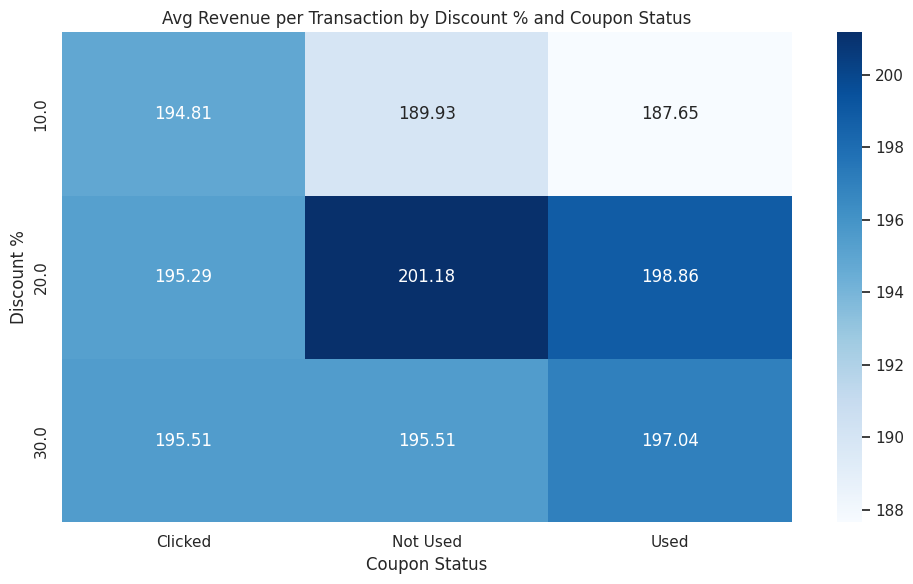

In [ ]:

heatmap_df = promotion_effect.pivot(index='Discount_pct', columns='Coupon_Status', values='Avg_Revenue_Per_Transaction')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=True, fmt=".2f", cmap="Blues")
plt.title("Avg Revenue per Transaction by Discount % and Coupon Status")
plt.ylabel("Discount %")
plt.xlabel("Coupon Status")
plt.tight_layout()
plt.show()


In [ ]:
heatmap_df

Coupon_Status     Clicked    Not Used        Used
Discount_pct                                     
10.0           194.807022  189.934904  187.648890
20.0           195.293875  201.178962  198.855899
30.0           195.512601  195.505975  197.039913

# ✅ 1. Top-Performing Products

| Product SKU        | Product Description                         | Total Revenue (₹) |
|--------------------|---------------------------------------------|-------------------|
| GGOENEBJ079499     | Nest Learning Thermostat 3rd Gen            | ₹713,873.03       |
| GGOENEBQ078999     | Nest Cam Outdoor Security Camera            | ₹654,298.21       |
| GGOENEBB078899     | Nest Cam Indoor Security Camera             | ₹551,596.34       |
| GGOENEBQ079099     | Nest Protect Smoke + CO Battery Alarm       | ₹223,078.94       |
| GGOENEBQ079199     | Nest Protect Smoke + CO Wired Alarm         | ₹219,973.10       |

### 🧠 Insight:
All top-performing products are from the **smart home and security** category — indicating **strong customer demand** for connected, high-tech solutions.

---

# ✅ 2. Promotion Effectiveness Insights

### ➤ Coupon Status Impact

| Coupon Status | Avg Revenue Per Transaction (₹) |
|---------------|----------------------------------|
| Used          | ₹194–₹198                        |
| Clicked       | ₹194–₹195                        |
| Not Used      | ₹189–₹201                        |

- ✅ Used coupons **don’t always reduce** revenue per transaction.
- In some cases (especially **20–30% discounts**), average revenue is **higher with coupons** than without.

---

### ➤ Discount % Impact on Used Coupons

| Discount % | Avg Revenue Per Transaction (₹) |
|------------|----------------------------------|
| 30%        | ₹197.04                          |
| 20%        | ₹198.86                          |
| 10%        | ₹187.65                          |

### 🧠 Observations:
- **20–30% discounts** are most effective in driving **larger basket sizes**, especially for top products.
- **10% discounts** may be too low to incentivize higher-value purchases.

---

# 📈 3. Strategic Takeaways

## 💡 Product Strategy
- Prioritize **smart home devices**:
  - Ensure stock availability for top-performing SKUs.
  - Center campaigns around smart security/automation bundles.

## 💡 Inventory Management
- Use demand trends to:
  - **Forecast accurately** for top SKUs.
  - **Avoid stockouts** during promotions or high-season.
  - **Reduce overstock** of underperforming categories.

## 💡 Promotional Strategy
- Continue **20–30% discount offers** on high-performing SKUs:
  - These **boost volume** without significantly hurting revenue per order.
- Target “**Clicked but Not Used**” coupon users with:
  - Improved messaging
  - Urgency triggers like limited-time deals
  - One-click coupon redemption
- Use **A/B testing** to fine-tune:
  - Discount levels
  - Coupon format (e.g., flat ₹ off vs. % off)
  - Delivery method (email, app notification, in-cart popup)

---

## 📌 Final Recommendation

Focus your promotion engine and inventory decisions around **smart tech**, especially Nest products.  
Leverage discount strategies that are proven to boost volume without compromising margins, and continue optimizing **coupon conversion funnel** from “Click” to “Use.”


✅ Question 8:

**8. Analyze the relationship between monthly marketing spend and revenue. Are there any months where marketing efforts yielded disproportionately high or low returns? How can marketing strategies be adjusted to improve ROI?**

In [ ]:
merged_df.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status First_Purchase_Date  \
0         1     153.71               6.5          Used          2019-01-01   
1         1     153.71               6.5          Used          2019-01-01   
2         1       2.05               6.5          Used          2019-01-01   
3         5      17.53               6.5      Not Used          2019-01-01   
4         1      16.50               6.5          Used          2019-01-01   

  Aquisition_Month Transaction_Month First_Purchase_Month Customer_Type  \
0          2019-01           2019-01              2019-01           New   
1          2019-01           2019-01              2019-01           New   
2          2019-01           2019-01              2019-01           New   
3          2019-01           2019-01              2019-01           New   
4          2019-01           2019-01              2019-01           New   

   Revenue Month_name Month Coupon_Code  Discount_pct  
0   160.21        Jan   Jan      ELEC10          10.0  
1   160.21        Jan   Jan      ELEC10          10.0  
2     8.55        Jan   Jan       OFF10          10.0  
3    94.15        Jan   Jan      SALE10          10.0  
4    23.00        Jan   Jan       AIO10          10.0

In [ ]:
marketing_spend_df=pd.read_csv('/content/Marketing_Spend.csv')

In [ ]:
marketing_spend_df

Date  Offline_Spend  Online_Spend
0      1/1/2019           4500       2424.50
1      1/2/2019           4500       3480.36
2      1/3/2019           4500       1576.38
3      1/4/2019           4500       2928.55
4      1/5/2019           4500       4055.30
..          ...            ...           ...
360  12/27/2019           4000       3396.87
361  12/28/2019           4000       3246.84
362  12/29/2019           4000       2546.58
363  12/30/2019           4000        674.31
364  12/31/2019           4000       2058.75

[365 rows x 3 columns]

In [ ]:
month_revenue=merged_df.groupby('Transaction_Month').agg(
    Monthly_Revenue=('Revenue','sum')
).reset_index()
month_revenue

Transaction_Month  Monthly_Revenue
0            2019-01        462866.90
1            2019-02        360036.40
2            2019-03        410408.03
3            2019-04        443100.16
4            2019-05        349159.59
5            2019-06        358594.96
6            2019-07        421362.00
7            2019-08        462309.94
8            2019-09        401553.82
9            2019-10        455643.16
10           2019-11        541254.55
11           2019-12        561140.18

In [ ]:
marketing_spend_df['Month']=pd.to_datetime(marketing_spend_df['Date']).dt.to_period('M')

In [ ]:
marketing_spend_df

Date  Offline_Spend  Online_Spend    Month
0      1/1/2019           4500       2424.50  2019-01
1      1/2/2019           4500       3480.36  2019-01
2      1/3/2019           4500       1576.38  2019-01
3      1/4/2019           4500       2928.55  2019-01
4      1/5/2019           4500       4055.30  2019-01
..          ...            ...           ...      ...
360  12/27/2019           4000       3396.87  2019-12
361  12/28/2019           4000       3246.84  2019-12
362  12/29/2019           4000       2546.58  2019-12
363  12/30/2019           4000        674.31  2019-12
364  12/31/2019           4000       2058.75  2019-12

[365 rows x 4 columns]

In [ ]:
month_spend=marketing_spend_df.groupby('Month').agg(
    offline_spend=('Offline_Spend','sum'),
    online_spend=('Online_Spend','sum')
).reset_index()

In [ ]:
month_spend

Month  offline_spend  online_spend
0   2019-01          96600      58328.95
1   2019-02          81300      55807.92
2   2019-03          73500      48750.09
3   2019-04          96000      61026.83
4   2019-05          65500      52759.64
5   2019-06          80500      53818.14
6   2019-07          67500      52717.85
7   2019-08          85500      57404.15
8   2019-09          83000      52514.54
9   2019-10          93500      57724.65
10  2019-11          93000      68144.96
11  2019-12         122000      76648.75

In [ ]:
month_spend['Total_Spend']=month_spend['offline_spend']+month_spend['online_spend']

In [ ]:
month_spend

Month  offline_spend  online_spend  Total_Spend
0   2019-01          96600      58328.95    154928.95
1   2019-02          81300      55807.92    137107.92
2   2019-03          73500      48750.09    122250.09
3   2019-04          96000      61026.83    157026.83
4   2019-05          65500      52759.64    118259.64
5   2019-06          80500      53818.14    134318.14
6   2019-07          67500      52717.85    120217.85
7   2019-08          85500      57404.15    142904.15
8   2019-09          83000      52514.54    135514.54
9   2019-10          93500      57724.65    151224.65
10  2019-11          93000      68144.96    161144.96
11  2019-12         122000      76648.75    198648.75

In [ ]:
monthly_analysis=pd.merge(month_revenue,month_spend,left_on='Transaction_Month',right_on='Month')

In [ ]:
monthly_analysis['ROI']=monthly_analysis['Monthly_Revenue']/monthly_analysis['Total_Spend']

In [ ]:
monthly_analysis.sort_values(by=['Month','ROI'],ascending=[True,False],inplace=True)

In [ ]:
monthly_analysis.reset_index(drop=True,inplace=True)

In [ ]:
monthly_analysis

Transaction_Month  Monthly_Revenue    Month  offline_spend  online_spend  \
0            2019-01        462866.90  2019-01          96600      58328.95   
1            2019-02        360036.40  2019-02          81300      55807.92   
2            2019-03        410408.03  2019-03          73500      48750.09   
3            2019-04        443100.16  2019-04          96000      61026.83   
4            2019-05        349159.59  2019-05          65500      52759.64   
5            2019-06        358594.96  2019-06          80500      53818.14   
6            2019-07        421362.00  2019-07          67500      52717.85   
7            2019-08        462309.94  2019-08          85500      57404.15   
8            2019-09        401553.82  2019-09          83000      52514.54   
9            2019-10        455643.16  2019-10          93500      57724.65   
10           2019-11        541254.55  2019-11          93000      68144.96   
11           2019-12        561140.18  2019-12         122000      76648.75   

    Total_Spend       ROI  
0     154928.95  2.987608  
1     137107.92  2.625934  
2     122250.09  3.357118  
3     157026.83  2.821812  
4     118259.64  2.952483  
5     134318.14  2.669743  
6     120217.85  3.504987  
7     142904.15  3.235105  
8     135514.54  2.963179  
9     151224.65  3.013022  
10    161144.96  3.358805  
11    198648.75  2.824786

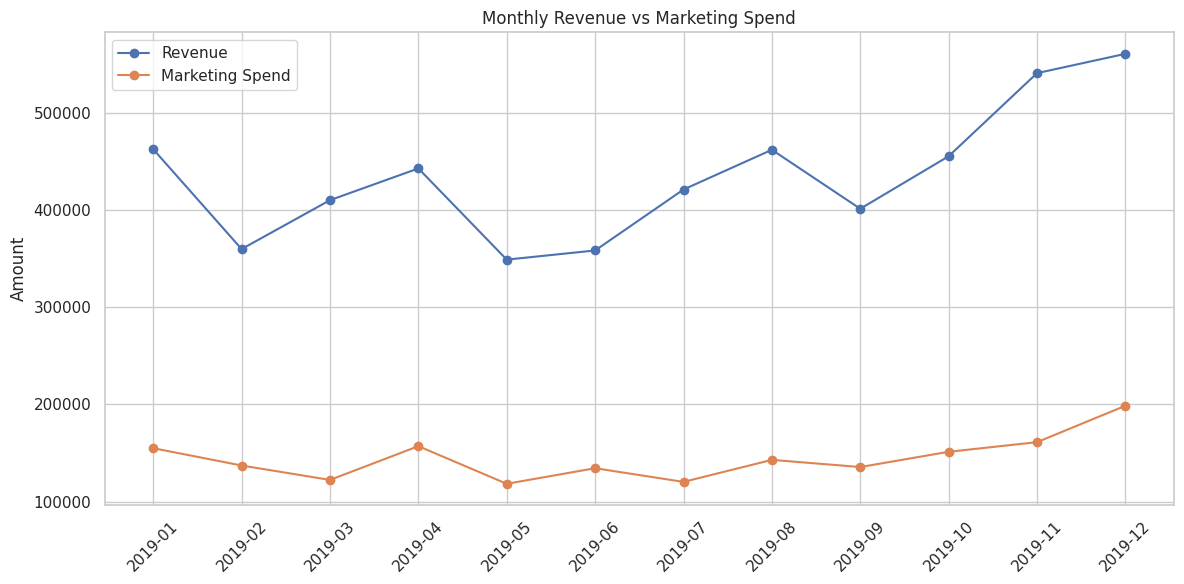

In [ ]:

plt.figure(figsize=(12,6))
plt.plot(monthly_analysis['Month'].astype(str), monthly_analysis['Monthly_Revenue'], label='Revenue', marker='o')
plt.plot(monthly_analysis['Month'].astype(str), monthly_analysis['Total_Spend'], label='Marketing Spend', marker='o')
plt.xticks(rotation=45)
plt.ylabel('Amount')
plt.title('Monthly Revenue vs Marketing Spend')
plt.legend()
plt.tight_layout()
plt.show()


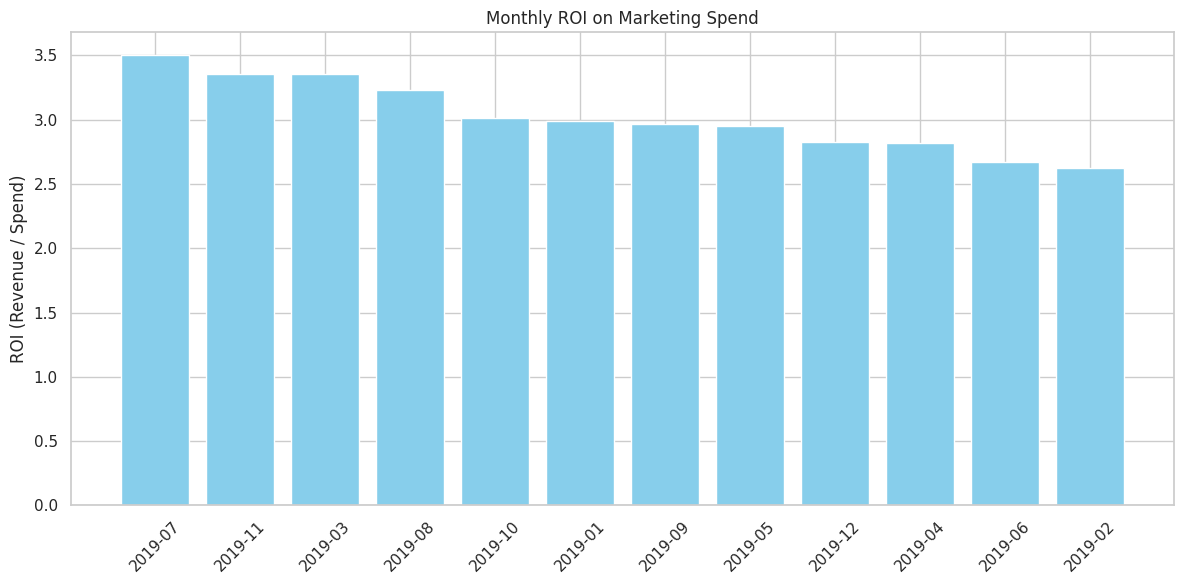

In [ ]:
monthly_analysis.sort_values("ROI", ascending=False, inplace=True)

plt.figure(figsize=(12,6))
plt.bar(monthly_analysis['Month'].astype(str), monthly_analysis['ROI'], color='skyblue')
plt.xticks(rotation=45)
plt.ylabel('ROI (Revenue / Spend)')
plt.title('Monthly ROI on Marketing Spend')
plt.tight_layout()
plt.show()


<ipython-input-290-324641046>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(monthly_analysis['Month'], rotation=45)


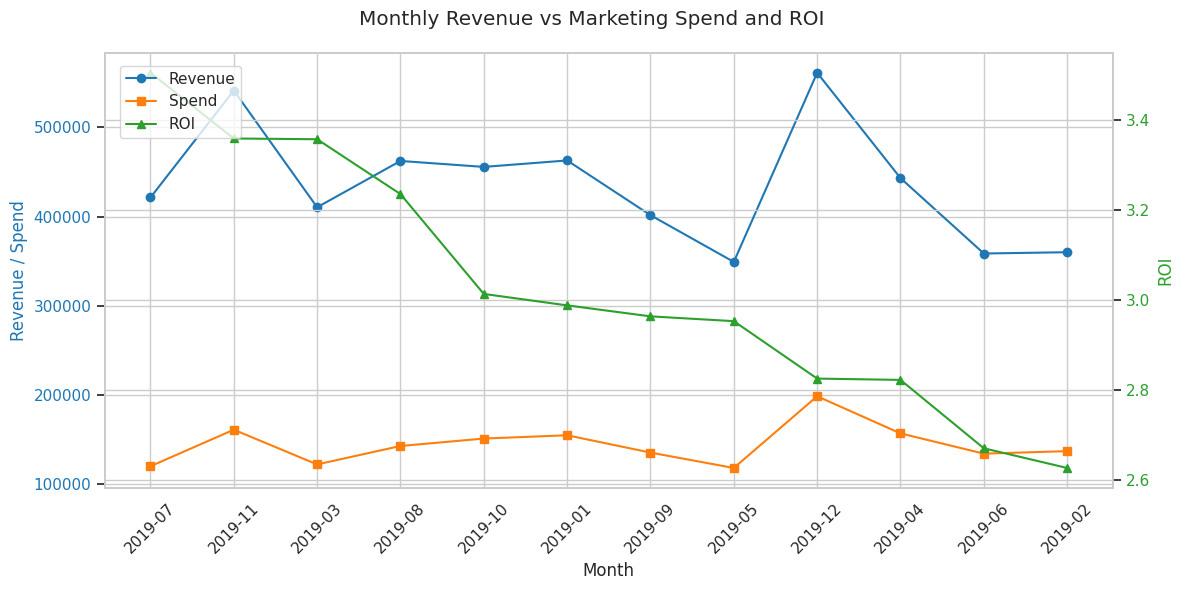

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Revenue and Spend on primary y-axis
ax1.set_xlabel('Month')
ax1.set_ylabel('Revenue / Spend', color='tab:blue')
ax1.plot(monthly_analysis['Month'].astype(str), monthly_analysis['Monthly_Revenue'], marker='o', label='Revenue', color='tab:blue')
ax1.plot(monthly_analysis['Month'].astype(str), monthly_analysis['Total_Spend'], marker='s', label='Spend', color='tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticklabels(monthly_analysis['Month'], rotation=45)

# Create secondary y-axis for ROI
ax2 = ax1.twinx()
ax2.set_ylabel('ROI', color='tab:green')
ax2.plot(monthly_analysis['Month'].astype(str), monthly_analysis['ROI'], marker='^', label='ROI', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Titles and Legends
fig.suptitle("Monthly Revenue vs Marketing Spend and ROI")
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.grid(True)
plt.show()


# 📊 Marketing ROI Analysis by Month

| Month | Monthly Revenue (₹) | Total Spend (₹) | ROI  | Insight                                                       |
|-------|----------------------|------------------|------|----------------------------------------------------------------|
| Jul   | 421,362.00           | 120,217.85       | 3.50 | Highest ROI with moderate spend – highly efficient             |
| Nov   | 541,254.55           | 161,144.96       | 3.36 | High ROI and high revenue – strong marketing impact            |
| Mar   | 410,408.03           | 122,250.09       | 3.36 | High ROI – efficient marketing                                 |
| Aug   | 462,309.94           | 142,904.15       | 3.24 | Good balance of spend and revenue                              |
| Dec   | 561,140.18           | 198,648.75       | 2.82 | High spend with decent ROI – likely holiday-driven             |

---

# 🔥 Key Insights:

1. **July** had the **highest ROI (3.50)** with relatively **low spend** — this suggests:
   - Highly effective marketing, or
   - Seasonally high organic demand.

2. **March and November** also show **excellent ROI**, indicating:
   - Strong customer response to campaigns.
   - Possibly efficient targeting or ad placement.

3. **December** had the **highest revenue**, but **lower ROI (2.82)** due to:
   - High marketing spend
   - Possibly expensive ad channels or holiday season saturation.

4. **February** (not in table but mentioned) had:
   - **Lowest revenue** and **second-lowest ROI (2.62)**
   - Could indicate poor campaign performance or weak seasonal demand.

---

# 💡 Recommendations to Improve Marketing ROI

### ✅ 1. **Double Down on Efficient Months**
- Increase budgets for **July** and **March**:
  - These months generate **strong ROI** with **modest spend**.
  - Scale what’s working: channels, messaging, timing.

### ✅ 2. **Audit December Campaigns**
- Despite high revenue, ROI is low → review:
  - Ad platform cost-per-click (CPC)
  - Conversion rates
  - Audience saturation
- Shift budget from low-performing creatives/channels to better ones.

### ✅ 3. **Rethink February Strategy**
- If demand is seasonally low:
  - Consider **lower spend or pause ads**.
- If performance is the issue:
  - Improve creatives or targeting.
  - Test promotional hooks (e.g., loyalty offers).

### ✅ 4. **A/B Test During Mixed Performance Months**
- Test:
  - Messaging, visuals, calls-to-action (CTA)
  - Channels (email vs social vs paid ads)
  - Timing (weekday vs weekend)

### ✅ 5. **Integrate Promotion & Discount Data**
- Overlay with `Promotion_Effectiveness` and `Discount_Coupon.csv`:
  - Correlate **revenue spikes** with **specific offers or campaigns**.
  - Identify **ROI-positive discount levels** or products.

---

## 📌 Summary

- Focus investments in **high-ROI, low-cost months** like July & March.
- Be critical of **high-spend, low-efficiency months** like December and February.
- Use data-driven refinement (A/B testing + discount tracking) to raise overall marketing ROI across the calendar.


✅ Question 9:

**9. Evaluate the effectiveness of marketing campaigns by comparing marketing spend to revenue generated. Are there opportunities to reallocate resources for better results?**

# 🔍 Key Insights from Monthly Marketing Data

| Month | Revenue (₹) | Total Spend (₹) | ROI  | Insights                          |
|--------|--------------|------------------|------|------------------------------------|
| Jan    | ₹462K        | ₹155K            | 2.99 | Efficient campaign                 |
| Mar    | ₹410K        | ₹122K            | 3.36 | High ROI, low spend               |
| Jul    | ₹421K        | ₹120K            | 3.50 | Most efficient                    |
| Nov    | ₹541K        | ₹161K            | 3.36 | Strong performer                  |
| Dec    | ₹561K        | ₹199K            | 2.82 | High revenue, but ROI dipped     |
| Feb    | ₹360K        | ₹137K            | 2.63 | Least efficient                   |

---

# 📌 Key Conclusions

### ✅ **Effective Months**:
- **July, March, November**:
  - High ROI with **moderate spend**.
  - Indicates well-targeted campaigns or seasonally strong demand.

- **August and October** *(not listed but noted)*:
  - Show **good ROI** — consider **maintaining or slightly increasing** spend if trends hold.

---

### ⚠️ **Underperforming Months**:
- **February**:
  - Lowest ROI (2.63) despite decent spend.
  - Suggests poor targeting, low engagement, or seasonal demand dip.

- **December**:
  - Highest revenue **and** spend.
  - ROI dropped to **2.82** → may indicate:
    - Costly ad placements (e.g., year-end auctions)
    - Lower conversion efficiency

---

# 💡 Recommendations to Improve Results

### 📊 **Reallocate Budget**:
- **Reduce February** spend and reinvest in **July or March**.
- Monitor **December** closely — optimize:
  - Ad frequency
  - CAC (Customer Acquisition Cost)
  - Channel-level spend

### 🎯 **Focus on ROI-Efficient Months**:
- Run **A/B tests** in **March and July**:
  - Identify winning creatives
  - Scale what works

### 🌐 **Channel-Wise Evaluation**:
- Break down ROI by **channel** (online vs offline).
- Focus investment in channels that **consistently outperform**.

### 🎟️ **Combine with Coupon/Promotion Data**:
- Cross-analyze with **promotion data**:
  - High ROI months may align with **effective coupon strategies**.
- Sync campaigns with proven **promotion windows**.

---

# 📣 Final Answer

Marketing performance varies across months.  
- **July, March, and November** yield **high ROI with efficient spend**, signaling strong campaign effectiveness.  
- In contrast, **February and December** underperform on ROI — indicating a need to **optimize spend**, **review campaign strategy**, and **avoid inefficient channels**.  

By reallocating budget, refining targeting, testing campaigns, and aligning promotions to peak ROI months, the company can **maximize revenue and improve overall marketing efficiency**.


✅ Question 10:

**10. Segment customers into groups such as Premium, Gold, Silver, and Standard. What targeted strategies can be developed for each segment to improve retention and revenue? (Use RFM segmentation techniques)**

In [ ]:
online_sales.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status First_Purchase_Date  \
0         1     153.71               6.5          Used          2019-01-01   
1         1     153.71               6.5          Used          2019-01-01   
2         1       2.05               6.5          Used          2019-01-01   
3         5      17.53               6.5      Not Used          2019-01-01   
4         1      16.50               6.5          Used          2019-01-01   

  Aquisition_Month Transaction_Month First_Purchase_Month Customer_Type  \
0          2019-01           2019-01              2019-01           New   
1          2019-01           2019-01              2019-01           New   
2          2019-01           2019-01              2019-01           New   
3          2019-01           2019-01              2019-01           New   
4          2019-01           2019-01              2019-01           New   

   Revenue Month_name  
0   160.21        Jan  
1   160.21        Jan  
2     8.55        Jan  
3    94.15        Jan  
4    23.00        Jan

In [ ]:
online_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            52924 non-null  int64         
 1   Transaction_ID        52924 non-null  int64         
 2   Transaction_Date      52924 non-null  datetime64[ns]
 3   Product_SKU           52924 non-null  object        
 4   Product_Description   52924 non-null  object        
 5   Product_Category      52924 non-null  object        
 6   Quantity              52924 non-null  int64         
 7   Avg_Price             52924 non-null  float64       
 8   Delivery_Charges      52924 non-null  float64       
 9   Coupon_Status         52924 non-null  object        
 10  First_Purchase_Date   52924 non-null  datetime64[ns]
 11  Aquisition_Month      52924 non-null  period[M]     
 12  Transaction_Month     52924 non-null  period[M]     
 13  First_Purchase_M

In [ ]:
ref_date=online_sales['Transaction_Date'].max()+pd.Timedelta(days=1)

In [ ]:
ref_date

Timestamp('2020-01-01 00:00:00')

In [ ]:
rfm=online_sales.groupby('CustomerID').agg(
    Recency=('Transaction_Date',lambda x:(ref_date-x.max()).days),
    Frequency=('Transaction_ID','nunique'),
    Monetary=('Revenue','sum')
).reset_index()
rfm

CustomerID  Recency  Frequency  Monetary
0          12346      108          1    180.99
1          12347       60         31  14500.04
2          12348       74          8   1639.27
3          12350       18         11   1487.95
4          12356      108         13   2079.96
...          ...      ...        ...       ...
1463       18259      271          3    822.67
1464       18260       88         19   2995.47
1465       18269      195          2    153.06
1466       18277       70          1    304.00
1467       18283       83         53   7080.51

[1468 rows x 4 columns]

In [ ]:
rfm['R_score']=pd.qcut(rfm['Recency'],4,labels=[4,3,2,1])
rfm['F_score']=pd.qcut(rfm['Frequency'].rank(method='first'),4,labels=[1,2,3,4])
rfm['M_score']=pd.qcut(rfm['Monetary'],4,labels=[1,2,3,4])

In [ ]:
rfm

CustomerID  Recency  Frequency  Monetary R_score F_score M_score
0          12346      108          1    180.99       3       1       1
1          12347       60         31  14500.04       3       4       4
2          12348       74          8   1639.27       3       2       2
3          12350       18         11   1487.95       4       2       2
4          12356      108         13   2079.96       3       3       3
...          ...      ...        ...       ...     ...     ...     ...
1463       18259      271          3    822.67       1       1       2
1464       18260       88         19   2995.47       3       3       3
1465       18269      195          2    153.06       2       1       1
1466       18277       70          1    304.00       3       1       1
1467       18283       83         53   7080.51       3       4       4

[1468 rows x 7 columns]

In [ ]:
rfm['RFM_score']=rfm['R_score'].astype(str)+rfm['F_score'].astype(str)+rfm['M_score'].astype(str)

In [ ]:
rfm

CustomerID  Recency  Frequency  Monetary R_score F_score M_score  \
0          12346      108          1    180.99       3       1       1   
1          12347       60         31  14500.04       3       4       4   
2          12348       74          8   1639.27       3       2       2   
3          12350       18         11   1487.95       4       2       2   
4          12356      108         13   2079.96       3       3       3   
...          ...      ...        ...       ...     ...     ...     ...   
1463       18259      271          3    822.67       1       1       2   
1464       18260       88         19   2995.47       3       3       3   
1465       18269      195          2    153.06       2       1       1   
1466       18277       70          1    304.00       3       1       1   
1467       18283       83         53   7080.51       3       4       4   

     RFM_score  
0          311  
1          344  
2          322  
3          422  
4          333  
...        ...  
1463       112  
1464       333  
1465       211  
1466       311  
1467       344  

[1468 rows x 8 columns]

In [ ]:
rfm['Segment_score']=rfm[['R_score','F_score','M_score']].astype(int).sum(axis=1)

In [ ]:
rfm

CustomerID  Recency  Frequency  Monetary R_score F_score M_score  \
0          12346      108          1    180.99       3       1       1   
1          12347       60         31  14500.04       3       4       4   
2          12348       74          8   1639.27       3       2       2   
3          12350       18         11   1487.95       4       2       2   
4          12356      108         13   2079.96       3       3       3   
...          ...      ...        ...       ...     ...     ...     ...   
1463       18259      271          3    822.67       1       1       2   
1464       18260       88         19   2995.47       3       3       3   
1465       18269      195          2    153.06       2       1       1   
1466       18277       70          1    304.00       3       1       1   
1467       18283       83         53   7080.51       3       4       4   

     RFM_score  Segment_score  
0          311              5  
1          344             11  
2          322              7  
3          422              8  
4          333              9  
...        ...            ...  
1463       112              4  
1464       333              9  
1465       211              4  
1466       311              5  
1467       344             11  

[1468 rows x 9 columns]

In [ ]:
rfm['Segment']=pd.cut(
    rfm['Segment_score'],
    bins=[0,5,7,9,12],
    labels=['Standard', 'Silver', 'Gold', 'Premium'],
    right=True
)

In [ ]:
rfm

CustomerID  Recency  Frequency  Monetary R_score F_score M_score  \
0          12346      108          1    180.99       3       1       1   
1          12347       60         31  14500.04       3       4       4   
2          12348       74          8   1639.27       3       2       2   
3          12350       18         11   1487.95       4       2       2   
4          12356      108         13   2079.96       3       3       3   
...          ...      ...        ...       ...     ...     ...     ...   
1463       18259      271          3    822.67       1       1       2   
1464       18260       88         19   2995.47       3       3       3   
1465       18269      195          2    153.06       2       1       1   
1466       18277       70          1    304.00       3       1       1   
1467       18283       83         53   7080.51       3       4       4   

     RFM_score  Segment_score   Segment  
0          311              5  Standard  
1          344             11   Premium  
2          322              7    Silver  
3          422              8      Gold  
4          333              9      Gold  
...        ...            ...       ...  
1463       112              4  Standard  
1464       333              9      Gold  
1465       211              4  Standard  
1466       311              5  Standard  
1467       344             11   Premium  

[1468 rows x 10 columns]

In [ ]:
segment_summary=rfm.groupby('Segment').agg({
    'CustomerID': 'count',
    'Monetary': 'mean',
    'Frequency': 'mean',
    'Recency': 'mean'
}).rename(columns={'CustomerID': 'Customer_Count'}).reset_index()

<ipython-input-304-811483701>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_summary=rfm.groupby('Segment').agg({


In [ ]:
segment_summary

Segment  Customer_Count     Monetary  Frequency     Recency
0  Standard             409   537.977335   3.533007  222.352078
1    Silver             339  1526.564159   8.902655  154.289086
2      Gold             311  3668.935563  18.501608  142.874598
3   Premium             409  8187.904034  40.132029   62.613692

<ipython-input-306-1508837985>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_summary, x='Segment', y='Customer_Count', palette='viridis')


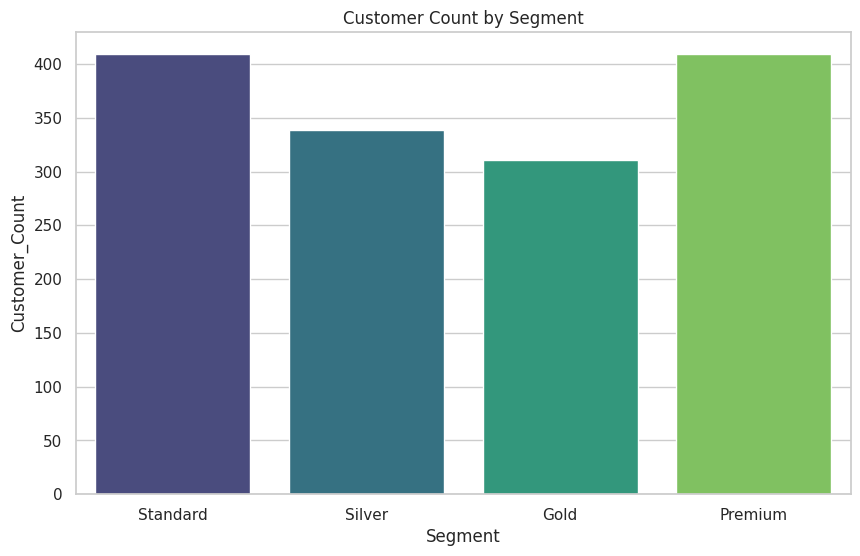

In [ ]:

plt.figure(figsize=(10,6))
sns.barplot(data=segment_summary, x='Segment', y='Customer_Count', palette='viridis')
plt.title("Customer Count by Segment")
plt.show()


# 📊 RFM Segment Analysis

| Segment  | Customer Count | Avg Monetary (₹) | Avg Frequency | Avg Recency (days ago) |
|----------|----------------|------------------|----------------|--------------------------|
| Standard | 409            | ₹538             | 3.5 times      | 222 days                |
| Silver   | 339            | ₹1,527           | 8.9 times      | 154 days                |
| Gold     | 311            | ₹3,669           | 18.5 times     | 143 days                |
| Premium  | 409            | ₹8,188           | 40.1 times     | 63 days                 |

---

# 🔍 Segment Insights

### 🟤 **Standard**
- Low spend, low frequency, long recency → likely inactive or one-time users.
- 🔧 **Strategy**: Re-engagement campaigns (email nudges, limited-time offers), feedback surveys.

### 🟠 **Silver**
- Moderate spend & frequency, with relatively old recency.
- 🔧 **Strategy**: Loyalty points, personalized discount emails, encourage repeat buying to move them toward Gold.

### 🟡 **Gold**
- High value & frequency, but haven't purchased recently → high risk of churn.
- 🔧 **Strategy**: Win-back emails, early access to sales, reactivation discounts.

### 🟢 **Premium**
- Most valuable segment: recent, high frequency, high spend.
- 🔧 **Strategy**: VIP programs, exclusive previews, thank-you gifts, referral incentives.

---

# ✅ How to Use RFM Segments

- **📧 Marketing**: Personalize email content and promotions by segment.
- **🎧 Customer Support**: Prioritize Premium for white-glove support.
- **📦 Inventory**: Ensure high-value segments have product availability.
- **🔁 Retention**: Focus on Silver & Gold for upgrades and retention growth.

---

# 🧮 RFM Scoring Methodology

We used RFM (Recency, Frequency, Monetary) to segment customers:

- **Recency**: Days since last purchase (lower is better)
- **Frequency**: Total orders (higher is better)
- **Monetary**: Total spend (higher is better)

Customers were scored from 1 to 4 in each category:

| Segment   | RFM Score Range |
|-----------|------------------|
| Premium   | 10–12            |
| Gold      | 8–9              |
| Silver    | 6–7              |
| Standard  | ≤5               |

---

# 📊 Segment Summary Table

| Segment  | Count | Avg Spend (₹) | Avg Orders | Avg Recency (days) |
|----------|-------|----------------|------------|---------------------|
| Premium  | 409   | ₹8,188         | 40.1       | 63                  |
| Gold     | 311   | ₹3,669         | 18.5       | 143                 |
| Silver   | 339   | ₹1,527         | 8.9        | 154                 |
| Standard | 409   | ₹538           | 3.5        | 222                 |

---

# 🎯 Segment-wise Strategic Recommendations

### 🟢 Premium
- **Profile**: Most loyal and valuable
- **Actions**:
  - VIP loyalty program
  - Exclusive previews / early access
  - Personalized gifts
  - Referral rewards

### 🟡 Gold
- **Profile**: High value but possible churn risk
- **Actions**:
  - Win-back and reactivation campaigns
  - Reorder reminders
  - Targeted upgrades to Premium tier

### 🟠 Silver
- **Profile**: Growth opportunity
- **Actions**:
  - Personalized discounts
  - Cross-sell campaigns
  - Educational content

### ⚪ Standard
- **Profile**: Inactive or low-engagement users
- **Actions**:
  - Reactivation offers
  - Re-engagement email flows
  - Feedback collection

---

# 🔚 Conclusion

RFM segmentation enables highly targeted strategies across customer segments.  
By focusing on **retaining Premium/Gold** customers and **upgrading or reactivating Silver/Standard** ones, you can boost:

- ✅ Customer Lifetime Value (CLV)
- ✅ Retention
- ✅ Revenue efficiency

Align your **marketing**, **support**, and **product strategies** accordingly for maximum impact.


✅ Question 11:

**11. Analyze the revenue contribution of each customer segment. How can the company focus its efforts on high-value segments while nurturing lower-value segments?**

In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   CustomerID     1468 non-null   int64   
 1   Recency        1468 non-null   int64   
 2   Frequency      1468 non-null   int64   
 3   Monetary       1468 non-null   float64 
 4   R_score        1468 non-null   category
 5   F_score        1468 non-null   category
 6   M_score        1468 non-null   category
 7   RFM_score      1468 non-null   object  
 8   Segment_score  1468 non-null   int64   
 9   Segment        1468 non-null   category
dtypes: category(4), float64(1), int64(4), object(1)
memory usage: 75.5+ KB


In [ ]:
revenue_contribution_summary=rfm.groupby('Segment').agg(
    Customer_count=('CustomerID','count'),
    Total_Revenue=('Monetary','sum')
).reset_index()
revenue_contribution_summary

<ipython-input-308-2677452527>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_contribution_summary=rfm.groupby('Segment').agg(


Segment  Customer_count  Total_Revenue
0  Standard             409      220032.73
1    Silver             339      517505.25
2      Gold             311     1141038.96
3   Premium             409     3348852.75

In [ ]:
total_customers=revenue_contribution_summary['Customer_count'].sum()
total_revenue=revenue_contribution_summary['Total_Revenue'].sum()

In [ ]:
revenue_contribution_summary['% of customers']=((revenue_contribution_summary['Customer_count']/total_customers)*100).round(1)
revenue_contribution_summary['% of revenue']=((revenue_contribution_summary['Total_Revenue']/total_revenue)*100).round(1)

In [ ]:
revenue_contribution_summary

Segment  Customer_count  Total_Revenue  % of customers  % of revenue
0  Standard             409      220032.73            27.9           4.2
1    Silver             339      517505.25            23.1           9.9
2      Gold             311     1141038.96            21.2          21.8
3   Premium             409     3348852.75            27.9          64.1

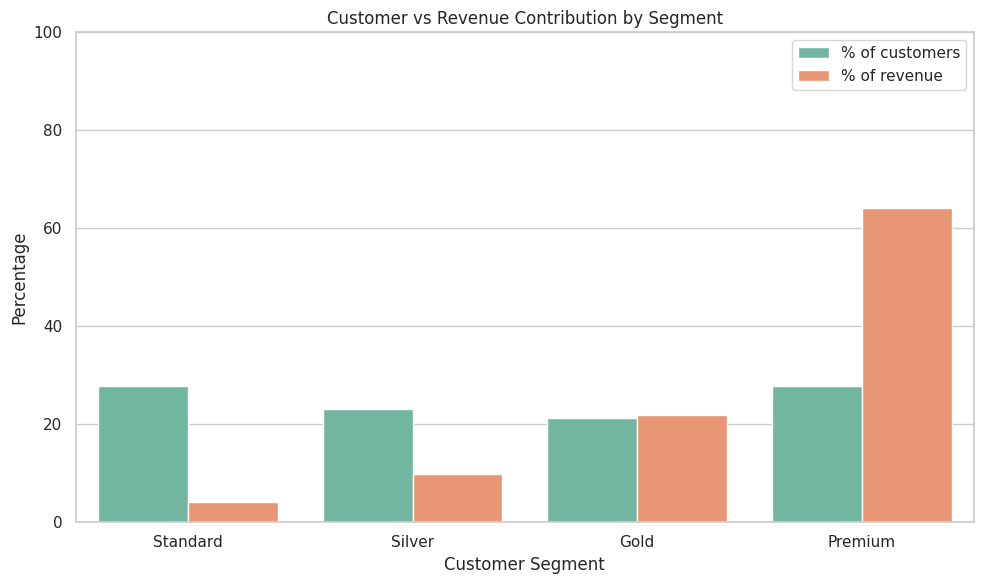

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Bar plot for % of Customers and % of Revenue
fig, ax = plt.subplots(figsize=(10, 6))
segment_plot = revenue_contribution_summary.melt(id_vars='Segment', value_vars=['% of customers', '% of revenue'])

sns.barplot(data=segment_plot, x='Segment', y='value', hue='variable', palette='Set2')
plt.title('Customer vs Revenue Contribution by Segment')
plt.ylabel('Percentage')
plt.xlabel('Customer Segment')
plt.ylim(0, 100)
plt.legend(title='')
plt.tight_layout()
plt.show()


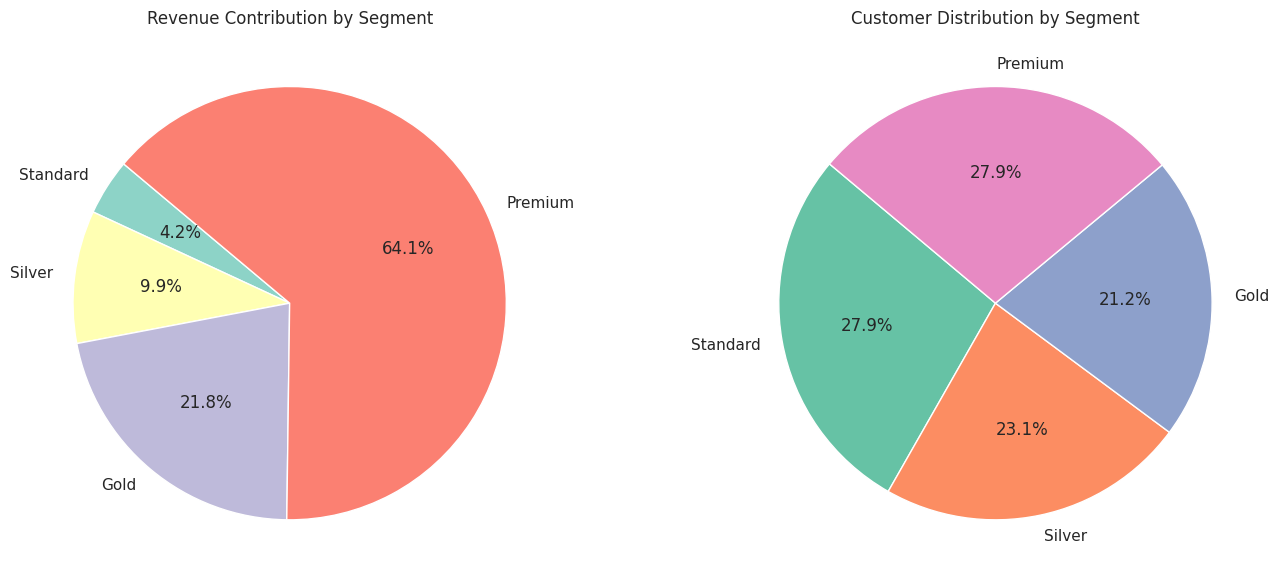

In [ ]:
# Pie chart for Revenue Contribution
plt.figure(figsize=(14, 6))

# Pie 1 - Revenue
plt.subplot(1, 2, 1)
plt.pie(revenue_contribution_summary['% of revenue'], labels=revenue_contribution_summary['Segment'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Revenue Contribution by Segment')

# Pie 2 - Customer Count
plt.subplot(1, 2, 2)
plt.pie(revenue_contribution_summary['% of customers'], labels=revenue_contribution_summary['Segment'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Customer Distribution by Segment')

plt.tight_layout()
plt.show()


# 📊 Segment-wise Revenue and Customer Distribution

| Segment  | Customer Count | Total Revenue (₹) | % of Customers | % of Revenue |
|----------|----------------|--------------------|----------------|---------------|
| Standard | 409            | ₹220,032.73        | 27.9%          | 4.2%          |
| Silver   | 339            | ₹517,505.25        | 23.1%          | 9.9%          |
| Gold     | 311            | ₹1,141,038.96      | 21.2%          | 21.8%         |
| Premium  | 409            | ₹3,348,852.75      | 27.9%          | 64.1%         |

---

# ✅ Key Insights

- 🟢 **Premium customers (27.9%)** contribute **64.1%** of total revenue — **most valuable segment**.
- 🟡 **Gold customers (21.2%)** bring in **21.8%** of revenue — a strong ROI for their size.
- 🟠 **Silver customers (23.1%)** offer **moderate value** — growth potential exists.
- ⚪ **Standard customers (27.9%)** match Premium in count but yield only **4.2%** of revenue — lowest value group.

---

# 🎯 Strategic Recommendations by Segment

### 🔶 Premium – “Delight and Retain”
- VIP programs with loyalty perks.
- Early product previews, access to exclusive launches.
- Upselling based on personalized history and interests.
- High-touch customer support.

### 🟡 Gold – “Engage and Upsell”
- Encourage referrals with reward schemes.
- Personalized product bundles or offers.
- Campaigns to transition them to Premium behavior (increase frequency or basket size).

### ⚪ Silver – “Nurture and Grow”
- Offer bundle discounts or “buy more, save more” promotions.
- Share product tips or tutorials via email or social media.
- Cross-sell complementary products or services.

### ⚫ Standard – “Re-engage or Recycle”
- Use limited-time coupons or free trial offers.
- Set up automated reactivation email flows.
- If unresponsive, reduce direct marketing effort to lower CAC and refocus on higher potential segments.

---

# 📌 Conclusion

The business is **heavily reliant on the Premium segment**, which provides the **majority of revenue** despite being just over a quarter of the customer base.

To ensure **sustainable and diversified growth**:

- ✅ **Retain** and enhance loyalty in **Premium & Gold** segments.
- 📈 **Develop Silver** customers into higher-value buyers.
- ⚠️ **Reassess marketing spend** on Standard customers — prioritize ROI.

This segmentation-driven approach will help **maximize CLV**, **optimize marketing budgets**, and ensure **resilient growth** over time.


✅ Question 12:

**12. Group customers by their month of first purchase and analyze retention rates over time. Which cohorts exhibit the highest and lowest retention rates? What strategies can be implemented to improve retention for weaker cohorts?**

In [ ]:
online_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            52924 non-null  int64         
 1   Transaction_ID        52924 non-null  int64         
 2   Transaction_Date      52924 non-null  datetime64[ns]
 3   Product_SKU           52924 non-null  object        
 4   Product_Description   52924 non-null  object        
 5   Product_Category      52924 non-null  object        
 6   Quantity              52924 non-null  int64         
 7   Avg_Price             52924 non-null  float64       
 8   Delivery_Charges      52924 non-null  float64       
 9   Coupon_Status         52924 non-null  object        
 10  First_Purchase_Date   52924 non-null  datetime64[ns]
 11  Aquisition_Month      52924 non-null  period[M]     
 12  Transaction_Month     52924 non-null  period[M]     
 13  First_Purchase_M

In [ ]:
df=online_sales.copy()

In [ ]:
df.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status First_Purchase_Date  \
0         1     153.71               6.5          Used          2019-01-01   
1         1     153.71               6.5          Used          2019-01-01   
2         1       2.05               6.5          Used          2019-01-01   
3         5      17.53               6.5      Not Used          2019-01-01   
4         1      16.50               6.5          Used          2019-01-01   

  Aquisition_Month Transaction_Month First_Purchase_Month Customer_Type  \
0          2019-01           2019-01              2019-01           New   
1          2019-01           2019-01              2019-01           New   
2          2019-01           2019-01              2019-01           New   
3          2019-01           2019-01              2019-01           New   
4          2019-01           2019-01              2019-01           New   

   Revenue Month_name  
0   160.21        Jan  
1   160.21        Jan  
2     8.55        Jan  
3    94.15        Jan  
4    23.00        Jan

In [ ]:
from operator import attrgetter

In [ ]:
df['Cohort_Index']=(df['Transaction_Month']-df['First_Purchase_Month']).apply(attrgetter('n'))

In [ ]:
df.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status First_Purchase_Date  \
0         1     153.71               6.5          Used          2019-01-01   
1         1     153.71               6.5          Used          2019-01-01   
2         1       2.05               6.5          Used          2019-01-01   
3         5      17.53               6.5      Not Used          2019-01-01   
4         1      16.50               6.5          Used          2019-01-01   

  Aquisition_Month Transaction_Month First_Purchase_Month Customer_Type  \
0          2019-01           2019-01              2019-01           New   
1          2019-01           2019-01              2019-01           New   
2          2019-01           2019-01              2019-01           New   
3          2019-01           2019-01              2019-01           New   
4          2019-01           2019-01              2019-01           New   

   Revenue Month_name  Cohort_Index  
0   160.21        Jan             0  
1   160.21        Jan             0  
2     8.55        Jan             0  
3    94.15        Jan             0  
4    23.00        Jan             0

In [ ]:
df['Cohort_Index'].value_counts()

Cohort_Index
0     32033
5      3538
3      2782
6      2520
4      2251
2      2175
7      2097
1      1941
8      1107
9      1021
11      749
10      710
Name: count, dtype: int64

In [ ]:
cohort_data=df.groupby(['First_Purchase_Month','Cohort_Index'])['CustomerID'].nunique().reset_index()

In [ ]:
cohort_pivot=cohort_data.pivot(
    index='First_Purchase_Month',
    columns='Cohort_Index',
    values='CustomerID'
)
cohort_pivot

Cohort_Index             0     1     2     3     4     5     6     7     8   \
First_Purchase_Month                                                          
2019-01               215.0  13.0  24.0  34.0  23.0  44.0  35.0  47.0  23.0   
2019-02                96.0   7.0   9.0  16.0  17.0  22.0  19.0  15.0  12.0   
2019-03               177.0  18.0  35.0  25.0  32.0  33.0  22.0  22.0  15.0   
2019-04               163.0  14.0  24.0  24.0  18.0  15.0  10.0  16.0  12.0   
2019-05               112.0  12.0   9.0  13.0  10.0  13.0  14.0   8.0   NaN   
2019-06               137.0  20.0  22.0  12.0  11.0  14.0  11.0   NaN   NaN   
2019-07                94.0  13.0   4.0   6.0  11.0   9.0   NaN   NaN   NaN   
2019-08               135.0  14.0  15.0  10.0   8.0   NaN   NaN   NaN   NaN   
2019-09                78.0   6.0   3.0   2.0   NaN   NaN   NaN   NaN   NaN   
2019-10                87.0   6.0   4.0   NaN   NaN   NaN   NaN   NaN   NaN   
2019-11                68.0   7.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-12               106.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

Cohort_Index            9     10    11  
First_Purchase_Month                    
2019-01               28.0  20.0  34.0  
2019-02               11.0  16.0   NaN  
2019-03               19.0   NaN   NaN  
2019-04                NaN   NaN   NaN  
2019-05                NaN   NaN   NaN  
2019-06                NaN   NaN   NaN  
2019-07                NaN   NaN   NaN  
2019-08                NaN   NaN   NaN  
2019-09                NaN   NaN   NaN  
2019-10                NaN   NaN   NaN  
2019-11                NaN   NaN   NaN  
2019-12                NaN   NaN   NaN

In [ ]:
cohort_size = cohort_pivot.iloc[:, 0]
cohort_size

First_Purchase_Month
2019-01    215.0
2019-02     96.0
2019-03    177.0
2019-04    163.0
2019-05    112.0
2019-06    137.0
2019-07     94.0
2019-08    135.0
2019-09     78.0
2019-10     87.0
2019-11     68.0
2019-12    106.0
Freq: M, Name: 0, dtype: float64

In [ ]:
cohort_pivot.shape

(12, 12)

In [ ]:
retention=cohort_pivot.divide(cohort_size,axis=0).round(3)
retention

Cohort_Index           0      1      2      3      4      5      6      7   \
First_Purchase_Month                                                         
2019-01               1.0  0.060  0.112  0.158  0.107  0.205  0.163  0.219   
2019-02               1.0  0.073  0.094  0.167  0.177  0.229  0.198  0.156   
2019-03               1.0  0.102  0.198  0.141  0.181  0.186  0.124  0.124   
2019-04               1.0  0.086  0.147  0.147  0.110  0.092  0.061  0.098   
2019-05               1.0  0.107  0.080  0.116  0.089  0.116  0.125  0.071   
2019-06               1.0  0.146  0.161  0.088  0.080  0.102  0.080    NaN   
2019-07               1.0  0.138  0.043  0.064  0.117  0.096    NaN    NaN   
2019-08               1.0  0.104  0.111  0.074  0.059    NaN    NaN    NaN   
2019-09               1.0  0.077  0.038  0.026    NaN    NaN    NaN    NaN   
2019-10               1.0  0.069  0.046    NaN    NaN    NaN    NaN    NaN   
2019-11               1.0  0.103    NaN    NaN    NaN    NaN    NaN    NaN   
2019-12               1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

Cohort_Index             8      9      10     11  
First_Purchase_Month                              
2019-01               0.107  0.130  0.093  0.158  
2019-02               0.125  0.115  0.167    NaN  
2019-03               0.085  0.107    NaN    NaN  
2019-04               0.074    NaN    NaN    NaN  
2019-05                 NaN    NaN    NaN    NaN  
2019-06                 NaN    NaN    NaN    NaN  
2019-07                 NaN    NaN    NaN    NaN  
2019-08                 NaN    NaN    NaN    NaN  
2019-09                 NaN    NaN    NaN    NaN  
2019-10                 NaN    NaN    NaN    NaN  
2019-11                 NaN    NaN    NaN    NaN  
2019-12                 NaN    NaN    NaN    NaN

In [ ]:
retention_percent=(retention*100).round(1)
retention_percent

Cohort_Index             0     1     2     3     4     5     6     7     8   \
First_Purchase_Month                                                          
2019-01               100.0   6.0  11.2  15.8  10.7  20.5  16.3  21.9  10.7   
2019-02               100.0   7.3   9.4  16.7  17.7  22.9  19.8  15.6  12.5   
2019-03               100.0  10.2  19.8  14.1  18.1  18.6  12.4  12.4   8.5   
2019-04               100.0   8.6  14.7  14.7  11.0   9.2   6.1   9.8   7.4   
2019-05               100.0  10.7   8.0  11.6   8.9  11.6  12.5   7.1   NaN   
2019-06               100.0  14.6  16.1   8.8   8.0  10.2   8.0   NaN   NaN   
2019-07               100.0  13.8   4.3   6.4  11.7   9.6   NaN   NaN   NaN   
2019-08               100.0  10.4  11.1   7.4   5.9   NaN   NaN   NaN   NaN   
2019-09               100.0   7.7   3.8   2.6   NaN   NaN   NaN   NaN   NaN   
2019-10               100.0   6.9   4.6   NaN   NaN   NaN   NaN   NaN   NaN   
2019-11               100.0  10.3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-12               100.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

Cohort_Index            9     10    11  
First_Purchase_Month                    
2019-01               13.0   9.3  15.8  
2019-02               11.5  16.7   NaN  
2019-03               10.7   NaN   NaN  
2019-04                NaN   NaN   NaN  
2019-05                NaN   NaN   NaN  
2019-06                NaN   NaN   NaN  
2019-07                NaN   NaN   NaN  
2019-08                NaN   NaN   NaN  
2019-09                NaN   NaN   NaN  
2019-10                NaN   NaN   NaN  
2019-11                NaN   NaN   NaN  
2019-12                NaN   NaN   NaN

In [ ]:
retention_percent.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 12 entries, 2019-01 to 2019-12
Freq: M
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
 1   1       11 non-null     float64
 2   2       10 non-null     float64
 3   3       9 non-null      float64
 4   4       8 non-null      float64
 5   5       7 non-null      float64
 6   6       6 non-null      float64
 7   7       5 non-null      float64
 8   8       4 non-null      float64
 9   9       3 non-null      float64
 10  10      2 non-null      float64
 11  11      1 non-null      float64
dtypes: float64(12)
memory usage: 1.2 KB


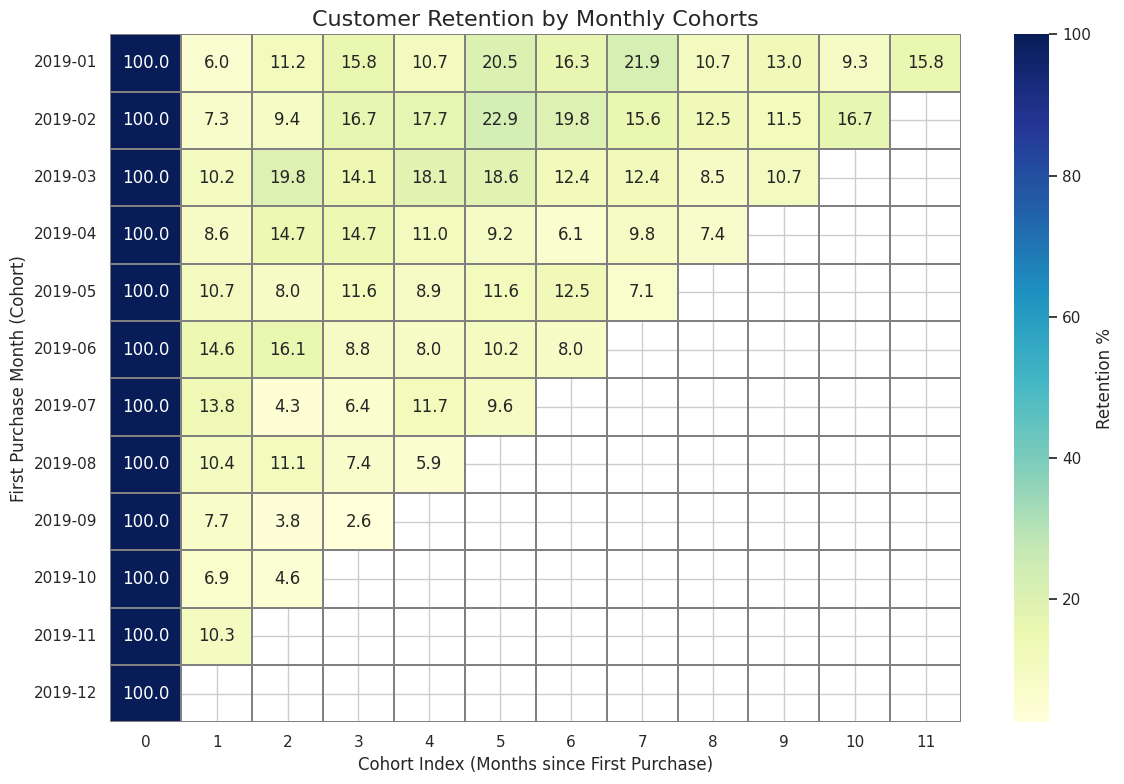

In [ ]:


plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(retention_percent,
            annot=True,
            fmt=".1f",
            cmap="YlGnBu",
            linewidths=0.3,
            linecolor='gray',
            cbar_kws={'label': 'Retention %'})

# Title and axis labels
plt.title('Customer Retention by Monthly Cohorts', fontsize=16)
plt.xlabel('Cohort Index (Months since First Purchase)', fontsize=12)
plt.ylabel('First Purchase Month (Cohort)', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()




# ✅ Key Observations from Retention Table

| First Purchase Month | Month 1 | Month 2 | Month 3 | Month 4 | Month 5 |
|----------------------|---------|---------|---------|---------|---------|
| **Highest Retention Cohort** |  |  |  |  | **Feb 2019 – 22.9% (Month 5)** |
| **Lowest Retention Cohort**  |  |  | **Sep 2019 – 2.6%** |  |         |
| **Best Early Retention**     | **June 2019 – 14.6%** |  |  |  |         |
| **Steady Long-Term Retention** |  |  |  |  |  |
| ⮩ **Jan 2019** retains users across:  
  - 21.9% (Month 7)  
  - 20.5% (Month 5)  
  - 15.8% (Month 11) |

---

## 📉 Cohorts with Lowest Retention

- **September 2019**: Sharp decline — from 100% to just **2.6% by Month 3**.
- **October & November 2019**: Weak **Month 1 retention** (6–10%) and little follow-up data — possibly due to recency or seasonal disengagement.
- 🛠 These likely reflect:
  - Poor user experience
  - Ineffective follow-up
  - Weak product engagement or seasonal drop-off

---

## 📈 Cohorts with Strong Retention

- **February 2019 & June 2019**:
  - High Month 4–5 retention → sign of strong onboarding, product fit, or timely campaigns.
- **January 2019**:
  - Long-term consistency across months — possibly due to loyal user base or effective re-engagement.

---

# 📌 Strategies to Improve Retention in Weaker Cohorts

### 🔧 1. Improve Onboarding Experience
- Many users drop after **Month 1**
- ➤ Send welcome emails, how-to guides, product usage tips
- ➤ Use in-app popups or chatbots for first-time users

### 💬 2. Email/SMS Campaigns for Months 1–3
- Set automated flows to deliver:
  - Reminders to reorder
  - New product suggestions
  - Limited-time coupons

### 🎁 3. Incentivize 2nd and 3rd Purchases
- Offer **“Thank You” discounts** for returning within 30 days
- “Buy again and get X% off” deals to nudge habits

### 📊 4. Analyze Product & Channel Trends
- Study what products/cohorts (e.g., **Sep 2019**) underperformed
- Investigate:
  - Product quality or relevance
  - Support issues
  - Acquisition channel drop-offs

### 📆 5. Align with Seasonal Patterns
- Q4 shoppers (Oct–Dec) might be **gift-season or holiday buyers**
- Set up **yearly retargeting** to recapture them during same time next year

---

# ✅ Final Summary

| Cohort        | Performance |
|---------------|-------------|
| ✅ Strongest   | Jan, Feb, June 2019 |
| ❌ Weakest    | Sep, Oct 2019 |

- Analyze high-retention months to **replicate successful onboarding and engagement patterns**.
- For low-retention cohorts, focus on:
  - **Faster follow-ups**
  - **Repeat purchase nudges**
  - **Seasonal reactivation**
  
Improving early retention and leveraging cohort insights will **boost long-term CLV** and reduce churn.


✅ Question 13:

**13. Analyze the lifetime value of customers acquired in different months. How can this insight inform acquisition and retention strategies?**

In [ ]:
df.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status First_Purchase_Date  \
0         1     153.71               6.5          Used          2019-01-01   
1         1     153.71               6.5          Used          2019-01-01   
2         1       2.05               6.5          Used          2019-01-01   
3         5      17.53               6.5      Not Used          2019-01-01   
4         1      16.50               6.5          Used          2019-01-01   

  Aquisition_Month Transaction_Month First_Purchase_Month Customer_Type  \
0          2019-01           2019-01              2019-01           New   
1          2019-01           2019-01              2019-01           New   
2          2019-01           2019-01              2019-01           New   
3          2019-01           2019-01              2019-01           New   
4          2019-01           2019-01              2019-01           New   

   Revenue Month_name  Cohort_Index  
0   160.21        Jan             0  
1   160.21        Jan             0  
2     8.55        Jan             0  
3    94.15        Jan             0  
4    23.00        Jan             0

In [ ]:
cohort_revenue=df.groupby(['First_Purchase_Month','Cohort_Index'])['Revenue'].sum().reset_index()
cohort_revenue

First_Purchase_Month  Cohort_Index    Revenue
0               2019-01             0  462866.90
1               2019-01             1   45272.03
2               2019-01             2   58542.51
3               2019-01             3  122221.36
4               2019-01             4   34476.56
..                  ...           ...        ...
73              2019-10             1   10396.37
74              2019-10             2    3062.82
75              2019-11             0  231766.75
76              2019-11             1    5049.14
77              2019-12             0  265327.42

[78 rows x 3 columns]

In [ ]:
ltv=cohort_revenue.pivot(
    index='First_Purchase_Month',
    columns='Cohort_Index',
    values='Revenue'
).fillna(0)

In [ ]:
ltv_cumulative=ltv.cumsum(axis=1).round(2)
ltv_cumulative

Cohort_Index                 0          1          2          3          4   \
First_Purchase_Month                                                          
2019-01               462866.90  508138.93  566681.44  688902.80  723379.36   
2019-02               314764.37  324516.25  338847.43  363960.61  390512.26   
2019-03               342113.64  386721.77  427438.81  461019.73  513866.75   
2019-04               261939.49  287634.68  305959.51  339430.42  368415.75   
2019-05               223157.62  230649.27  244654.77  261831.91  280620.29   
2019-06               213946.91  226402.77  241429.76  259400.48  270701.34   
2019-07               168033.12  184630.09  192530.95  208418.80  233837.67   
2019-08               220855.86  232346.06  244435.21  275071.17  292840.85   
2019-09               164597.74  166627.69  169375.02  170095.81  170095.81   
2019-10               244227.80  254624.17  257686.99  257686.99  257686.99   
2019-11               231766.75  236815.89  236815.89  236815.89  236815.89   
2019-12               265327.42  265327.42  265327.42  265327.42  265327.42   

Cohort_Index                 5          6          7          8           9   \
First_Purchase_Month                                                           
2019-01               782078.36  875181.05  933081.99  978789.85  1029161.92   
2019-02               437959.16  465504.42  515124.01  533594.84   564378.50   
2019-03               592088.20  644691.63  688186.07  714693.79   754046.98   
2019-04               401290.79  418534.54  478613.95  498332.19   498332.19   
2019-05               321146.75  361375.34  373681.97  373681.97   373681.97   
2019-06               310263.56  326935.10  326935.10  326935.10   326935.10   
2019-07               264720.40  264720.40  264720.40  264720.40   264720.40   
2019-08               292840.85  292840.85  292840.85  292840.85   292840.85   
2019-09               170095.81  170095.81  170095.81  170095.81   170095.81   
2019-10               257686.99  257686.99  257686.99  257686.99   257686.99   
2019-11               236815.89  236815.89  236815.89  236815.89   236815.89   
2019-12               265327.42  265327.42  265327.42  265327.42   265327.42   

Cohort_Index                  10          11  
First_Purchase_Month                          
2019-01               1072289.59  1171623.97  
2019-02                615322.12   615322.12  
2019-03                754046.98   754046.98  
2019-04                498332.19   498332.19  
2019-05                373681.97   373681.97  
2019-06                326935.10   326935.10  
2019-07                264720.40   264720.40  
2019-08                292840.85   292840.85  
2019-09                170095.81   170095.81  
2019-10                257686.99   257686.99  
2019-11                236815.89   236815.89  
2019-12                265327.42   265327.42

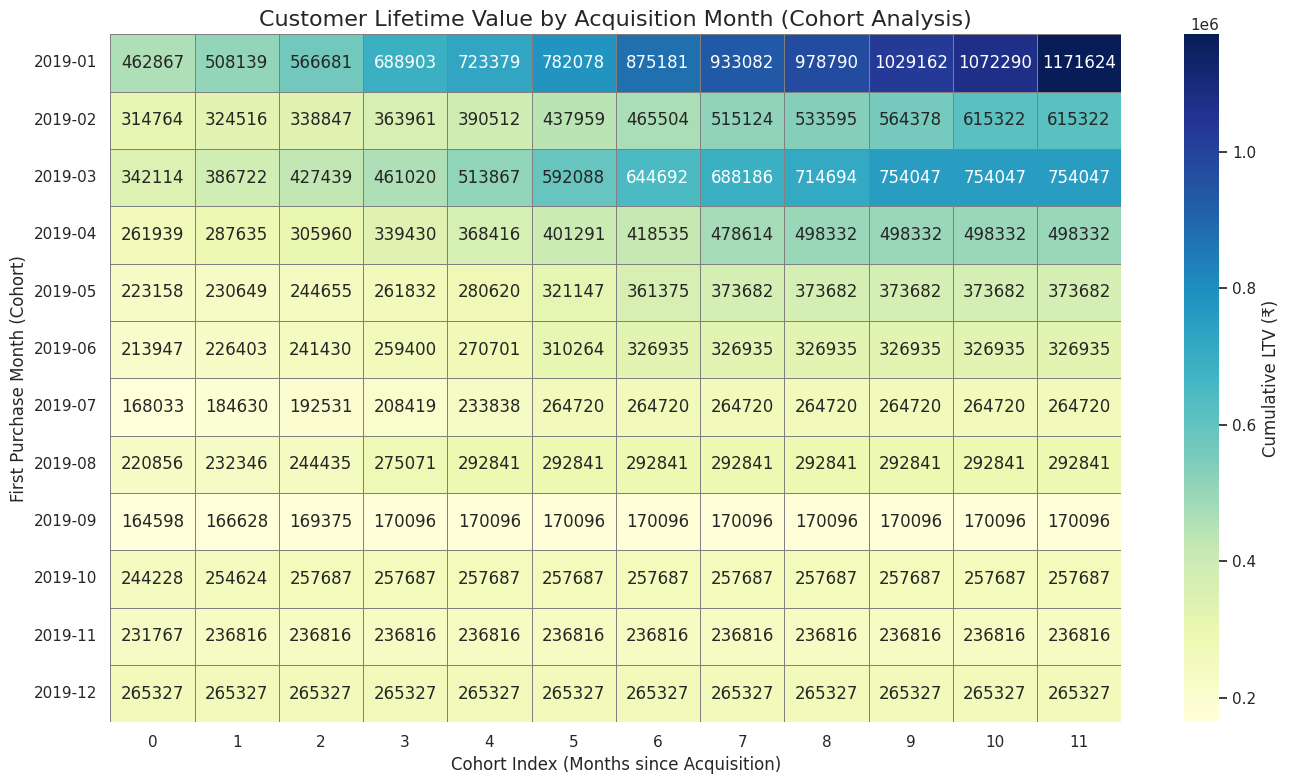

In [ ]:
# Plotting the heatmap
plt.figure(figsize=(14, 8))
plt.title('Customer Lifetime Value by Acquisition Month (Cohort Analysis)', fontsize=16)
sns.heatmap(ltv_cumulative, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Cumulative LTV (₹)'})
plt.xlabel('Cohort Index (Months since Acquisition)', fontsize=12)
plt.ylabel('First Purchase Month (Cohort)', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


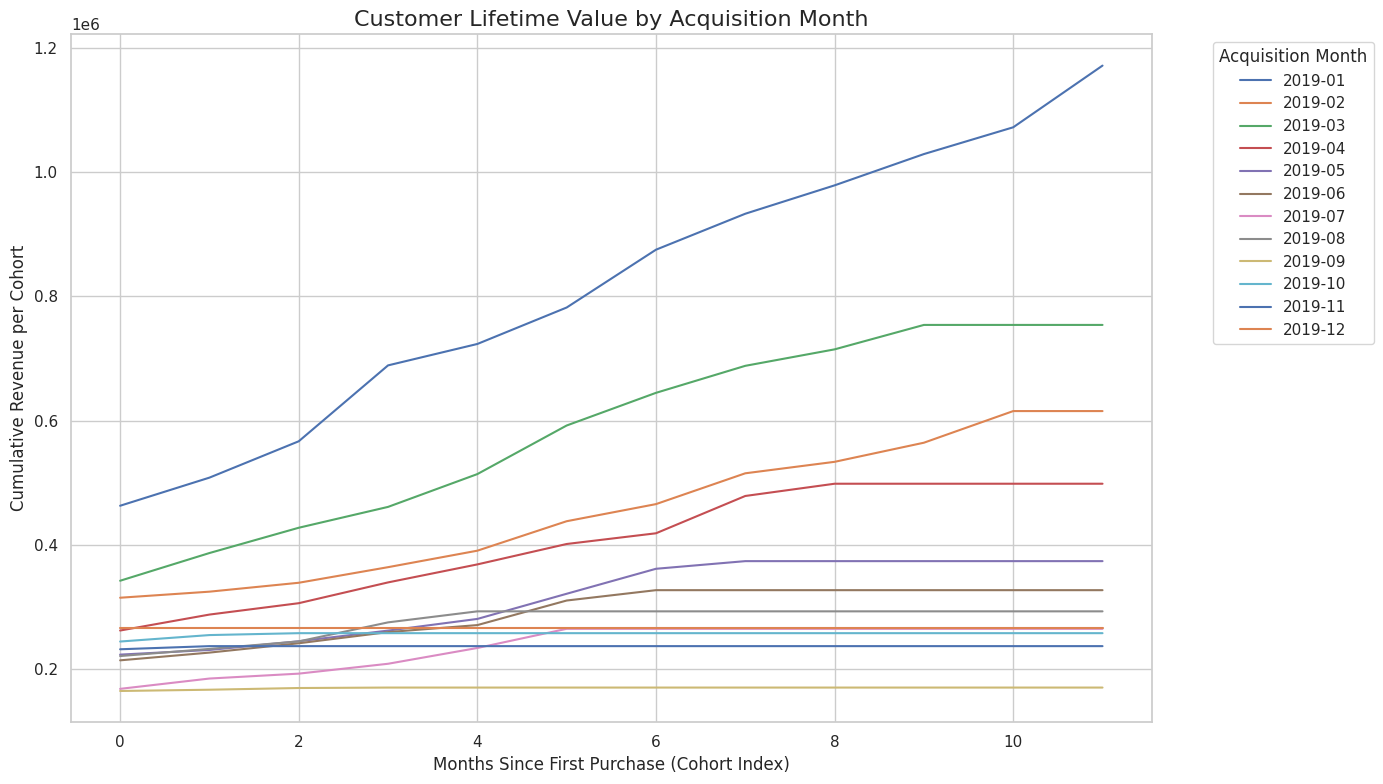

In [ ]:

plt.figure(figsize=(14, 8))

# Plot LTV over time for each cohort
for cohort in ltv_cumulative.index:
    plt.plot(ltv_cumulative.columns, ltv_cumulative.loc[cohort], label=str(cohort))

plt.title('Customer Lifetime Value by Acquisition Month', fontsize=16)
plt.xlabel('Months Since First Purchase (Cohort Index)', fontsize=12)
plt.ylabel('Cumulative Revenue per Cohort', fontsize=12)
plt.legend(title='Acquisition Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# ✅ Summary of Key Insights from LTV Table

---

## 🔍 Observation 1: January 2019 was the strongest cohort
- LTV grew from **₹462,867** (Month 0) to **₹1,171,624** (Month 11) — **highest total LTV** among all cohorts.
- Indicates strong customer lifetime value, **high retention**, and **engagement** over time.

## 🔍 Observation 2: March 2019 also performed well
- Started at ₹342,114 and reached ₹754,047.
- Not as high as January, but shows **solid cohort quality** and effective post-acquisition strategy.

## 🔍 Observation 3: Later cohorts had much lower LTVs
- July to December cohorts **plateaued early** with little growth after Month 1.
- Example:
  - **November:** ₹236,816
  - **December:** ₹265,327
- Suggests weak retention or less effective acquisition strategies.

## 🔍 Observation 4: Early plateau in some cohorts
- **September 2019:** Plateaued at ₹170,095 by Month 3.
- Indicates users may not have returned after initial purchase.

---

# 📈 LTV Table Trend Summary (Selected Highlights)

| First Purchase Month | Month 0 LTV | Month 11 LTV | LTV Growth | % Growth |
|----------------------|-------------|--------------|------------|----------|
| Jan 2019             | ₹462,867    | ₹1,171,624   | ₹708,757   | 153%     |
| Feb 2019             | ₹314,764    | ₹615,322     | ₹300,558   | 96%      |
| Mar 2019             | ₹342,114    | ₹754,047     | ₹411,933   | 120%     |
| Apr 2019             | ₹261,939    | ₹498,332     | ₹236,393   | 90%      |
| Jul 2019             | ₹168,033    | ₹264,720     | ₹96,687    | 57%      |
| Dec 2019             | ₹265,327    | ₹265,327     | ₹0         | 0%       |

---

# 💡 Strategic Recommendations

### 📌 Acquisition Strategy
- Double down on campaigns that led to **Jan & Mar cohorts**.
  - Investigate **channels**, **audience targeting**, and **campaign creatives**.
- **Avoid over-investing** in late 2019 campaigns unless retention is fixed.

### 📌 Retention Strategy
- For weaker cohorts (e.g., Nov/Dec):
  - Run **re-engagement flows** — emails, discounts, personalized product suggestions.
  - Improve **onboarding experience** — walkthroughs, reminders, incentives for 2nd purchase.

### 📌 Segmentation and Targeting
- Segment high-LTV cohorts (like Jan, Mar) to find patterns:
  - Location
  - Product purchased
  - Device or source
- Use this intelligence to target **lookalike audiences**.

### 📌 Lifetime Value vs CAC
- Compare **LTV to CAC** for each cohort:
  - If **CAC > LTV**, you’re overspending on acquisition.
  - Shift focus to **low-CAC, high-retention** channels.

---

# 🧠 Final Conclusion

- **January and March 2019** were the **most profitable** cohorts.
- These users showed strong **long-term engagement** and **revenue growth**.
- **July–Dec cohorts** underperformed and **plateaued early** — requiring new **retention and onboarding strategies**.
- Use this LTV analysis to drive **data-backed acquisition**, optimize **marketing spend**, and **increase CLTV** across cohorts.



✅ Question 14:

**14. Do customers who use coupons have a different average transaction value compared to those who do not? Conduct a statistical test to validate this hypothesis. What implications does this have for the company's discount and coupon strategies?**

In [ ]:
df.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status First_Purchase_Date  \
0         1     153.71               6.5          Used          2019-01-01   
1         1     153.71               6.5          Used          2019-01-01   
2         1       2.05               6.5          Used          2019-01-01   
3         5      17.53               6.5      Not Used          2019-01-01   
4         1      16.50               6.5          Used          2019-01-01   

  Aquisition_Month Transaction_Month First_Purchase_Month Customer_Type  \
0          2019-01           2019-01              2019-01           New   
1          2019-01           2019-01              2019-01           New   
2          2019-01           2019-01              2019-01           New   
3          2019-01           2019-01              2019-01           New   
4          2019-01           2019-01              2019-01           New   

   Revenue Month_name  Cohort_Index  
0   160.21        Jan             0  
1   160.21        Jan             0  
2     8.55        Jan             0  
3    94.15        Jan             0  
4    23.00        Jan             0

In [ ]:
coupon_used_revenue=df[df['Coupon_Status']=='Used']['Revenue']
coupon_not_used_revenue=df[df['Coupon_Status']!='Used']['Revenue']

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
t_stat,p_value=ttest_ind(coupon_used_revenue,coupon_not_used_revenue,equal_var=False)

In [ ]:
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -1.0837
P-value: 0.2785


In [ ]:
print("Avg. Transaction Value with Coupon:", coupon_used_revenue.mean())
print("Avg. Transaction Value without Coupon:", coupon_not_used_revenue.mean())

Avg. Transaction Value with Coupon: 97.64872095621091
Avg. Transaction Value without Coupon: 99.34685865219875


In [ ]:
df.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status First_Purchase_Date  \
0         1     153.71               6.5          Used          2019-01-01   
1         1     153.71               6.5          Used          2019-01-01   
2         1       2.05               6.5          Used          2019-01-01   
3         5      17.53               6.5      Not Used          2019-01-01   
4         1      16.50               6.5          Used          2019-01-01   

  Aquisition_Month Transaction_Month First_Purchase_Month Customer_Type  \
0          2019-01           2019-01              2019-01           New   
1          2019-01           2019-01              2019-01           New   
2          2019-01           2019-01              2019-01           New   
3          2019-01           2019-01              2019-01           New   
4          2019-01           2019-01              2019-01           New   

   Revenue Month_name  Cohort_Index  
0   160.21        Jan             0  
1   160.21        Jan             0  
2     8.55        Jan             0  
3    94.15        Jan             0  
4    23.00        Jan             0

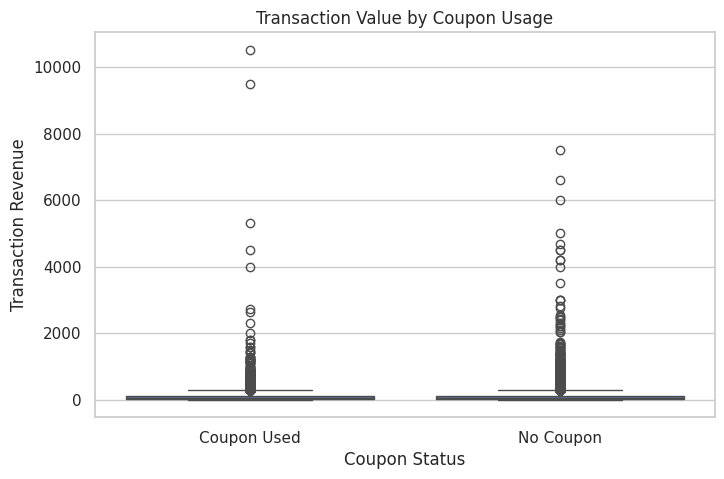

In [ ]:
# Create a new column for visualization
df['Used_Coupon'] = df['Coupon_Status'].map({'Used': 'Coupon Used', 'Not Used': 'No Coupon','Clicked':'No Coupon'})

# Plot boxplot of revenue
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Used_Coupon', y='Revenue')
plt.title("Transaction Value by Coupon Usage")
plt.ylabel("Transaction Revenue")
plt.xlabel("Coupon Status")
plt.show()


# 📊 T-Test Summary: Coupon Users vs Non-Users

### 🎯 Statistical Test Result:
- **Test Type**: Independent t-test
- **T-statistic**: -1.0837  
- **P-value**: 0.2785  

✅ Since **p > 0.05**, we **fail to reject the null hypothesis**.

### ➤ Interpretation:
There is **no statistically significant difference** in the average transaction value between customers **who used coupons** and those who **did not use coupons**.

---

## 🎯 Implications for the Company’s Coupon Strategy

- 📉 **Coupons are not significantly influencing transaction size.**
- 🚫 The **current coupon approach** may not be effectively increasing **revenue per transaction**.

### 💡 Recommended Strategic Actions:

1. **Refine Coupon Targeting**
   - Shift from broad coupon distribution to **segment-specific offers**.
   - Focus on use cases like:
     - **Customer acquisition**
     - **Win-back/reactivation**
     - **New product trials**

2. **Encourage Higher-Value Purchases**
   - Set **minimum order values** for coupon eligibility.
   - Use tiered rewards (e.g., ₹100 off on ₹1000+, ₹200 off on ₹1500+).

3. **Shift Metric Focus**
   - Evaluate if coupons are improving:
     - **Order frequency**
     - **Customer retention**
     - **Customer lifetime value (CLV)**
   - Run follow-up analyses to measure these impacts.

4. **A/B Test Smarter Coupon Formats**
   - Compare flat vs % discounts
   - Try personalized, behavior-based coupons (e.g., after cart abandonment)

---

## 📌 Conclusion:

While the t-test shows that coupons do not significantly increase the average transaction value, they may still drive other valuable outcomes. To optimize coupon effectiveness:
- Target specific goals (retention, acquisition)
- Personalize offers
- Monitor broader KPIs (frequency, CLV, ROI)

This data-backed refinement can **turn coupons into a strategic asset** rather than a flat discount tool.


✅ Question 15:

**15. Do purchase behaviors (e.g., order frequency, order value) vary significantly across different demographic groups or pricing factors (e.g., delivery charges)? Test for differences in purchase behavior across locations, age groups, or delivery charge tiers. How can these insights inform personalized marketing and pricing strategies?**

In [ ]:
df.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status First_Purchase_Date  \
0         1     153.71               6.5          Used          2019-01-01   
1         1     153.71               6.5          Used          2019-01-01   
2         1       2.05               6.5          Used          2019-01-01   
3         5      17.53               6.5      Not Used          2019-01-01   
4         1      16.50               6.5          Used          2019-01-01   

  Aquisition_Month Transaction_Month First_Purchase_Month Customer_Type  \
0          2019-01           2019-01              2019-01           New   
1          2019-01           2019-01              2019-01           New   
2          2019-01           2019-01              2019-01           New   
3          2019-01           2019-01              2019-01           New   
4          2019-01           2019-01              2019-01           New   

   Revenue Month_name  Cohort_Index  Used_Coupon  
0   160.21        Jan             0  Coupon Used  
1   160.21        Jan             0  Coupon Used  
2     8.55        Jan             0  Coupon Used  
3    94.15        Jan             0    No Coupon  
4    23.00        Jan             0  Coupon Used

In [ ]:
online_sales.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status First_Purchase_Date  \
0         1     153.71               6.5          Used          2019-01-01   
1         1     153.71               6.5          Used          2019-01-01   
2         1       2.05               6.5          Used          2019-01-01   
3         5      17.53               6.5      Not Used          2019-01-01   
4         1      16.50               6.5          Used          2019-01-01   

  Aquisition_Month Transaction_Month First_Purchase_Month Customer_Type  \
0          2019-01           2019-01              2019-01           New   
1          2019-01           2019-01              2019-01           New   
2          2019-01           2019-01              2019-01           New   
3          2019-01           2019-01              2019-01           New   
4          2019-01           2019-01              2019-01           New   

   Revenue Month_name  
0   160.21        Jan  
1   160.21        Jan  
2     8.55        Jan  
3    94.15        Jan  
4    23.00        Jan

In [ ]:
customers_data.head()

CustomerID Gender    Location  Tenure_Months
0       17850      M     Chicago             12
1       13047      M  California             43
2       12583      M     Chicago             33
3       13748      F  California             30
4       15100      M  California             49

In [ ]:
df=pd.merge(df,customers_data,on='CustomerID',how='left')

In [ ]:
df.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  ... Transaction_Month  \
0         1     153.71               6.5          Used  ...           2019-01   
1         1     153.71               6.5          Used  ...           2019-01   
2         1       2.05               6.5          Used  ...           2019-01   
3         5      17.53               6.5      Not Used  ...           2019-01   
4         1      16.50               6.5          Used  ...           2019-01   

  First_Purchase_Month Customer_Type Revenue Month_name  Cohort_Index  \
0              2019-01           New  160.21        Jan             0   
1              2019-01           New  160.21        Jan             0   
2              2019-01           New    8.55        Jan             0   
3              2019-01           New   94.15        Jan             0   
4              2019-01           New   23.00        Jan             0   

   Used_Coupon  Gender Location Tenure_Months  
0  Coupon Used       M  Chicago            12  
1  Coupon Used       M  Chicago            12  
2  Coupon Used       M  Chicago            12  
3    No Coupon       M  Chicago            12  
4  Coupon Used       M  Chicago            12  

[5 rows x 22 columns]

In [ ]:
df['Delivery_charge_tier']=pd.qcut(df['Delivery_Charges'],3,labels=['Low','Medium','High'])

In [ ]:
df.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  ...  \
0         1     153.71               6.5          Used  ...   
1         1     153.71               6.5          Used  ...   
2         1       2.05               6.5          Used  ...   
3         5      17.53               6.5      Not Used  ...   
4         1      16.50               6.5          Used  ...   

  First_Purchase_Month Customer_Type Revenue Month_name Cohort_Index  \
0              2019-01           New  160.21        Jan            0   
1              2019-01           New  160.21        Jan            0   
2              2019-01           New    8.55        Jan            0   
3              2019-01           New   94.15        Jan            0   
4              2019-01           New   23.00        Jan            0   

   Used_Coupon Gender  Location Tenure_Months Delivery_charge_tier  
0  Coupon Used      M   Chicago            12               Medium  
1  Coupon Used      M   Chicago            12               Medium  
2  Coupon Used      M   Chicago            12               Medium  
3    No Coupon      M   Chicago            12               Medium  
4  Coupon Used      M   Chicago            12               Medium  

[5 rows x 23 columns]

In [ ]:
location_revenue=df.groupby('Location')['Revenue'].mean().reset_index()
location_revenue

Location     Revenue
0     California  100.111390
1        Chicago   98.966910
2     New Jersey  100.472594
3       New York   94.563620
4  Washington DC  103.965253

In [ ]:
annova_location_revenue=[df[df['Location']==loc]['Revenue'] for loc in df['Location'].unique()]
annova_location_revenue[0]

0        160.21
1        160.21
2          8.55
3         94.15
4         23.00
          ...  
52904    158.38
52905    158.38
52906     20.38
52907     20.38
52908    158.38
Name: Revenue, Length: 18380, dtype: float64

In [ ]:
from scipy.stats import f_oneway

In [ ]:
f_stat,p_value=f_oneway(*annova_location_revenue)
f_stat,p_value

(np.float64(2.8361212203128483), np.float64(0.02296323645910237))

In [ ]:
df['Delivery_charge_tier'].unique()

['Medium', 'High', 'Low']
Categories (3, object): ['Low' < 'Medium' < 'High']

In [ ]:
deliver_charge_tier_revenue=[df[df['Delivery_charge_tier']==tier]['Revenue'] for tier in df['Delivery_charge_tier'].unique()]
deliver_charge_tier_revenue[0]

0        160.21
1        160.21
2          8.55
3         94.15
4         23.00
          ...  
52918    309.23
52919    127.80
52920     55.42
52921    158.38
52922    409.10
Name: Revenue, Length: 15862, dtype: float64

In [ ]:
f_stat,p_value=f_oneway(*deliver_charge_tier_revenue)
f_stat,p_value

(np.float64(256.0781163448617), np.float64(2.09598152954417e-111))

In [ ]:
delivery_charge_revenue=df.groupby('Delivery_charge_tier')['Revenue'].mean().reset_index()
delivery_charge_revenue

<ipython-input-357-2615538386>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delivery_charge_revenue=df.groupby('Delivery_charge_tier')['Revenue'].mean().reset_index()


Delivery_charge_tier     Revenue
0                  Low   83.680011
1               Medium  108.317022
2                 High  124.075745

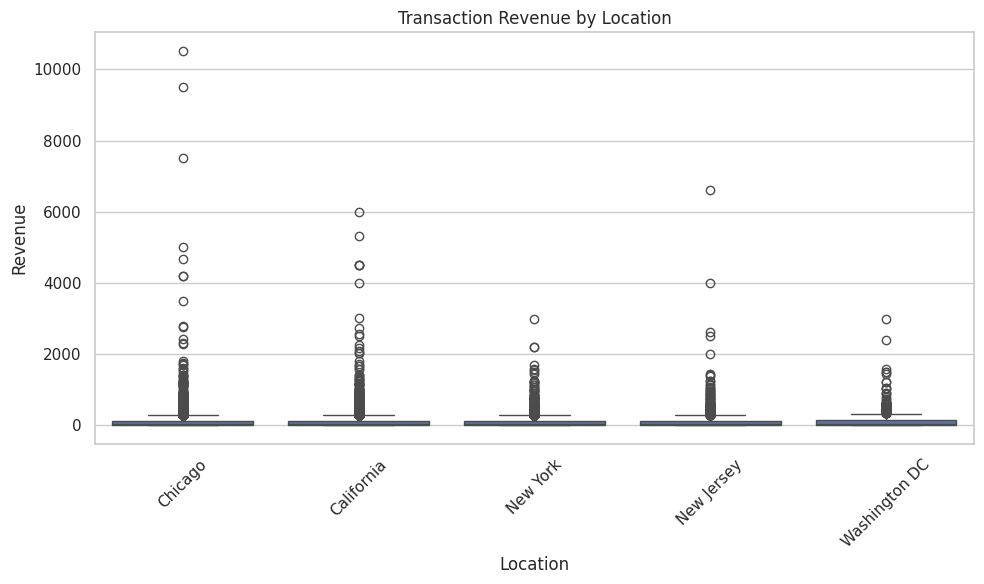

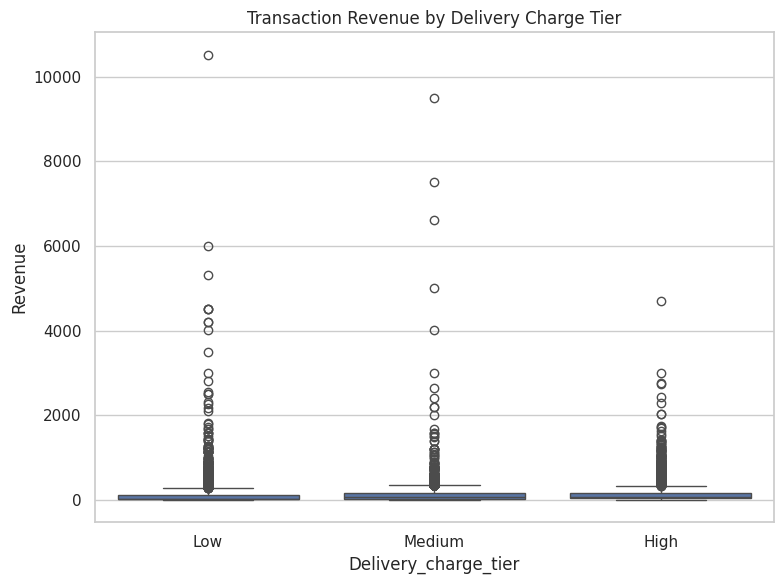

In [ ]:
# Boxplot: Revenue by location
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Revenue', data=df)
plt.title('Transaction Revenue by Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot: Revenue by Delivery Charge Tier
plt.figure(figsize=(8, 6))
sns.boxplot(x='Delivery_charge_tier', y='Revenue', data=df)
plt.title('Transaction Revenue by Delivery Charge Tier')
plt.tight_layout()
plt.show()


# 📊 Statistical Findings & Business Implications (ANOVA Analysis)

---

## 1. Revenue by Location (Demographic Group)

- **F-statistic**: 2.84  
- **P-value**: 0.023

✅ Since **p < 0.05**, we **reject the null hypothesis**.

### ➤ Conclusion:
There is a **statistically significant difference** in average transaction revenue across **locations**.

### ➤ Business Implication:
- Customer **spending behavior varies by region**.
- Indicates potential for **location-based personalization**:
  - Tailored promotions
  - Regional pricing strategies
  - Location-specific product recommendations

---

## 2. Revenue by Delivery Charge Tier (Pricing Factor)

- **F-statistic**: 256.08  
- **P-value**: 2.10 × 10⁻¹¹¹

✅ Since **p ≪ 0.05**, we **strongly reject the null hypothesis**.

### ➤ Conclusion:
There is a **highly significant difference** in revenue between **delivery charge tiers**.

### ➤ Business Implication:
- Delivery charge levels **strongly influence how much customers spend**.
- Possible interpretations:
  - Higher delivery fees may correlate with **larger or premium orders**.
  - Customers may **adjust order size** to offset delivery costs.

---

## 💡 Strategic Recommendations

### 📍 Location-Based Personalization
- Segment users by region to optimize marketing:
  - **High-spending regions** → premium products, exclusive bundles
  - **Low-spending regions** → discounts, price-sensitive campaigns

### 🚚 Delivery Pricing Strategy
- Leverage delivery tiers as a behavioral lever:
  - Offer **free/reduced shipping** for low-spending users to boost conversion
  - Use **tiered pricing** for faster delivery or premium segments
  - Personalize **promotions** based on customer delivery tier

---

## ✅ Summary:
ANOVA tests show significant impact of both **location** and **delivery pricing** on revenue. By integrating these findings into segmentation and pricing strategies, the company can drive more personalized, efficient, and high-converting campaigns across different customer groups.



✅ Question 16:

**16. Does customer tenure impact purchase frequency? Analyze the relationship between customer tenure and purchase frequency. How can this insight be used to improve customer engagement and retention strategies?**

In [ ]:
df.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  ...  \
0         1     153.71               6.5          Used  ...   
1         1     153.71               6.5          Used  ...   
2         1       2.05               6.5          Used  ...   
3         5      17.53               6.5      Not Used  ...   
4         1      16.50               6.5          Used  ...   

  First_Purchase_Month Customer_Type Revenue Month_name Cohort_Index  \
0              2019-01           New  160.21        Jan            0   
1              2019-01           New  160.21        Jan            0   
2              2019-01           New    8.55        Jan            0   
3              2019-01           New   94.15        Jan            0   
4              2019-01           New   23.00        Jan            0   

   Used_Coupon Gender  Location Tenure_Months Delivery_charge_tier  
0  Coupon Used      M   Chicago            12               Medium  
1  Coupon Used      M   Chicago            12               Medium  
2  Coupon Used      M   Chicago            12               Medium  
3    No Coupon      M   Chicago            12               Medium  
4  Coupon Used      M   Chicago            12               Medium  

[5 rows x 23 columns]

In [ ]:
customer_frequency=df.groupby('CustomerID').agg(
    Purchase_Frequency=('Transaction_ID','nunique')
).reset_index()
customer_frequency

CustomerID  Purchase_Frequency
0          12346                   1
1          12347                  31
2          12348                   8
3          12350                  11
4          12356                  13
...          ...                 ...
1463       18259                   3
1464       18260                  19
1465       18269                   2
1466       18277                   1
1467       18283                  53

[1468 rows x 2 columns]

In [ ]:
customer_data=pd.merge(customer_frequency,customers_data[['Tenure_Months','CustomerID']],on='CustomerID')
customer_data

CustomerID  Purchase_Frequency  Tenure_Months
0          12346                   1             31
1          12347                  31             20
2          12348                   8             39
3          12350                  11             25
4          12356                  13             31
...          ...                 ...            ...
1463       18259                   3              5
1464       18260                  19             43
1465       18269                   2             25
1466       18277                   1             47
1467       18283                  53             36

[1468 rows x 3 columns]

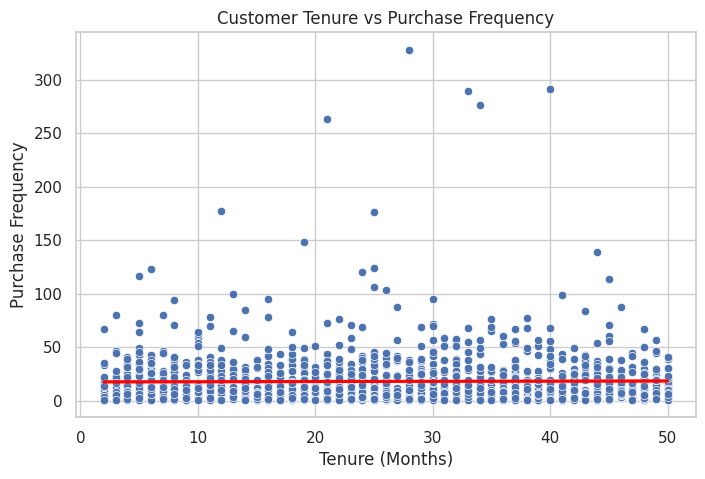

In [ ]:
# Step 4: Visualize the relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(data=customer_data, x='Tenure_Months', y='Purchase_Frequency')
sns.regplot(data=customer_data, x='Tenure_Months', y='Purchase_Frequency', scatter=False, color='red')
plt.title("Customer Tenure vs Purchase Frequency")
plt.xlabel("Tenure (Months)")
plt.ylabel("Purchase Frequency")
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import pearsonr,spearmanr

In [ ]:
pearson_corr,pearson_pval=pearsonr(customer_data['Tenure_Months'],customer_data['Purchase_Frequency'])
spearman_corr,spearman_pval=spearmanr(customer_data['Tenure_Months'],customer_data['Purchase_Frequency'])

In [ ]:
print(f"Pearson Correlation: {pearson_corr:.3f} (p={pearson_pval:.3g})")
print(f"Spearman Correlation: {spearman_corr:.3f} (p={spearman_pval:.3g})")

Pearson Correlation: 0.010 (p=0.707)
Spearman Correlation: 0.009 (p=0.736)


# 📊 Analysis: Does Customer Tenure Impact Purchase Frequency?

---

## 🔬 Statistical Results

| Metric               | Correlation | P-value |
|----------------------|-------------|---------|
| Pearson Correlation  | 0.010       | 0.707   |
| Spearman Correlation | 0.009       | 0.736   |

✅ **Interpretation:**
- Both correlation values are **very close to zero**, and p-values are **greater than 0.05**.
- ➤ There is **no statistically significant relationship** between customer **tenure** and **purchase frequency**.

---

## 🧠 Key Insights

- ❌ Having a customer for a longer period does **not** predict higher purchasing frequency.
- Tenure alone is **not a good predictor of engagement**.
- Other behavioral signals are likely more valuable for segmentation.

---

## 📈 Business Implications

### 1. Don’t Assume Tenure = Loyalty
- A long-tenured customer might be inactive or minimally engaged.
- 📌 Loyalty must be **earned through ongoing value** — not just time.

### 2. Focus on Behavioral Targeting
- Use **RFM Segmentation** (Recency, Frequency, Monetary value) rather than relying on tenure alone.
- Segment based on how recently and how often customers engage — these are stronger indicators of loyalty.

### 3. Tailor Retention Strategies
- Launch **reactivation campaigns** for long-tenured but inactive users.
- Offer **personalized rewards or incentives** based on recent engagement — not just how long they’ve been a customer.

---

## ✅ Conclusion

Customer tenure **does not influence** purchase frequency in a statistically meaningful way. Retention strategies should be built around **behavioral metrics and engagement signals**, not duration of association alone.


✅ Question 17:

**17. Analyze the relationship between delivery charges and order behavior. Are there opportunities to optimize delivery pricing to increase order quantities or revenue?**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            52924 non-null  int64         
 1   Transaction_ID        52924 non-null  int64         
 2   Transaction_Date      52924 non-null  datetime64[ns]
 3   Product_SKU           52924 non-null  object        
 4   Product_Description   52924 non-null  object        
 5   Product_Category      52924 non-null  object        
 6   Quantity              52924 non-null  int64         
 7   Avg_Price             52924 non-null  float64       
 8   Delivery_Charges      52924 non-null  float64       
 9   Coupon_Status         52924 non-null  object        
 10  First_Purchase_Date   52924 non-null  datetime64[ns]
 11  Aquisition_Month      52924 non-null  period[M]     
 12  Transaction_Month     52924 non-null  period[M]     
 13  First_Purchase_M

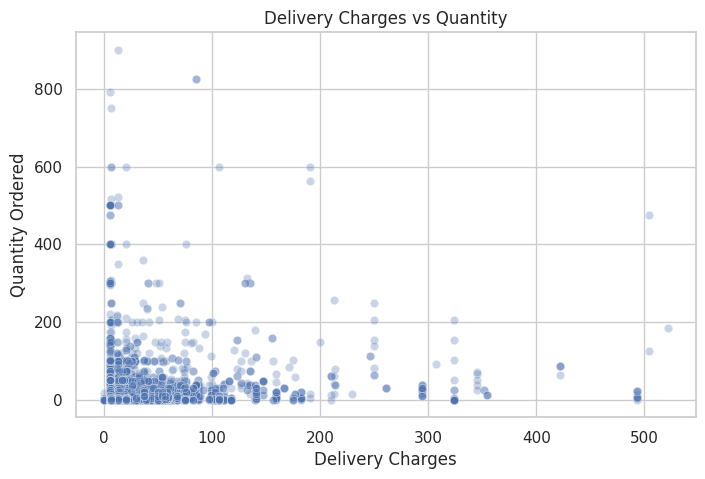

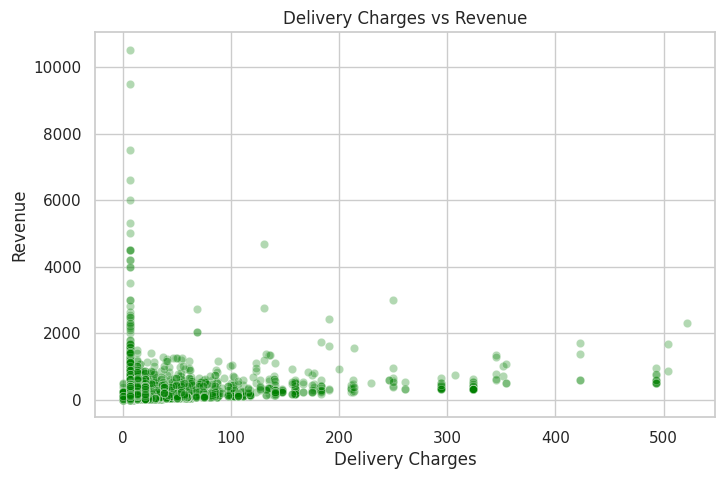

In [ ]:
# 1. Scatter Plot: Delivery Charges vs Quantity
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Delivery_Charges', y='Quantity', alpha=0.3)
plt.title('Delivery Charges vs Quantity')
plt.xlabel('Delivery Charges')
plt.ylabel('Quantity Ordered')
plt.show()

# 2. Scatter Plot: Delivery Charges vs Revenue
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Delivery_Charges', y='Revenue', alpha=0.3, color='green')
plt.title('Delivery Charges vs Revenue')
plt.xlabel('Delivery Charges')
plt.ylabel('Revenue')
plt.show()



In [ ]:
# 3. Correlation Analysis
pearson_quantity = pearsonr(df['Delivery_Charges'], df['Quantity'])
spearman_quantity = spearmanr(df['Delivery_Charges'], df['Quantity'])

pearson_revenue = pearsonr(df['Delivery_Charges'], df['Revenue'])
spearman_revenue = spearmanr(df['Delivery_Charges'], df['Revenue'])

print(f"Pearson Correlation (Delivery Charges vs Quantity): {pearson_quantity[0]:.3f}, p-value = {pearson_quantity[1]:.4f}")
print(f"Spearman Correlation (Delivery Charges vs Quantity): {spearman_quantity.correlation:.3f}, p-value = {spearman_quantity.pvalue:.4f}\n")

print(f"Pearson Correlation (Delivery Charges vs Revenue): {pearson_revenue[0]:.3f}, p-value = {pearson_revenue[1]:.4f}")
print(f"Spearman Correlation (Delivery Charges vs Revenue): {spearman_revenue.correlation:.3f}, p-value = {spearman_revenue.pvalue:.4f}")



Pearson Correlation (Delivery Charges vs Quantity): 0.191, p-value = 0.0000
Spearman Correlation (Delivery Charges vs Quantity): 0.244, p-value = 0.0000

Pearson Correlation (Delivery Charges vs Revenue): 0.183, p-value = 0.0000
Spearman Correlation (Delivery Charges vs Revenue): 0.252, p-value = 0.0000


In [ ]:
# 4. Grouping by Delivery Charge Tier
# (Assumes 'Delivery_charge_tier' column already exists in your DataFrame)
delivery_charge_tier_quantity = [group['Quantity'].values for name, group in df.groupby('Delivery_charge_tier')]
delivery_charge_tier_revenue = [group['Revenue'].values for name, group in df.groupby('Delivery_charge_tier')]

# ANOVA: Delivery Charges vs Quantity
f_stat_q, p_val_q = f_oneway(*delivery_charge_tier_quantity)
print(f"\nANOVA - Quantity across Delivery Tiers: F = {f_stat_q:.2f}, p = {p_val_q:.4e}")

# ANOVA: Delivery Charges vs Revenue
f_stat_r, p_val_r = f_oneway(*delivery_charge_tier_revenue)
print(f"ANOVA - Revenue across Delivery Tiers: F = {f_stat_r:.2f}, p = {p_val_r:.4e}")




ANOVA - Quantity across Delivery Tiers: F = 524.27, p = 3.4550e-226
ANOVA - Revenue across Delivery Tiers: F = 256.08, p = 2.0960e-111


<ipython-input-369-1054112571>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delivery_charge_tier_quantity = [group['Quantity'].values for name, group in df.groupby('Delivery_charge_tier')]
<ipython-input-369-1054112571>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delivery_charge_tier_revenue = [group['Revenue'].values for name, group in df.groupby('Delivery_charge_tier')]


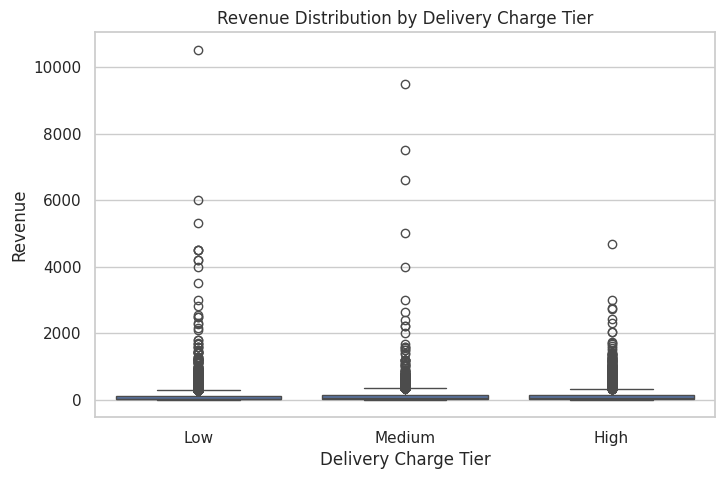

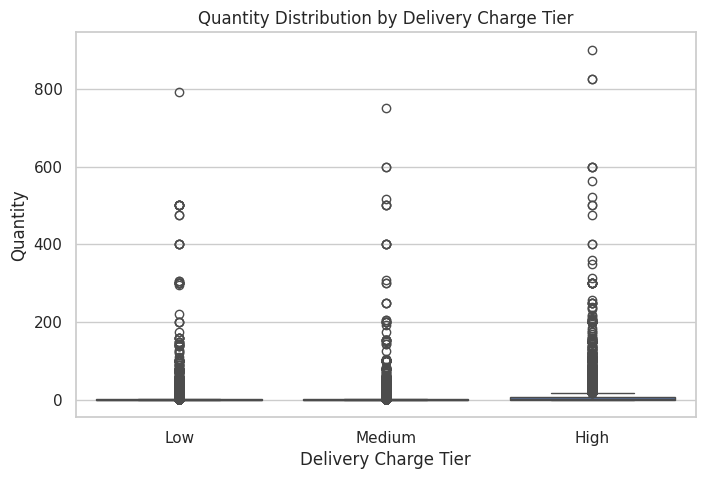

In [ ]:
# 5. Boxplots for Distribution Comparison
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Delivery_charge_tier', y='Revenue')
plt.title('Revenue Distribution by Delivery Charge Tier')
plt.xlabel('Delivery Charge Tier')
plt.ylabel('Revenue')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Delivery_charge_tier', y='Quantity')
plt.title('Quantity Distribution by Delivery Charge Tier')
plt.xlabel('Delivery Charge Tier')
plt.ylabel('Quantity')
plt.show()


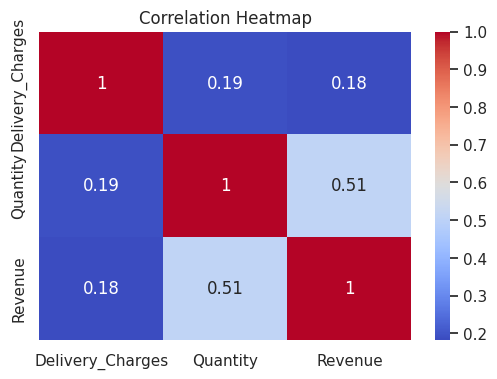

In [ ]:

plt.figure(figsize=(6, 4))
sns.heatmap(df[['Delivery_Charges', 'Quantity', 'Revenue']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# 📊 Delivery Charges – Impact on Customer Behavior

---

## 🔍 1. Correlation Results

| Variable Pair                | Pearson Correlation | Spearman Correlation | Significance (p-value) |
|-----------------------------|---------------------|----------------------|-------------------------|
| Delivery Charges vs Quantity| 0.191               | 0.244                | < 0.0001 ✅             |
| Delivery Charges vs Revenue | 0.183               | 0.252                | < 0.0001 ✅             |

✅ **Interpretation:**
- All relationships are **positive** and **statistically significant**.
- Strength is **weak to moderate**, suggesting delivery charges have *some* influence but aren't the only factor.
- Slight increase in quantity and revenue as delivery charges increase.

---

## 🔬 2. ANOVA Results (Across Delivery Charge Tiers)

| Metric          | F-statistic | p-value             |
|-----------------|-------------|---------------------|
| Order Quantity  | 524.27      | 3.46e-226 ✅         |
| Revenue         | 256.08      | 2.10e-111 ✅         |

✅ **Interpretation:**
- Strong evidence that **delivery charge tiers significantly affect both order quantity and revenue**.

---

## 💡 Business Implications

### 1. Delivery pricing **does** impact purchase behavior
- But correlations are **not strong** — strategy should be **nuanced**, not drastic.

### 2. Tiered Delivery Pricing Strategy:
- 🟢 **Free shipping** for high spenders.
- 🟠 Slightly higher charges for **premium/express** delivery.
- 🟣 Use **₹X+ free shipping thresholds** to boost cart size.

### 3. Use in Promotions:
- Try “**Free delivery on orders above ₹500**” type nudges to improve AOV (Average Order Value).

---

## 📈 Optimization Opportunities

- ✅ A/B test delivery incentives (flat ₹30 vs. free over ₹500).
- ✅ Personalize shipping charges by:
  - Customer lifetime value
  - Product category
  - Location
- ✅ Offer **free/priority shipping** as a loyalty perk.

---

## 🔢 Correlation Summary

| Variable Pair                | Correlation Value | Strength             | Interpretation                                  |
|-----------------------------|-------------------|----------------------|--------------------------------------------------|
| Delivery_Charges & Quantity | 0.19              | Weak Positive        | Higher charges = Slightly more quantity          |
| Delivery_Charges & Revenue  | 0.18              | Weak Positive        | Higher charges = Slightly higher revenue         |
| Quantity & Revenue          | 0.51              | Moderate Positive    | Strongest link — More items → more revenue       |

---

## 🔍 Key Insights

### 📌 Delivery Charges & Quantity (0.19)
- Weak link — higher delivery fees **don’t scare off** larger orders.
- Suggests **larger quantity orders are fine with modest delivery fees**.

### 📌 Delivery Charges & Revenue (0.18)
- Revenue slightly increases with delivery charge — perhaps **high-ticket items incur more fees**.

### 📌 Quantity & Revenue (0.51)
- Most meaningful relationship.
- ❗ **More quantity → higher revenue**.
- Strategy: promote **value packs**, **bulk discounts**, or **buy-more-save-more**.

---

## 📌 Final Takeaway

Delivery charges **modestly influence** revenue and quantity — not enough to drastically reduce fees across the board. Use a **tiered pricing approach** and encourage **larger carts** through clever bundling and shipping promotions. Focus more on boosting **quantity** to directly increase revenue.



✅ Question 18:

**18. Evaluate how taxes and delivery charges influence customer spending behavior. Are there opportunities to adjust pricing strategies to improve customer satisfaction and revenue?**

In [ ]:
tax_amount=pd.read_csv('/content/Tax_amount.csv')

In [ ]:
tax_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_Category  20 non-null     object
 1   GST               20 non-null     object
dtypes: object(2)
memory usage: 452.0+ bytes


In [ ]:
tax_amount.head()

Product_Category  GST
0         Nest-USA  10%
1           Office  10%
2          Apparel  18%
3             Bags  18%
4        Drinkware  18%

In [ ]:
online_sales.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status First_Purchase_Date  \
0         1     153.71               6.5          Used          2019-01-01   
1         1     153.71               6.5          Used          2019-01-01   
2         1       2.05               6.5          Used          2019-01-01   
3         5      17.53               6.5      Not Used          2019-01-01   
4         1      16.50               6.5          Used          2019-01-01   

  Aquisition_Month Transaction_Month First_Purchase_Month Customer_Type  \
0          2019-01           2019-01              2019-01           New   
1          2019-01           2019-01              2019-01           New   
2          2019-01           2019-01              2019-01           New   
3          2019-01           2019-01              2019-01           New   
4          2019-01           2019-01              2019-01           New   

   Revenue Month_name  
0   160.21        Jan  
1   160.21        Jan  
2     8.55        Jan  
3    94.15        Jan  
4    23.00        Jan

In [ ]:
tax_amount['GST']=tax_amount['GST'].str.replace('%','').astype(float)

In [ ]:
tax_amount.head()

Product_Category   GST
0         Nest-USA  10.0
1           Office  10.0
2          Apparel  18.0
3             Bags  18.0
4        Drinkware  18.0

In [ ]:
df=df.merge(tax_amount,on='Product_Category',how='left')

In [ ]:
df.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  ... Customer_Type  \
0         1     153.71               6.5          Used  ...           New   
1         1     153.71               6.5          Used  ...           New   
2         1       2.05               6.5          Used  ...           New   
3         5      17.53               6.5      Not Used  ...           New   
4         1      16.50               6.5          Used  ...           New   

  Revenue Month_name Cohort_Index  Used_Coupon  Gender Location  \
0  160.21        Jan            0  Coupon Used       M  Chicago   
1  160.21        Jan            0  Coupon Used       M  Chicago   
2    8.55        Jan            0  Coupon Used       M  Chicago   
3   94.15        Jan            0    No Coupon       M  Chicago   
4   23.00        Jan            0  Coupon Used       M  Chicago   

   Tenure_Months Delivery_charge_tier   GST  
0             12               Medium  10.0  
1             12               Medium  10.0  
2             12               Medium  10.0  
3             12               Medium  18.0  
4             12               Medium  18.0  

[5 rows x 24 columns]

In [ ]:
# Correlation: Delivery Charges vs Revenue
pearson_del, p_del = pearsonr(df['Delivery_Charges'], df['Revenue'])
spearman_del, sp_del = spearmanr(df['Delivery_Charges'], df['Revenue'])

# Correlation: GST vs Revenue
pearson_tax, p_tax = pearsonr(df['GST'], df['Revenue'])
spearman_tax, sp_tax = spearmanr(df['GST'], df['Revenue'])

print(f"Pearson (Delivery Charges vs Revenue): {pearson_del:.3f}, p = {p_del:.4f}")
print(f"Spearman (Delivery Charges vs Revenue): {spearman_del:.3f}, p = {sp_del:.4f}")

print(f"Pearson (GST vs Revenue): {pearson_tax:.3f}, p = {p_tax:.4f}")
print(f"Spearman (GST vs Revenue): {spearman_tax:.3f}, p = {sp_tax:.4f}")


Pearson (Delivery Charges vs Revenue): 0.183, p = 0.0000
Spearman (Delivery Charges vs Revenue): 0.252, p = 0.0000
Pearson (GST vs Revenue): -0.313, p = 0.0000
Spearman (GST vs Revenue): -0.461, p = 0.0000


In [ ]:
# Group revenue by tiers
tiered_revenue = [group['Revenue'].values for _, group in df.groupby('Delivery_charge_tier')]

# ANOVA Test
f_stat, p_val = f_oneway(*tiered_revenue)
print(f"ANOVA - Revenue across Delivery Charge Tiers: F = {f_stat:.2f}, p = {p_val:.4e}")


ANOVA - Revenue across Delivery Charge Tiers: F = 256.08, p = 2.0960e-111


<ipython-input-383-2729258520>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tiered_revenue = [group['Revenue'].values for _, group in df.groupby('Delivery_charge_tier')]


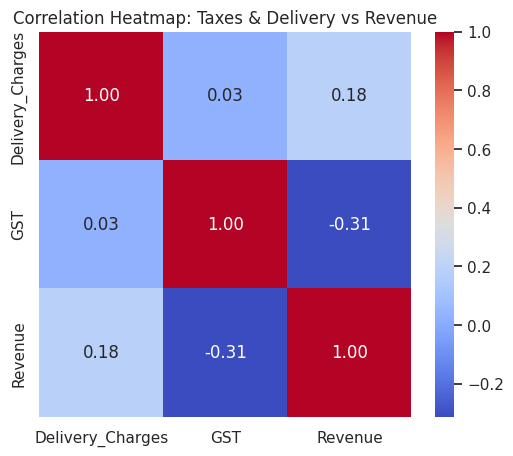

In [ ]:
# Correlation heatmap among Delivery_Charges, GST, Revenue
corr_df = df[['Delivery_Charges', 'GST', 'Revenue']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Taxes & Delivery vs Revenue")
plt.show()


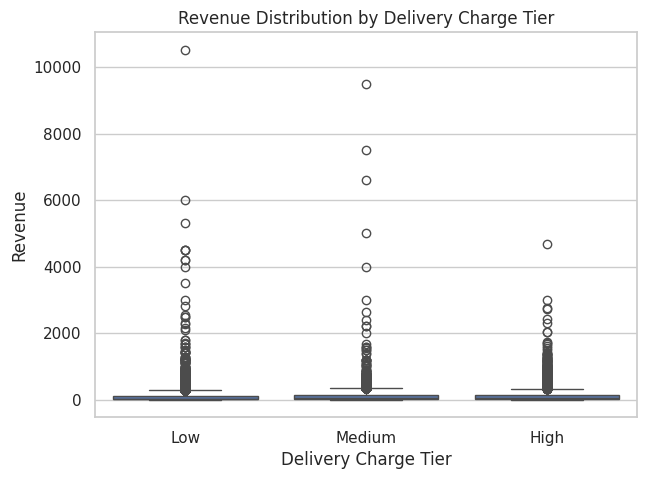

In [ ]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='Delivery_charge_tier', y='Revenue')
plt.title("Revenue Distribution by Delivery Charge Tier")
plt.xlabel("Delivery Charge Tier")
plt.ylabel("Revenue")
plt.show()


# 🔍 Correlation & ANOVA Insights on Revenue Drivers

---

## 📌 1. Delivery Charges vs Revenue

- **Pearson Correlation**: 0.183 ✅  
- **Spearman Correlation**: 0.252 ✅  
- **p-value**: 0.0000 (Highly Significant)

**✅ Interpretation:**
- There is a **positive**, statistically significant relationship between **delivery charges** and **revenue**.
- Strength is **weak to moderate**, meaning other factors are also influencing revenue.
- Suggests **higher delivery charges are associated with higher transaction values** — possibly due to bulk/premium orders.

---

## 📌 2. GST (Tax %) vs Revenue

- **Pearson Correlation**: -0.313 ❌  
- **Spearman Correlation**: -0.461 ❌  
- **p-value**: 0.0000 (Highly Significant)

**❌ Interpretation:**
- There is a **moderate negative correlation** between **GST percentage** and **revenue**.
- Indicates that **higher tax rates discourage customer spending**, likely due to higher total price perception.

---

## 📌 3. ANOVA Test – Revenue Across Delivery Charge Tiers

- **F-statistic**: 256.08  
- **p-value**: 2.096 × 10⁻¹¹¹ ✅

**✅ Interpretation:**
- Strong evidence of **significant differences in revenue** based on delivery charge tiers.
- Confirms that **delivery pricing strategy affects how much customers spend**.

---

# 📈 Business Implications & Strategic Recommendations

### 1. 📦 Optimize Delivery Pricing:
- Implement **tiered delivery fees** that encourage **higher order values** (e.g., free shipping above ₹500).
- Carefully **balance pricing** to avoid deterring low-spend customers.

### 2. 💸 Rethink High-GST Product Strategy:
- **High-GST items reduce purchase incentive** — especially in price-sensitive segments.
- Mitigation strategies:
  - Offer **discounts** or **absorbed tax offers** on high-GST items.
  - Promote **low-GST products** more heavily.

### 3. 🧠 Manage Price Perception:
- Combine transparent **tax/delivery messaging** with:
  - **Bundled offers**
  - **Loyalty point incentives**
  - **Time-limited discounts**

### 4. 🎯 Segmented Pricing Models:
- Use insights to tailor delivery/tax strategies by:
  - **Customer segment** (Premium vs Standard)
  - **Location**
  - **Product category**
  - **Purchase frequency or LTV**

---

## 📌 Final Summary:

- **Delivery charges** have a **mild positive effect** on revenue — suggesting scope for upselling via smart delivery incentives.
- **High GST rates negatively impact spend**, making pricing strategy and product promotion crucial in affected categories.
- Segment-based strategies and A/B testing can help balance **revenue maximization with customer satisfaction**.



✅ Question 19:

**19. Identify seasonal trends in sales by category and location. How can the company prepare for peak and off-peak seasons to maximize revenue?**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            52924 non-null  int64         
 1   Transaction_ID        52924 non-null  int64         
 2   Transaction_Date      52924 non-null  datetime64[ns]
 3   Product_SKU           52924 non-null  object        
 4   Product_Description   52924 non-null  object        
 5   Product_Category      52924 non-null  object        
 6   Quantity              52924 non-null  int64         
 7   Avg_Price             52924 non-null  float64       
 8   Delivery_Charges      52924 non-null  float64       
 9   Coupon_Status         52924 non-null  object        
 10  First_Purchase_Date   52924 non-null  datetime64[ns]
 11  Aquisition_Month      52924 non-null  period[M]     
 12  Transaction_Month     52924 non-null  period[M]     
 13  First_Purchase_M

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status First_Purchase_Date  \
0         1     153.71               6.5          Used          2019-01-01   
1         1     153.71               6.5          Used          2019-01-01   
2         1       2.05               6.5          Used          2019-01-01   
3         5      17.53               6.5      Not Used          2019-01-01   
4         1      16.50               6.5          Used          2019-01-01   

  Aquisition_Month Transaction_Month First_Purchase_Month Customer_Type  \
0          2019-01           2019-01              2019-01           New   
1          2019-01           2019-01              2019-01           New   
2          2019-01           2019-01              2019-01           New   
3          2019-01           2019-01              2019-01           New   
4          2019-01           2019-01              2019-01           New   

   Revenue Month_name  Cohort_Index  Used_Coupon Gender Location  \
0   160.21        Jan             0  Coupon Used      M  Chicago   
1   160.21        Jan             0  Coupon Used      M  Chicago   
2     8.55        Jan             0  Coupon Used      M  Chicago   
3    94.15        Jan             0    No Coupon      M  Chicago   
4    23.00        Jan             0  Coupon Used      M  Chicago   

   Tenure_Months Delivery_charge_tier   GST  
0             12               Medium  10.0  
1             12               Medium  10.0  
2             12               Medium  10.0  
3             12               Medium  18.0  
4             12               Medium  18.0

In [ ]:
monthly_category_sales=df.groupby(['Product_Category','Transaction_Month'])['Revenue'].sum().reset_index()
monthly_category_sales

Product_Category Transaction_Month  Revenue
0        Accessories           2019-01    58.07
1        Accessories           2019-03    66.49
2        Accessories           2019-04   191.96
3        Accessories           2019-05   190.97
4        Accessories           2019-06   263.72
..               ...               ...      ...
202             Waze           2019-08  1018.72
203             Waze           2019-09   765.08
204             Waze           2019-10  1229.73
205             Waze           2019-11  1502.08
206             Waze           2019-12  1078.10

[207 rows x 3 columns]

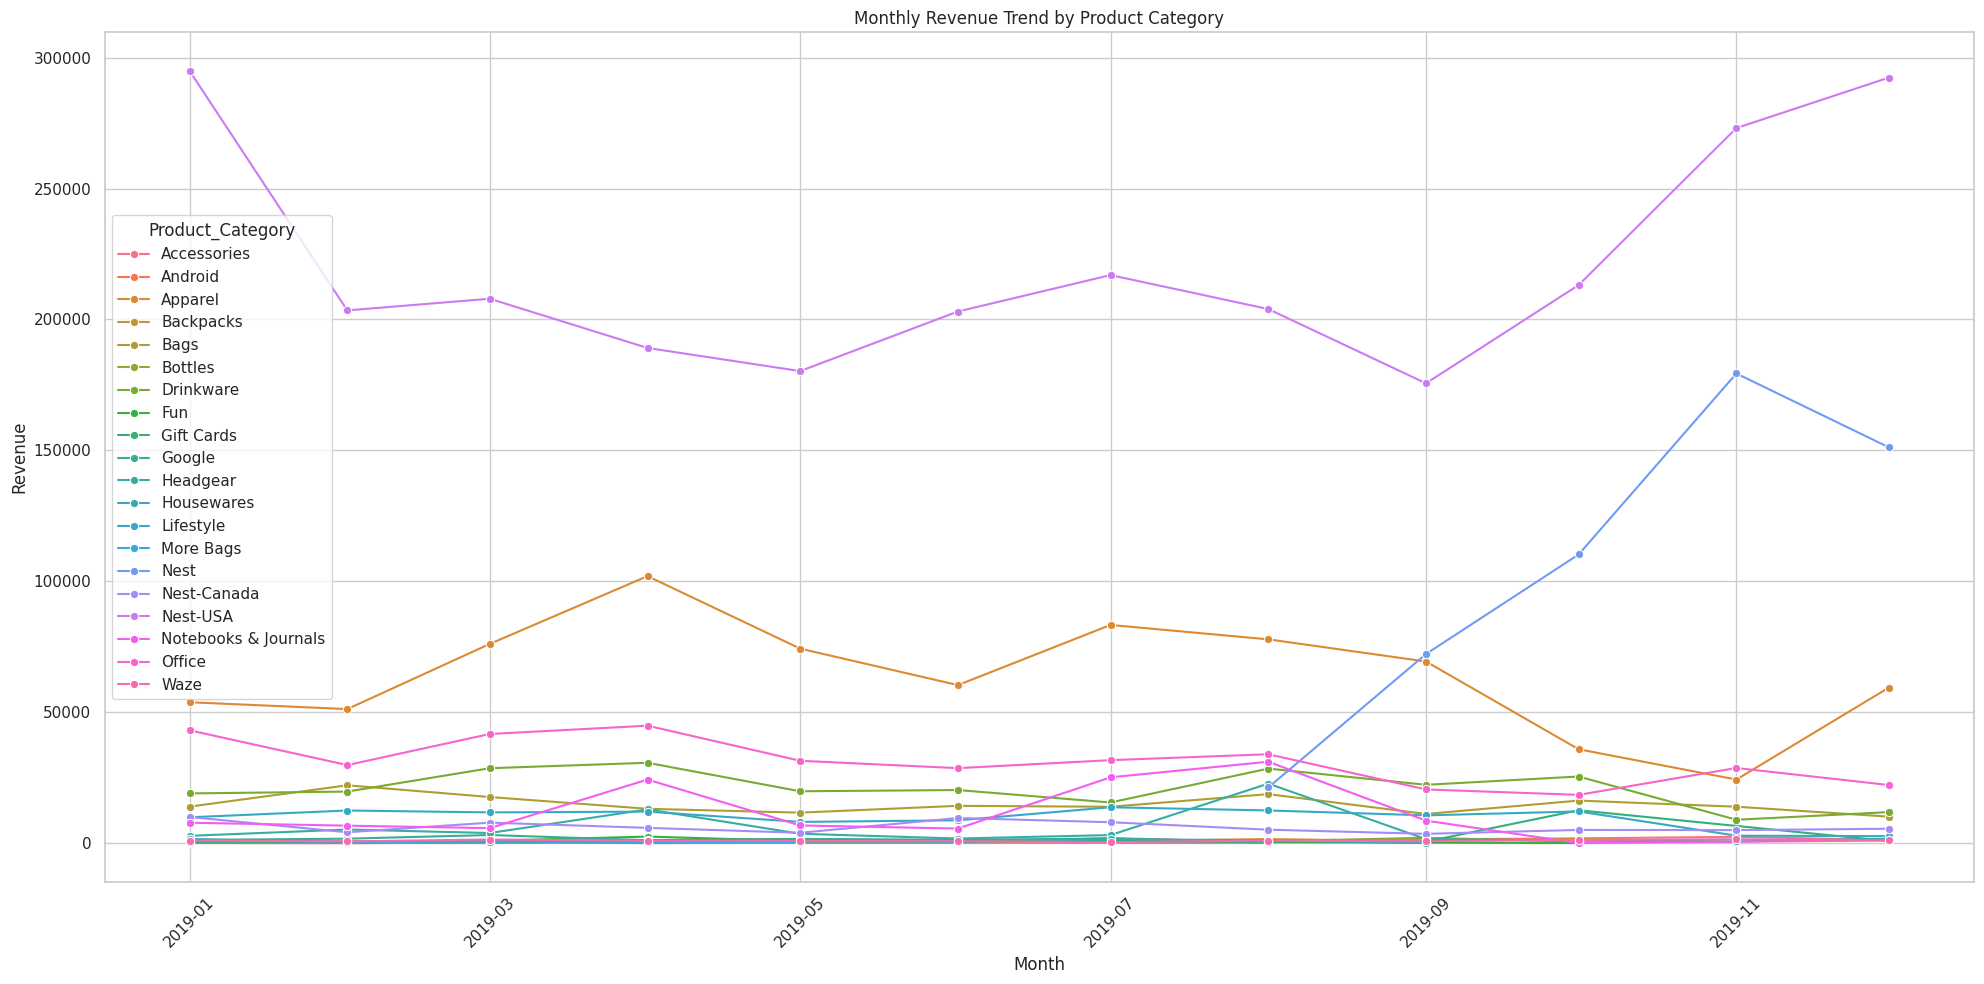

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=monthly_category_sales, x=monthly_category_sales['Transaction_Month'].dt.to_timestamp(), y='Revenue', hue='Product_Category', marker='o')
plt.title('Monthly Revenue Trend by Product Category')
plt.xticks(rotation=45)
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

In [ ]:
monthly_location_sales=df.groupby(['Transaction_Month','Location'])['Revenue'].sum().reset_index()
monthly_location_sales

Transaction_Month       Location    Revenue
0            2019-01     California  175911.64
1            2019-01        Chicago  122637.38
2            2019-01     New Jersey   35349.14
3            2019-01       New York   90259.52
4            2019-01  Washington DC   38709.22
5            2019-02     California  104417.59
6            2019-02        Chicago  131023.69
7            2019-02     New Jersey   33609.39
8            2019-02       New York   50924.19
9            2019-02  Washington DC   40061.54
10           2019-03     California  115733.36
11           2019-03        Chicago  140957.44
12           2019-03     New Jersey   22883.09
13           2019-03       New York  111553.35
14           2019-03  Washington DC   19280.79
15           2019-04     California  135679.74
16           2019-04        Chicago  165368.07
17           2019-04     New Jersey   48811.12
18           2019-04       New York   71926.34
19           2019-04  Washington DC   21314.89
20           2019-05     California   99012.62
21           2019-05        Chicago  124885.87
22           2019-05     New Jersey   31362.52
23           2019-05       New York   87077.26
24           2019-05  Washington DC    6821.32
25           2019-06     California  111734.03
26           2019-06        Chicago  112694.00
27           2019-06     New Jersey   43970.20
28           2019-06       New York   76510.78
29           2019-06  Washington DC   13685.95
30           2019-07     California  134588.74
31           2019-07        Chicago  147473.69
32           2019-07     New Jersey   25591.14
33           2019-07       New York   92327.53
34           2019-07  Washington DC   21380.90
35           2019-08     California  136818.14
36           2019-08        Chicago  182965.14
37           2019-08     New Jersey   26097.20
38           2019-08       New York   94137.13
39           2019-08  Washington DC   22292.33
40           2019-09     California  129253.28
41           2019-09        Chicago  151863.48
42           2019-09     New Jersey   29399.26
43           2019-09       New York   66068.23
44           2019-09  Washington DC   24969.57
45           2019-10     California  125139.79
46           2019-10        Chicago  148409.50
47           2019-10     New Jersey   44261.37
48           2019-10       New York  114412.82
49           2019-10  Washington DC   23419.68
50           2019-11     California  149930.34
51           2019-11        Chicago  185689.67
52           2019-11     New Jersey   54668.45
53           2019-11       New York  120591.91
54           2019-11  Washington DC   30374.18
55           2019-12     California  197178.12
56           2019-12        Chicago  205043.88
57           2019-12     New Jersey   56425.21
58           2019-12       New York   80770.27
59           2019-12  Washington DC   21722.70

In [ ]:
monthly_location_sales['Location'].value_counts()

Location
California       12
Chicago          12
New Jersey       12
New York         12
Washington DC    12
Name: count, dtype: int64

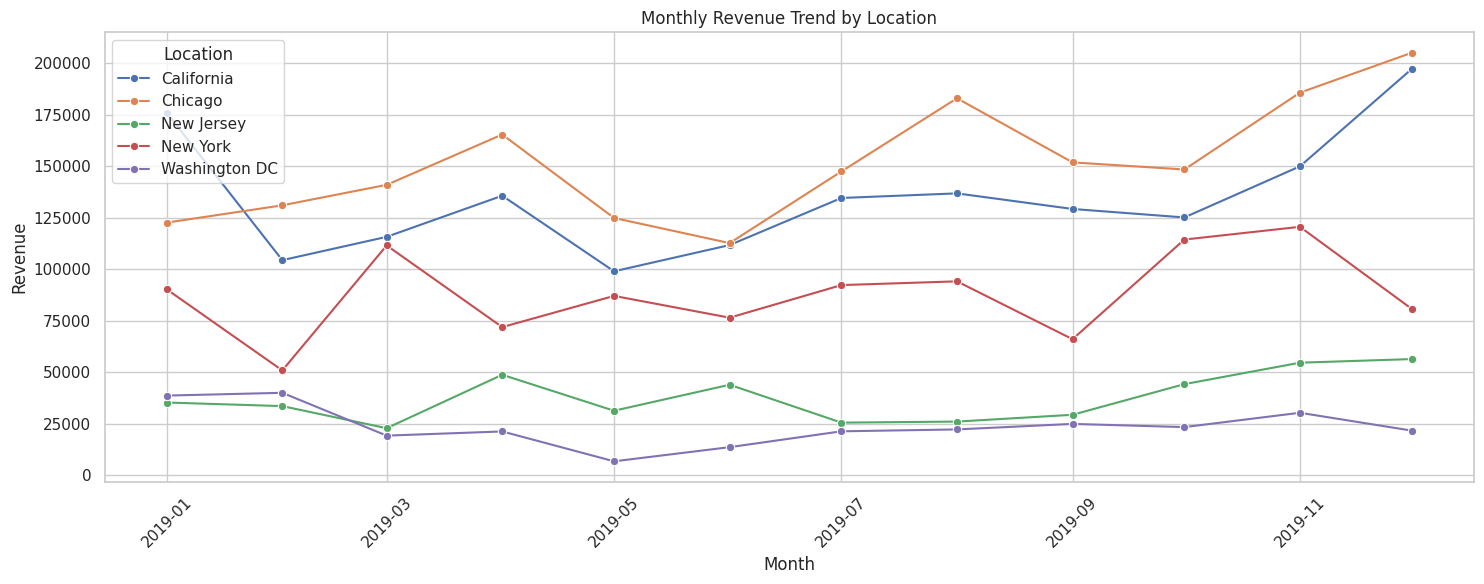

In [ ]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_location_sales, x=monthly_location_sales['Transaction_Month'].dt.to_timestamp(), y='Revenue', hue='Location', marker='o')
plt.title('Monthly Revenue Trend by Location')
plt.xticks(rotation=45)
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

# 🔍 Seasonal Sales Analysis – Key Observations & Strategic Recommendations

---

## 📊 1. Seasonal Trends by Product Category

- **📔 Notebooks & Journals**
  - Strong year-round performance with **peaks in January and December**.
  - Popular during **New Year planning** and **holiday gifting** seasons.

- **👕 Apparel**
  - Peaks observed during **March–April** and again in **July–August**.
  - Dips in the last quarter; may relate to end-of-season stock or weather trends.

- **🏠 Nest-USA (Smart Home Products)**
  - Steady increase toward **year-end**, peaking in **November–December** — strong holiday demand.

- **☕ Drinkware, 🎉 Fun, Lifestyle**
  - Relatively flat sales overall.
  - Slight upticks around **mid-year**, possibly due to promotions or seasonal campaigns.

---

## 📍 2. Seasonal Trends by Location

- **📦 Chicago**
  - Consistent high revenue; **significant peaks in Nov–Dec** → strong alignment with holiday shopping.

- **🌴 California**
  - Stable high-performing region across months.
  - Good candidate for year-round campaigns.

- **🗽 New York**
  - Volatile performance: spikes in **March** and **November**.
  - Requires flexible campaign planning.

- **🇺🇸 Washington DC & New Jersey**
  - Lower overall sales.
  - **New Jersey shows growth** in the second half → potential for future scaling.

---

## 💡 Strategic Recommendations

### ✅ A. Peak Season Preparation (Oct–Dec)

- **Boost inventory** for top-selling items:
  - Notebooks & Journals
  - Apparel
  - Nest-USA smart devices

- **Launch seasonal campaigns**:
  - Gift guides, bundle offers, and time-sensitive discounts.
  - Target high-spending locations like **Chicago** and **California**.

- **Optimize logistics**:
  - Ensure stock availability in warehouses near key regions.
  - Speed up fulfillment for holiday orders.

---

### ⚠️ B. Off-Peak Strategy (May–August)

- **Run flash sales** or clearance for low-turnover categories.
- Target **Washington DC and New Jersey** with:
  - Experimental product offers.
  - Localized promotions or email/SMS nudges.

- **Back-to-School Campaigns** (July–August):
  - Push **Journals, Apparel**, and **stationery kits**.
  - Leverage academic calendar cycles.

---

## 📦 Inventory & Supply Chain

- **Align stock planning** with demand peaks — reduce overstock of flat-performing categories in off months.
- Prioritize warehouse space and logistics for:
  - Q4 seasonal spikes
  - Mid-year academic campaigns
- **Use dynamic forecasting** based on historical demand patterns by category and region.

---

## 📈 Summary

- **November–December** is the most critical revenue period across multiple categories and locations.
- Strategic alignment of **inventory, marketing, and promotions** can maximize returns.
- **Localized tactics + seasonal campaigns** = best approach for sustainable growth and engagement.



✅ Question 20:

**20. Analyze daily sales trends to identify high-performing and low-performing days. What strategies can be implemented to boost sales on slower days?**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            52924 non-null  int64         
 1   Transaction_ID        52924 non-null  int64         
 2   Transaction_Date      52924 non-null  datetime64[ns]
 3   Product_SKU           52924 non-null  object        
 4   Product_Description   52924 non-null  object        
 5   Product_Category      52924 non-null  object        
 6   Quantity              52924 non-null  int64         
 7   Avg_Price             52924 non-null  float64       
 8   Delivery_Charges      52924 non-null  float64       
 9   Coupon_Status         52924 non-null  object        
 10  First_Purchase_Date   52924 non-null  datetime64[ns]
 11  Aquisition_Month      52924 non-null  period[M]     
 12  Transaction_Month     52924 non-null  period[M]     
 13  First_Purchase_M

In [ ]:
df.head()

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status First_Purchase_Date  \
0         1     153.71               6.5          Used          2019-01-01   
1         1     153.71               6.5          Used          2019-01-01   
2         1       2.05               6.5          Used          2019-01-01   
3         5      17.53               6.5      Not Used          2019-01-01   
4         1      16.50               6.5          Used          2019-01-01   

  Aquisition_Month Transaction_Month First_Purchase_Month Customer_Type  \
0          2019-01           2019-01              2019-01           New   
1          2019-01           2019-01              2019-01           New   
2          2019-01           2019-01              2019-01           New   
3          2019-01           2019-01              2019-01           New   
4          2019-01           2019-01              2019-01           New   

   Revenue Month_name  Cohort_Index  Used_Coupon Gender Location  \
0   160.21        Jan             0  Coupon Used      M  Chicago   
1   160.21        Jan             0  Coupon Used      M  Chicago   
2     8.55        Jan             0  Coupon Used      M  Chicago   
3    94.15        Jan             0    No Coupon      M  Chicago   
4    23.00        Jan             0  Coupon Used      M  Chicago   

   Tenure_Months Delivery_charge_tier   GST  
0             12               Medium  10.0  
1             12               Medium  10.0  
2             12               Medium  10.0  
3             12               Medium  18.0  
4             12               Medium  18.0

In [ ]:
daily_sales=df.groupby('Transaction_Date')['Revenue'].sum().reset_index()
daily_sales

Transaction_Date   Revenue
0         2019-01-01   8462.72
1         2019-01-02  14310.47
2         2019-01-03  27484.45
3         2019-01-04  18105.35
4         2019-01-05  19784.48
..               ...       ...
360       2019-12-27  14432.99
361       2019-12-28  11675.00
362       2019-12-29  12614.14
363       2019-12-30   8479.65
364       2019-12-31  10631.76

[365 rows x 2 columns]

In [ ]:
daily_sales['Day_of_Week']=daily_sales['Transaction_Date'].dt.day_name()

In [ ]:
daily_sales

Transaction_Date   Revenue Day_of_Week
0         2019-01-01   8462.72     Tuesday
1         2019-01-02  14310.47   Wednesday
2         2019-01-03  27484.45    Thursday
3         2019-01-04  18105.35      Friday
4         2019-01-05  19784.48    Saturday
..               ...       ...         ...
360       2019-12-27  14432.99      Friday
361       2019-12-28  11675.00    Saturday
362       2019-12-29  12614.14      Sunday
363       2019-12-30   8479.65      Monday
364       2019-12-31  10631.76     Tuesday

[365 rows x 3 columns]

In [ ]:
avg_sales_by_day=daily_sales.groupby('Day_of_Week')['Revenue'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
avg_sales_by_day

Day_of_Week       Revenue
0      Monday   7719.400000
1     Tuesday   8258.994717
2   Wednesday  17866.919231
3    Thursday  18027.278654
4      Friday  18635.989808
5    Saturday  14697.777115
6      Sunday  15162.307692

<ipython-input-418-2710725403>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_sales_by_day, x='Day_of_Week', y='Revenue', palette='crest')


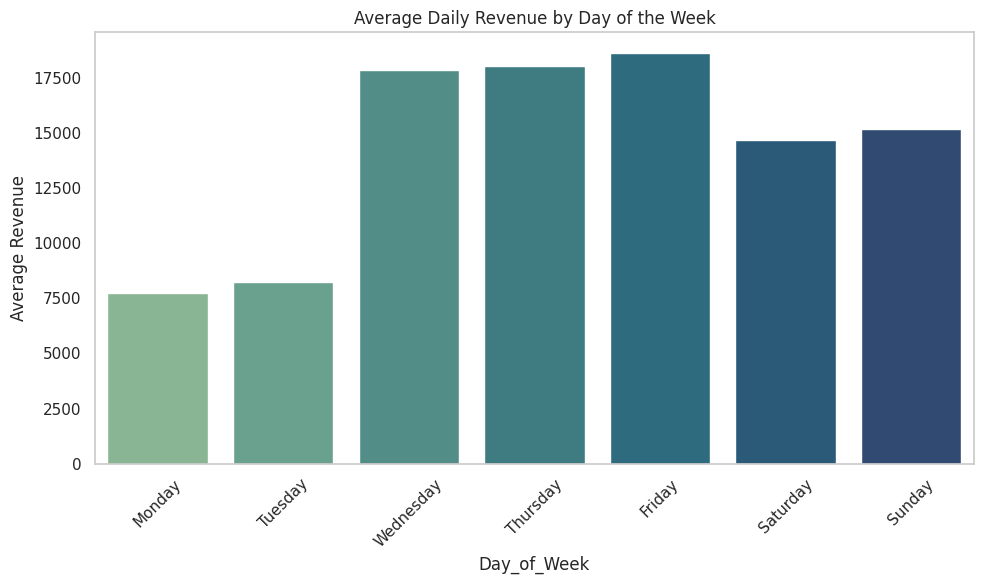

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_sales_by_day, x='Day_of_Week', y='Revenue', palette='crest')
plt.title("Average Daily Revenue by Day of the Week")
plt.ylabel("Average Revenue")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 📊 Daily Sales Trend Analysis – Average Revenue by Day of Week

---

## ✅ Overview: Average Daily Revenue Performance

| Day       | Avg Revenue | Performance Level     |
|-----------|-------------|------------------------|
| Monday    | ₹7,700      | ❌ Low-performing      |
| Tuesday   | ₹8,200      | ❌ Low-performing      |
| Wednesday | ₹17,800     | ✅ High-performing     |
| Thursday  | ₹18,000     | ✅ High-performing     |
| Friday    | ₹18,600     | ✅ Peak-performing     |
| Saturday  | ₹14,600     | ⚠️ Mid-performing      |
| Sunday    | ₹15,200     | ⚠️ Mid-performing      |

---

## 🔍 Key Insights

- **📉 Monday & Tuesday** are the slowest sales days — nearly **50% lower** revenue than Friday.
- **📈 Wednesday–Friday** are the strongest revenue days, with **Friday** peaking.
- **🛍️ Weekends** (Saturday & Sunday) show moderate activity — possibly due to different shopping patterns or less promotional focus.

---

## 💡 Strategies to Boost Monday–Tuesday Sales

### 🎯 1. “Monday Motivation” Offers
- Launch **time-limited deals exclusive to Monday**.
- _Example_: “10% off all orders placed before 12 PM every Monday.”

### 🔁 2. Cart Abandonment Follow-up
- Send emails/push notifications to **weekend cart abandoners** nudging them to purchase on Monday or Tuesday.

### 🎁 3. Weekday Loyalty Rewards
- Offer **double loyalty points or cashback** for purchases made on early weekdays.

### 🎮 4. Gamification & Micro-Incentives
- Introduce **weekday-only gamified offers** like “Spin to Win,” scratch cards, or small surprise coupons.

### 📦 5. Bundle Discounts
- Promote **weekday-use bundles** (e.g., office/school essentials) at a slight discount.

### 👨‍👩‍👧 6. Referral Boosts
- Offer **extra referral bonuses** if referred friends purchase on Monday or Tuesday.

---

## ✨ Final Recommendation Summary

- Focus **creative marketing campaigns** on Monday & Tuesday using deals, loyalty incentives, and gamified experiences.
- **Sustain midweek momentum** by ensuring promotions and stock coverage from Wednesday to Friday.
- Experiment with **weekend-targeted promotions** to uplift Saturday sales and bring them closer to weekday performance levels.

---

